In [1]:
import statsmodels.api as sm
import pylab as py 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import missingno as msno
from sklearn import preprocessing
from itertools import combinations
from scipy import stats
import scipy.stats as stats
from scipy.stats import shapiro
from scipy.stats import t
import statistics
from math import sqrt
import pingouin as pg
from pingouin import pairwise_ttests
from statistics import mean, stdev
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, silhouette_samples
import matplotlib.cm as cm
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering
from sklearn import metrics
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn import datasets
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from statsmodels.stats.diagnostic import normal_ad
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.stattools import durbin_watson
from statsmodels.stats.diagnostic import het_breuschpagan
from termcolor import colored
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import ElasticNetCV
import xgboost as xgb
from xgboost import XGBRegressor

C:\Users\ozan\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
C:\Users\ozan\Anaconda3\lib\site-packages\outdated\utils.py:18: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.3.8, the latest is 0.3.9.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  **kwargs


In [2]:
df=pd.read_csv("hurriyet_ads.csv")

C:\Users\ozan\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.head()

ad_id                                           ad_title        lat  \
0  33204358  İVEDİK OSB DE 4 CEPHELİ KUPON SATILIK DÜKKAN /...  39.988071   
1  33317214       OSTİM BAĞDAT CADDESİNDE SATILIK OFİS/BÜROLAR  39.964565   
2  26440906  ACİLLL,FİYAT DÜŞTÜ İVEDİK OSB,MELİH GÖKÇEK'DE ...  40.000498   
3  28750997  EMPORIA AVM.FOOD COUTR KATINDA KİRACI GARANTİL...  39.841396   
4  24945051              İVEDİK OSB SATILIK İŞYERİ KALEM EMLAK  39.987314   

         lng       price currency    m2             type    posted  
0  32.744523  5250000,00       TL  1650  Dükkan & Mağaza  20190610  
1  32.756947   280000,00       TL    52  Dükkan & Mağaza  20190610  
2  32.764535   725000,00       TL   210  Dükkan & Mağaza  20190614  
3  32.540002  1065000,00       TL    60  Dükkan & Mağaza  20190613  
4  32.742348   875000,00       TL   460  Dükkan & Mağaza  20190611

## Data Understanding

### Data Explanation

**ad_id** - Unique identification number for each ad listing

**ad_title** - Title for the ad listing

**lat** - Latitude of the location of the ad listing

**lng** - Longitude of the location of the ad listing

**currency** - Currency of the price

**m2** - Area of the house/building advertised

**type** - Type of the listing

**posted** - Publishing date of the ad listing

**price** - Price of the ad listing

When we look at info, price and m2 are object while they should be numeric. We need to change these.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82444 entries, 0 to 82443
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ad_id     82444 non-null  int64  
 1   ad_title  82444 non-null  object 
 2   lat       82444 non-null  float64
 3   lng       82444 non-null  float64
 4   price     82444 non-null  object 
 5   currency  82444 non-null  object 
 6   m2        82444 non-null  object 
 7   type      82444 non-null  object 
 8   posted    82444 non-null  int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 5.7+ MB


We removed the comma in price and converted it to float. We divided price by 100 to bring it to its initial value due to 2 zeros after the comma.

In [3]:
df['price'] = df['price'].str.replace(',', '').astype(float)
df['price'] = df['price'].apply(pd.to_numeric)
df['price'] = df['price']/100

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82444 entries, 0 to 82443
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ad_id     82444 non-null  int64  
 1   ad_title  82444 non-null  object 
 2   lat       82444 non-null  float64
 3   lng       82444 non-null  float64
 4   price     82444 non-null  float64
 5   currency  82444 non-null  object 
 6   m2        82444 non-null  object 
 7   type      82444 non-null  object 
 8   posted    82444 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 5.7+ MB


In [7]:
df.head()

ad_id                                           ad_title        lat  \
0  33204358  İVEDİK OSB DE 4 CEPHELİ KUPON SATILIK DÜKKAN /...  39.988071   
1  33317214       OSTİM BAĞDAT CADDESİNDE SATILIK OFİS/BÜROLAR  39.964565   
2  26440906  ACİLLL,FİYAT DÜŞTÜ İVEDİK OSB,MELİH GÖKÇEK'DE ...  40.000498   
3  28750997  EMPORIA AVM.FOOD COUTR KATINDA KİRACI GARANTİL...  39.841396   
4  24945051              İVEDİK OSB SATILIK İŞYERİ KALEM EMLAK  39.987314   

         lng      price currency    m2             type    posted  
0  32.744523  5250000.0       TL  1650  Dükkan & Mağaza  20190610  
1  32.756947   280000.0       TL    52  Dükkan & Mağaza  20190610  
2  32.764535   725000.0       TL   210  Dükkan & Mağaza  20190614  
3  32.540002  1065000.0       TL    60  Dükkan & Mağaza  20190613  
4  32.742348   875000.0       TL   460  Dükkan & Mağaza  20190611

When converting m2 to integer, we couldn't convert it because it contains "Diğer". Therefore, we converted the "Other" value, which distorts the convertion, to NAN using "coerce".

In [4]:
df.loc[df["m2"] == "Diğer"]

ad_id                                           ad_title        lat  \
17382  20416041  SAHİBİNDEN ACİL SATILIK - HİSAR KONAĞI- FİYATI...  39.938189   

             lng      price currency     m2  type    posted  
17382  32.863736  2000000.0       TL  Diğer  Köşk  20190614

In [5]:
df['m2'] = pd.to_numeric(df['m2'], errors='coerce')

In [10]:
df.iloc[17382]

ad_id                                                20416041
ad_title    SAHİBİNDEN ACİL SATILIK - HİSAR KONAĞI- FİYATI...
lat                                                   39.9382
lng                                                   32.8637
price                                                   2e+06
currency                                                   TL
m2                                                        NaN
type                                                     Köşk
posted                                               20190614
Name: 17382, dtype: object

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82444 entries, 0 to 82443
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ad_id     82444 non-null  int64  
 1   ad_title  82444 non-null  object 
 2   lat       82444 non-null  float64
 3   lng       82444 non-null  float64
 4   price     82444 non-null  float64
 5   currency  82444 non-null  object 
 6   m2        82443 non-null  float64
 7   type      82444 non-null  object 
 8   posted    82444 non-null  int64  
dtypes: float64(4), int64(2), object(3)
memory usage: 5.7+ MB


Since posted variable appears to be integer, we converted it to date time.

In [6]:
df['posted'] = pd.to_datetime(df['posted'], format='%Y%m%d')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82444 entries, 0 to 82443
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   ad_id     82444 non-null  int64         
 1   ad_title  82444 non-null  object        
 2   lat       82444 non-null  float64       
 3   lng       82444 non-null  float64       
 4   price     82444 non-null  float64       
 5   currency  82444 non-null  object        
 6   m2        82443 non-null  float64       
 7   type      82444 non-null  object        
 8   posted    82444 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(4), int64(1), object(3)
memory usage: 5.7+ MB


In [14]:
df.head()

ad_id                                           ad_title        lat  \
0  33204358  İVEDİK OSB DE 4 CEPHELİ KUPON SATILIK DÜKKAN /...  39.988071   
1  33317214       OSTİM BAĞDAT CADDESİNDE SATILIK OFİS/BÜROLAR  39.964565   
2  26440906  ACİLLL,FİYAT DÜŞTÜ İVEDİK OSB,MELİH GÖKÇEK'DE ...  40.000498   
3  28750997  EMPORIA AVM.FOOD COUTR KATINDA KİRACI GARANTİL...  39.841396   
4  24945051              İVEDİK OSB SATILIK İŞYERİ KALEM EMLAK  39.987314   

         lng      price currency      m2             type     posted  
0  32.744523  5250000.0       TL  1650.0  Dükkan & Mağaza 2019-06-10  
1  32.756947   280000.0       TL    52.0  Dükkan & Mağaza 2019-06-10  
2  32.764535   725000.0       TL   210.0  Dükkan & Mağaza 2019-06-14  
3  32.540002  1065000.0       TL    60.0  Dükkan & Mağaza 2019-06-13  
4  32.742348   875000.0       TL   460.0  Dükkan & Mağaza 2019-06-11

Since the currency variable consists only of TL, it was decided to be excluded from the data set as it does not contribute to the data set as a categorical variable.

In [15]:
df["currency"].unique()

array(['TL'], dtype=object)

In [7]:
df.drop('currency',axis='columns', inplace=True)

In [17]:
df.head()

ad_id                                           ad_title        lat  \
0  33204358  İVEDİK OSB DE 4 CEPHELİ KUPON SATILIK DÜKKAN /...  39.988071   
1  33317214       OSTİM BAĞDAT CADDESİNDE SATILIK OFİS/BÜROLAR  39.964565   
2  26440906  ACİLLL,FİYAT DÜŞTÜ İVEDİK OSB,MELİH GÖKÇEK'DE ...  40.000498   
3  28750997  EMPORIA AVM.FOOD COUTR KATINDA KİRACI GARANTİL...  39.841396   
4  24945051              İVEDİK OSB SATILIK İŞYERİ KALEM EMLAK  39.987314   

         lng      price      m2             type     posted  
0  32.744523  5250000.0  1650.0  Dükkan & Mağaza 2019-06-10  
1  32.756947   280000.0    52.0  Dükkan & Mağaza 2019-06-10  
2  32.764535   725000.0   210.0  Dükkan & Mağaza 2019-06-14  
3  32.540002  1065000.0    60.0  Dükkan & Mağaza 2019-06-13  
4  32.742348   875000.0   460.0  Dükkan & Mağaza 2019-06-11

**1-Research Question (Descriptive):**

Since ad_id is the unique identifier of a ads, the variables it defines are expected to be unique. In other words, the observation value of ad_id variable is expected to be found in a single line.

When we access the frequency of the classes of the ad_id variable, we see that the number of some ad_id values is greater than 1. In other words, an ad_id value is on different lines.This means that ad_id value is not in a single line as expected. To examine this, we categorized the variable ad_id and took the value 33529018 that passes in more than one place.When we observe the rows where this value occurs, ad_id values are incorrectly repeated in multiple places.A similar situation was observed with other ad_id values in more than one place.To fix this situation, we reduced the repeated ad_id values in multiple places to a single line. In the last case, the single line in the new data set is the first line seen in the previous data set. Since we determined the ad_id value, which has the same values in all other variables in the data set, it does not matter whether the first or the last one is in the final data set.When we checked the results, we observed that ad_id values (for example, 33529018) with all the same values were reduced to one line.

However, we saw that in the last case when we checked to see if there are more than one ad_id value (eg 33086028).We determined the reason for this as being advertised on different dates with the same ad_id.To fix this error, we reduced the same ad_id values found in different rows to a single line, even on different dates.In the last case, the only line in the new data set is the last line seen in the old data set. We chose the last row due to the assumption that the most recent date contains the most recent information. 

Even in the last case, we observed that the same ad_id values are passed on different lines.We found that the reason is that there are advertisements in different definitions for the same property (for example; 23735859).To fix the error, we reduced the repeating lines of the same property with different definition to a single line.In the last case, the only line in the new data set is the last line seen in the old data set. We chose the last row due to the assumption that the most recent date contains the most recent information.

Even in the last case, we observed that the same ad_id values are passed on different lines.We saw that the reason is that the same property has different priced values (eg 33058282).To fix the error, we reduced the duplicate rows of the same property with different prices to a single row.In the last case, the only line in the new data set is the last line seen in the old data set. We chose the last row due to the assumption that the most recent date contains the most recent information.

Even in the last case, we observed that the same ad_id values are passed on different lines.We saw that the reason is that the same property has different latitude and longitude values (eg 32760913).To fix the error, we reduced the repeating rows of the same property with different latitude and longitude values to a single row.In the last case, the only line in the new data set is the last line seen in the old data set. We chose the last row due to the assumption that the most recent date contains the most recent information.The difference in latitude and longitude values may be caused by excessive decimal points. Since every measurement is not the same sensitivity, it may have been measured differently.

Even in the last case, we observed that the same ad_id values are passed on different lines.We saw that the reason is that the same property has different m2 values in different rows (for example; 33462195).To fix the error, we reduced the repeating rows of the same property with different m2 to one line. In the last case, the only line in the new data set is the last line seen in the old data set. We chose the last row due to the assumption that the most recent date contains the most recent information.

In the last data set, the same ad_id value is contained in only one line. This was our purpose in the research question, and we finally reached it.

NOTE: Since the last line is the updated version of the same advertisement (most recently posted), we left the last lines in the data set while deleting the repeating lines. Only in the first part, the first and last lines are exactly the same, so the choice between the first and last lines was not important and we chosen the first line.

When we access the frequency of the classes of the ad_id variable, we see that the number of some ad_id values is greater than 1. In other words, an ad_id value is on different lines.This means that ad_id value is not in a single line as expected. To examine this, we categorized the variable ad_id and took the value 33529018 that passes in more than one place.When we observe the rows where this value occurs, ad_id values are incorrectly repeated in multiple places.A similar situation was observed with other ad_id values in more than one place.To fix this situation, we reduced the repeated ad_id values in multiple places to a single line. In the last case, the single line in the new data set is the first line seen in the previous data set. Since we determined the ad_id value, which has the same values in all other variables in the data set, it does not matter whether the first or the last one is in the final data set.When we checked the results, we observed that ad_id values (for example, 33529018) with all the same values were reduced to one line.

In [8]:
df["ad_id"]= df["ad_id"].apply(str)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82444 entries, 0 to 82443
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   ad_id     82444 non-null  object        
 1   ad_title  82444 non-null  object        
 2   lat       82444 non-null  float64       
 3   lng       82444 non-null  float64       
 4   price     82444 non-null  float64       
 5   m2        82443 non-null  float64       
 6   type      82444 non-null  object        
 7   posted    82444 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(4), object(3)
memory usage: 5.0+ MB


In [20]:
df["ad_id"].value_counts()

33529018    11
33385509    10
33545521     9
33498513     9
33344790     9
            ..
32455467     1
8699856      1
33579442     1
29631033     1
33576221     1
Name: ad_id, Length: 56146, dtype: int64

In [21]:
df.loc[df["ad_id"] == "33529018"]

ad_id                                           ad_title        lat  \
170  33529018  GÜNEŞEVLER CELAL ESAT ARSEVENDE CADDE ÜZERİ 70...  39.973484   
217  33529018  GÜNEŞEVLER CELAL ESAT ARSEVENDE CADDE ÜZERİ 70...  39.973484   
240  33529018  GÜNEŞEVLER CELAL ESAT ARSEVENDE CADDE ÜZERİ 70...  39.973484   
304  33529018  GÜNEŞEVLER CELAL ESAT ARSEVENDE CADDE ÜZERİ 70...  39.973484   
333  33529018  GÜNEŞEVLER CELAL ESAT ARSEVENDE CADDE ÜZERİ 70...  39.973484   
384  33529018  GÜNEŞEVLER CELAL ESAT ARSEVENDE CADDE ÜZERİ 70...  39.973484   
426  33529018  GÜNEŞEVLER CELAL ESAT ARSEVENDE CADDE ÜZERİ 70...  39.973484   
471  33529018  GÜNEŞEVLER CELAL ESAT ARSEVENDE CADDE ÜZERİ 70...  39.973484   
519  33529018  GÜNEŞEVLER CELAL ESAT ARSEVENDE CADDE ÜZERİ 70...  39.973484   
544  33529018  GÜNEŞEVLER CELAL ESAT ARSEVENDE CADDE ÜZERİ 70...  39.973484   
562  33529018  GÜNEŞEVLER CELAL ESAT ARSEVENDE CADDE ÜZERİ 70...  39.973484   

           lng     price    m2             type     posted  
170  32.885764  290000.0  70.0  Dükkan & Mağaza 2019-06-13  
217  32.885764  290000.0  70.0  Dükkan & Mağaza 2019-06-13  
240  32.885764  290000.0  70.0  Dükkan & Mağaza 2019-06-13  
304  32.885764  290000.0  70.0  Dükkan & Mağaza 2019-06-13  
333  32.885764  290000.0  70.0  Dükkan & Mağaza 2019-06-13  
384  32.885764  290000.0  70.0  Dükkan & Mağaza 2019-06-13  
426  32.885764  290000.0  70.0  Dükkan & Mağaza 2019-06-13  
471  32.885764  290000.0  70.0  Dükkan & Mağaza 2019-06-13  
519  32.885764  290000.0  70.0  Dükkan & Mağaza 2019-06-13  
544  32.885764  290000.0  70.0  Dükkan & Mağaza 2019-06-13  
562  32.885764  290000.0  70.0  Dükkan & Mağaza 2019-06-13

In [9]:
df.drop_duplicates(inplace=True)

In [23]:
df.loc[df["ad_id"] == "33529018"]

ad_id                                           ad_title        lat  \
170  33529018  GÜNEŞEVLER CELAL ESAT ARSEVENDE CADDE ÜZERİ 70...  39.973484   

           lng     price    m2             type     posted  
170  32.885764  290000.0  70.0  Dükkan & Mağaza 2019-06-13

However, we saw that in the last case when we checked to see if there are more than one ad_id value (eg 33086028).We determined the reason for this as being advertised on different dates with the same ad_id.To fix this error, we reduced the same ad_id values found in different rows to a single line, even on different dates.In the last case, the only line in the new data set is the last line seen in the old data set. We chose the last row due to the assumption that the most recent date contains the most recent information.

In [24]:
df["ad_id"].value_counts()

31200342    4
32897169    4
33498928    4
31201669    4
33086028    4
           ..
32082713    1
29307801    1
32974274    1
33447567    1
33576221    1
Name: ad_id, Length: 56146, dtype: int64

In [25]:
df.loc[df["ad_id"] == "33086028"]

ad_id                                           ad_title        lat  \
35110  33086028  NET'DEN SOKULLU CADDE ÜZERİ ARA KATTA MANZARAL...  39.880292   
61193  33086028  NET'DEN SOKULLU CADDE ÜZERİ ARA KATTA MANZARAL...  39.880292   
72133  33086028  NET'DEN SOKULLU CADDE ÜZERİ ARA KATTA MANZARAL...  39.880292   
79043  33086028  NET'DEN SOKULLU CADDE ÜZERİ ARA KATTA MANZARAL...  39.880292   

             lng     price     m2   type     posted  
35110  32.834686  309000.0  115.0  Daire 2019-06-21  
61193  32.834686  309000.0  115.0  Daire 2019-06-22  
72133  32.834686  309000.0  115.0  Daire 2019-06-23  
79043  32.834686  309000.0  115.0  Daire 2019-06-24

In [10]:
df.drop_duplicates(subset=['ad_id', 'ad_title','lat','lng','price','m2','type'], keep='last', inplace=True)

In [27]:
df.loc[df["ad_id"] == "33086028"]

ad_id                                           ad_title        lat  \
79043  33086028  NET'DEN SOKULLU CADDE ÜZERİ ARA KATTA MANZARAL...  39.880292   

             lng     price     m2   type     posted  
79043  32.834686  309000.0  115.0  Daire 2019-06-24

Even in the last case, we observed that the same ad_id values are passed on different lines.We found that the reason is that there are advertisements in different definitions for the same property (for example; 23735859).To fix the error, we reduced the repeating lines of the same property with different definition to a single line.In the last case, the only line in the new data set is the last line seen in the old data set. We chose the last row due to the assumption that the most recent date contains the most recent information.

In [28]:
df["ad_id"].value_counts()

32905035    3
23735859    3
29547925    2
33577038    2
31400123    2
           ..
28464077    1
33529623    1
32405054    1
31603367    1
33418930    1
Name: ad_id, Length: 56146, dtype: int64

In [29]:
df.loc[df["ad_id"] == "23735859"]

ad_id                                           ad_title        lat  \
34957  23735859  SATILIK DİKMEN'DE POLAT'TAN ANA CADDE PAR. ÖN ...  39.879784   
58993  23735859  3+1 2'NCİ KATTA ÖN CEPHE SÜPER LÜKS DİKMEN'DE ...  39.879784   
74570  23735859  DİKMEN'DE POLAT'TAN SATILIK KONUT.3+1 2.KAT ÖN...  39.879784   

            lng     price     m2   type     posted  
34957  32.83503  330000.0  120.0  Daire 2019-06-21  
58993  32.83503  330000.0  120.0  Daire 2019-06-22  
74570  32.83503  330000.0  120.0  Daire 2019-06-23

In [11]:
df.drop_duplicates(subset=['ad_id','lat','lng','price','m2','type'], keep='last', inplace=True)

In [31]:
df.loc[df["ad_id"] == "23735859"]

ad_id                                           ad_title        lat  \
74570  23735859  DİKMEN'DE POLAT'TAN SATILIK KONUT.3+1 2.KAT ÖN...  39.879784   

            lng     price     m2   type     posted  
74570  32.83503  330000.0  120.0  Daire 2019-06-23

Even in the last case, we observed that the same ad_id values are passed on different lines.We saw that the reason is that the same property has different priced values (eg 33058282).To fix the error, we reduced the duplicate rows of the same property with different prices to a single row.In the last case, the only line in the new data set is the last line seen in the old data set. We chose the last row due to the assumption that the most recent date contains the most recent information.

In [32]:
df["ad_id"].value_counts()

33540834    2
33549010    2
33490197    2
33413910    2
33032193    2
           ..
33121195    1
32921704    1
33474382    1
32907149    1
33418930    1
Name: ad_id, Length: 56146, dtype: int64

In [33]:
df.loc[df["ad_id"] == "33058282"]

ad_id                                           ad_title        lat  \
23320  33058282  ACİL!!BAĞLICA BULV'NA CEPHE SELVİ PARKTA KATTA...  39.893405   
24436  33058282  ACİL!!BAĞLICA BULV'NA CEPHE SELVİ PARKTA KATTA...  39.893405   

             lng     price     m2   type     posted  
23320  32.627492  575000.0  185.0  Daire 2019-06-19  
24436  32.627492  499000.0  185.0  Daire 2019-06-20

In [12]:
df.drop_duplicates(subset=['ad_id','lat','lng','m2','type'], keep='last', inplace=True)

In [35]:
df.loc[df["ad_id"] == "33058282"]

ad_id                                           ad_title        lat  \
24436  33058282  ACİL!!BAĞLICA BULV'NA CEPHE SELVİ PARKTA KATTA...  39.893405   

             lng     price     m2   type     posted  
24436  32.627492  499000.0  185.0  Daire 2019-06-20

Even in the last case, we observed that the same ad_id values are passed on different lines.We saw that the reason is that the same property has different latitude and longitude values (eg 32760913).To fix the error, we reduced the repeating rows of the same property with different latitude and longitude values to a single row.In the last case, the only line in the new data set is the last line seen in the old data set. We chose the last row due to the assumption that the most recent date contains the most recent information.The difference in latitude and longitude values may be caused by excessive decimal points. Since every measurement is not the same sensitivity, it may have been measured differently.

In [36]:
df["ad_id"].value_counts()

33462195    2
33539731    2
30807537    2
29435734    2
33408602    2
           ..
32488425    1
33089169    1
33497785    1
33322269    1
33418930    1
Name: ad_id, Length: 56146, dtype: int64

In [37]:
df.loc[df["ad_id"] == "32760913"]

ad_id                                           ad_title        lat  \
36924  32760913  ÇANKAYA AYKON SİTESİ 4+1 4.KAT, 2BANYO GÜNEY L...  39.881244   
75561  32760913  ÇANKAYA AYKON SİTESİ 4+1 4.KAT, 2BANYO GÜNEY L...  39.882231   

             lng     price     m2   type     posted  
36924  32.850915  865000.0  188.0  Daire 2019-06-21  
75561  32.851398  860000.0  188.0  Daire 2019-06-22

In [13]:
df.drop_duplicates(subset=['ad_id','m2','type'], keep='last', inplace=True)

In [39]:
df.loc[df["ad_id"] == "32760913"]

ad_id                                           ad_title        lat  \
75561  32760913  ÇANKAYA AYKON SİTESİ 4+1 4.KAT, 2BANYO GÜNEY L...  39.882231   

             lng     price     m2   type     posted  
75561  32.851398  860000.0  188.0  Daire 2019-06-22

In [40]:
df.head()

ad_id                                           ad_title        lat  \
0  33204358  İVEDİK OSB DE 4 CEPHELİ KUPON SATILIK DÜKKAN /...  39.988071   
1  33317214       OSTİM BAĞDAT CADDESİNDE SATILIK OFİS/BÜROLAR  39.964565   
2  26440906  ACİLLL,FİYAT DÜŞTÜ İVEDİK OSB,MELİH GÖKÇEK'DE ...  40.000498   
4  24945051              İVEDİK OSB SATILIK İŞYERİ KALEM EMLAK  39.987314   
5  33511467          YILDIRIM KULE 19.KATTA 90 M2 SATILIK OFİS  39.884835   

         lng      price      m2             type     posted  
0  32.744523  5250000.0  1650.0  Dükkan & Mağaza 2019-06-10  
1  32.756947   280000.0    52.0  Dükkan & Mağaza 2019-06-10  
2  32.764535   725000.0   210.0  Dükkan & Mağaza 2019-06-14  
4  32.742348   875000.0   460.0  Dükkan & Mağaza 2019-06-11  
5  32.812957   900000.0    90.0             Ofis 2019-06-14

Even in the last case, we observed that the same ad_id values are passed on different lines.We saw that the reason is that the same property has different m2 values in different rows (for example; 33462195).To fix the error, we reduced the repeating rows of the same property with different m2 to one line. In the last case, the only line in the new data set is the last line seen in the old data set. We chose the last row due to the assumption that the most recent date contains the most recent information.

In [41]:
df["ad_id"].value_counts()

33539072    2
33541872    2
33549082    2
31136920    2
33462195    2
           ..
32901630    1
27997744    1
33355808    1
33421509    1
33418930    1
Name: ad_id, Length: 56146, dtype: int64

In [42]:
df.loc[df["ad_id"] == "33462195"]

ad_id                                           ad_title        lat  \
55936  33462195  tunalıhilmide 4 artı iki dublex yeni sıfır man...  39.911023   
69940  33462195  E PROPERTİES DİKMEN MÜRSEL ULUÇ PRESTİJ RESİDENCE  39.859299   

             lng      price     m2   type     posted  
55936  32.862105  1250000.0  235.0  Daire 2019-05-28  
69940  32.820580   307500.0  160.0  Daire 2019-06-23

In [14]:
df.drop_duplicates(subset=['ad_id','type'], keep='last', inplace=True)

In [44]:
df.loc[df["ad_id"] == "33462195"]

ad_id                                           ad_title        lat  \
69940  33462195  E PROPERTİES DİKMEN MÜRSEL ULUÇ PRESTİJ RESİDENCE  39.859299   

            lng     price     m2   type     posted  
69940  32.82058  307500.0  160.0  Daire 2019-06-23

In the last data set, the same name_id value is contained in only one line. This was our purpose in the research question, and we finally reached it.

In [45]:
df["ad_id"].value_counts()

28476430    1
31712262    1
32171334    1
32457519    1
32149675    1
           ..
27997744    1
33355808    1
33421509    1
32488425    1
33418930    1
Name: ad_id, Length: 56146, dtype: int64

In [46]:
df.head()

ad_id                                           ad_title        lat  \
0  33204358  İVEDİK OSB DE 4 CEPHELİ KUPON SATILIK DÜKKAN /...  39.988071   
1  33317214       OSTİM BAĞDAT CADDESİNDE SATILIK OFİS/BÜROLAR  39.964565   
2  26440906  ACİLLL,FİYAT DÜŞTÜ İVEDİK OSB,MELİH GÖKÇEK'DE ...  40.000498   
4  24945051              İVEDİK OSB SATILIK İŞYERİ KALEM EMLAK  39.987314   
5  33511467          YILDIRIM KULE 19.KATTA 90 M2 SATILIK OFİS  39.884835   

         lng      price      m2             type     posted  
0  32.744523  5250000.0  1650.0  Dükkan & Mağaza 2019-06-10  
1  32.756947   280000.0    52.0  Dükkan & Mağaza 2019-06-10  
2  32.764535   725000.0   210.0  Dükkan & Mağaza 2019-06-14  
4  32.742348   875000.0   460.0  Dükkan & Mağaza 2019-06-11  
5  32.812957   900000.0    90.0             Ofis 2019-06-14

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56146 entries, 0 to 82443
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   ad_id     56146 non-null  object        
 1   ad_title  56146 non-null  object        
 2   lat       56146 non-null  float64       
 3   lng       56146 non-null  float64       
 4   price     56146 non-null  float64       
 5   m2        56145 non-null  float64       
 6   type      56146 non-null  object        
 7   posted    56146 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(4), object(3)
memory usage: 3.9+ MB


**2-Research Question (Descriptive):**

Are different properties with the same definition available in the data set?
When we access the frequency of the ad_title variable classes, we see that the number of some ad_title values is greater than 1,so the same ad_title value is on different lines.

From different lines in which the same definition is used, we took the example "BEKLENTİLERİNİZE UYGUN GENİŞ SEÇENEKLER GARANTİ EMLAKTA".Although ad_id ad numbers are different, we have observed that the latitude and longitude values are very close.In addition, we saw that when we selected the advertisement occuring twice in dataset with the same description (Ex; Vakıfbank'tan Satılık 4+1 Dubleks), its latitudes and longitudes were very close.From here, we deduce that the real estate office information is provided as location information so that those interested in the advertisement do not have information about the true location of the property.Therefore, although they have latitude and longitude information, we considered it as disguised data because they do not reflect the real location of the properties and we have made the latitude and longitude information of the ads with these definitions Nan since disguised data once indentified, we treat them as missing data.

When we access the frequency of the ad_title variable classes, we see that the number of some ad_title values is greater than 1,so the same name_title value is on different lines.

In [48]:
df["ad_title"].value_counts()

BEKLENTİLERİNİZE UYGUN GENİŞ SEÇENEKLER GARANTİ EMLAKTA             55
KEÇİÖREN BAĞLUM KAFKASLAR DA SATILIK 3+1 DAİRE BEN-SU EMLAK         41
GARANTİ EMLAK EN İYİLERİ SİZLERLE BULUŞTURMAYA DEVAM EDİYOR         33
BİZE UĞRAMADAN EV ALMAK İÇİN ACELE ETMEYİN.                         33
GARANTİ EMLAK HERKES EV SAHİBİ OLANA KADAR                          31
                                                                    ..
GOP KULELI SOK. LÜKS MOBILYALI, 3+1, 110 M2, 1.KAT, DAIRE            1
HAYALLERİNİZE AÇILAN KAPIYI BİZ ARALIYORUZ..                         1
TEPEBAŞI MERKEZDE 3+1 BAHÇE KATI KOMBİLİ DAİRE                       1
'''BULVAR CEPHELİ''' HARİKA KONUMLU 2.250TL KİRA GETİRİLİ DÜKKAN     1
Sahibinden Malazgirt mah. 3+1 daire                                  1
Name: ad_title, Length: 51942, dtype: int64

From different lines in which the same definition is used, we took the example "BEKLENTİLERİNİZE UYGUN GENİŞ SEÇENEKLER GARANTİ EMLAKTA".Although ad_id ad numbers are different, we have observed that the latitude and longitude values are very close.In addition, we saw that when we selected the advertisement occuring twice in dataset with the same description (Ex; Vakıfbank'tan Satılık 4+1 Dubleks), its latitudes and longitudes were very close.From here, we deduce that the real estate office information is provided as location information so that those interested in the advertisement do not have information about the true location of the property.Therefore, although they have latitude and longitude information, we considered it as disguised data because they do not reflect the real location of the properties and we have made the latitude and longitude information of the ads with these definitions Nan since disguised data once indentified, we treat them as missing data.

In [49]:
df[df["ad_title"] == "BEKLENTİLERİNİZE UYGUN GENİŞ SEÇENEKLER GARANTİ EMLAKTA"]

ad_id                                           ad_title        lat  \
1848   32881403  BEKLENTİLERİNİZE UYGUN GENİŞ SEÇENEKLER GARANT...  39.974768   
15763  33549579  BEKLENTİLERİNİZE UYGUN GENİŞ SEÇENEKLER GARANT...  39.973847   
15770  33541827  BEKLENTİLERİNİZE UYGUN GENİŞ SEÇENEKLER GARANT...  39.974011   
15776  33530479  BEKLENTİLERİNİZE UYGUN GENİŞ SEÇENEKLER GARANT...  39.973748   
15810  33521454  BEKLENTİLERİNİZE UYGUN GENİŞ SEÇENEKLER GARANT...  39.974197   
15840  33517792  BEKLENTİLERİNİZE UYGUN GENİŞ SEÇENEKLER GARANT...  39.973733   
15846  33540477  BEKLENTİLERİNİZE UYGUN GENİŞ SEÇENEKLER GARANT...  39.973568   
15849  33514515  BEKLENTİLERİNİZE UYGUN GENİŞ SEÇENEKLER GARANT...  39.973051   
15918  33542344  BEKLENTİLERİNİZE UYGUN GENİŞ SEÇENEKLER GARANT...  39.973818   
15919  33512814  BEKLENTİLERİNİZE UYGUN GENİŞ SEÇENEKLER GARANT...  39.973189   
15940  33524609  BEKLENTİLERİNİZE UYGUN GENİŞ SEÇENEKLER GARANT...  39.973845   
16096  33467914  BEKLENTİLERİNİZE UYGUN GENİŞ SEÇENEKLER GARANT...  39.973996   
16137  33531832  BEKLENTİLERİNİZE UYGUN GENİŞ SEÇENEKLER GARANT...  39.974056   
16277  33460296  BEKLENTİLERİNİZE UYGUN GENİŞ SEÇENEKLER GARANT...  39.963237   
16490  33540857  BEKLENTİLERİNİZE UYGUN GENİŞ SEÇENEKLER GARANT...  39.973925   
16605  33469654  BEKLENTİLERİNİZE UYGUN GENİŞ SEÇENEKLER GARANT...  39.974015   
16782  33472106  BEKLENTİLERİNİZE UYGUN GENİŞ SEÇENEKLER GARANT...  39.974245   
16793  33444587  BEKLENTİLERİNİZE UYGUN GENİŞ SEÇENEKLER GARANT...  39.974155   
16809  33525017  BEKLENTİLERİNİZE UYGUN GENİŞ SEÇENEKLER GARANT...  39.972035   
16836  33533864  BEKLENTİLERİNİZE UYGUN GENİŞ SEÇENEKLER GARANT...  39.973727   
16854  33541166  BEKLENTİLERİNİZE UYGUN GENİŞ SEÇENEKLER GARANT...  39.973814   
16877  33485122  BEKLENTİLERİNİZE UYGUN GENİŞ SEÇENEKLER GARANT...  39.973859   
16911  33518174  BEKLENTİLERİNİZE UYGUN GENİŞ SEÇENEKLER GARANT...  39.974056   
17216  33472134  BEKLENTİLERİNİZE UYGUN GENİŞ SEÇENEKLER GARANT...  39.973949   
17225  33510414  BEKLENTİLERİNİZE UYGUN GENİŞ SEÇENEKLER GARANT...  39.974070   
17246  33441907  BEKLENTİLERİNİZE UYGUN GENİŞ SEÇENEKLER GARANT...  39.973864   
17727  33478753  BEKLENTİLERİNİZE UYGUN GENİŞ SEÇENEKLER GARANT...  39.973733   
17833  33502776  BEKLENTİLERİNİZE UYGUN GENİŞ SEÇENEKLER GARANT...  39.973864   
17959  33482057  BEKLENTİLERİNİZE UYGUN GENİŞ SEÇENEKLER GARANT...  39.974114   
18567  33505302  BEKLENTİLERİNİZE UYGUN GENİŞ SEÇENEKLER GARANT...  39.973880   
18762  33451525  BEKLENTİLERİNİZE UYGUN GENİŞ SEÇENEKLER GARANT...  39.960433   
19048  33497838  BEKLENTİLERİNİZE UYGUN GENİŞ SEÇENEKLER GARANT...  39.973799   
19122  33502157  BEKLENTİLERİNİZE UYGUN GENİŞ SEÇENEKLER GARANT...  39.973727   
20297  33348826  BEKLENTİLERİNİZE UYGUN GENİŞ SEÇENEKLER GARANT...  39.976779   
20393  33373848  BEKLENTİLERİNİZE UYGUN GENİŞ SEÇENEKLER GARANT...  39.973558   
20396  33323688  BEKLENTİLERİNİZE UYGUN GENİŞ SEÇENEKLER GARANT...  39.973851   
20778  33253700  BEKLENTİLERİNİZE UYGUN GENİŞ SEÇENEKLER GARANT...  39.974043   
20918  33389502  BEKLENTİLERİNİZE UYGUN GENİŞ SEÇENEKLER GARANT...  39.974081   
20942  33315724  BEKLENTİLERİNİZE UYGUN GENİŞ SEÇENEKLER GARANT...  39.973799   
20977  33409312  BEKLENTİLERİNİZE UYGUN GENİŞ SEÇENEKLER GARANT...  39.974089   
21022  33366104  BEKLENTİLERİNİZE UYGUN GENİŞ SEÇENEKLER GARANT...  39.973892   
21130  33338219  BEKLENTİLERİNİZE UYGUN GENİŞ SEÇENEKLER GARANT...  39.974180   
21147  33285662  BEKLENTİLERİNİZE UYGUN GENİŞ SEÇENEKLER GARANT...  39.973807   
21217  33352349  BEKLENTİLERİNİZE UYGUN GENİŞ SEÇENEKLER GARANT...  39.973774   
21238  33322494  BEKLENTİLERİNİZE UYGUN GENİŞ SEÇENEKLER GARANT...  39.973719   
21334  33397279  BEKLENTİLERİNİZE UYGUN GENİŞ SEÇENEKLER GARANT...  39.973990   
21485  32787046  BEKLENTİLERİNİZE UYGUN GENİŞ SEÇENEKLER GARANT...  39.972872   
21494  33330300  BEKLENTİLERİNİZE UYGUN GENİŞ SEÇENEKLER GARANT...  39.973766   
21638  33326604  BEKLENTİLERİNİZE UYGUN G

In [50]:
df["ad_title"].value_counts().head(1000)

BEKLENTİLERİNİZE UYGUN GENİŞ SEÇENEKLER GARANTİ EMLAKTA             55
KEÇİÖREN BAĞLUM KAFKASLAR DA SATILIK 3+1 DAİRE BEN-SU EMLAK         41
GARANTİ EMLAK EN İYİLERİ SİZLERLE BULUŞTURMAYA DEVAM EDİYOR         33
BİZE UĞRAMADAN EV ALMAK İÇİN ACELE ETMEYİN.                         33
GARANTİ EMLAK HERKES EV SAHİBİ OLANA KADAR                          31
                                                                    ..
ANKARA KEÇİÖREN'DE 60.000 TL'YE ,AYDA 3.000 TL KİRA ALMA FIRSATI     2
İncirli Merkezde 3+1 Bağımsız Altında Daire var Masrafsız UYGUN      2
BAĞLICA MERKEZDE LÜKS YAPILI SATILIK DAİRE                           2
ÜNSALLAR'DAN SİTE İÇİNDE GÜNEY CEPHE LÜX YAPILI ACİL 4+1 DAİRE       2
ÜNSALLAR'DAN CADDE YANI ULTRA LÜX YAPILI ŞOK FİYATA 3+1 DAİRE        2
Name: ad_title, Length: 1000, dtype: int64

In [51]:
df[df["ad_title"] == "Vakıfbank'tan Satılık 4+1 Dubleks"]

ad_id                           ad_title        lat        lng  \
22143  28772024  Vakıfbank'tan Satılık 4+1 Dubleks  40.202099  32.675205   
22292  28771948  Vakıfbank'tan Satılık 4+1 Dubleks  40.202099  32.675205   

          price     m2   type     posted  
22143  160000.0  175.0  Daire 2019-04-03  
22292  165000.0  180.0  Daire 2019-04-03

In [15]:
false_location = df.groupby("ad_title").filter(lambda x: len(x) > 1)

In [53]:
false_location.index

Int64Index([    4,     8,    19,    30,    34,    42,    46,    63,    72,
               99,
            ...
            82236, 82240, 82241, 82251, 82271, 82288, 82305, 82327, 82356,
            82388],
           dtype='int64', length=6371)

In [16]:
df.loc[false_location.index,"lat"] = np.nan
df.loc[false_location.index,"lng"] = np.nan

In [55]:
df

ad_id                                           ad_title        lat  \
0      33204358  İVEDİK OSB DE 4 CEPHELİ KUPON SATILIK DÜKKAN /...  39.988071   
1      33317214       OSTİM BAĞDAT CADDESİNDE SATILIK OFİS/BÜROLAR  39.964565   
2      26440906  ACİLLL,FİYAT DÜŞTÜ İVEDİK OSB,MELİH GÖKÇEK'DE ...  40.000498   
4      24945051              İVEDİK OSB SATILIK İŞYERİ KALEM EMLAK        NaN   
5      33511467          YILDIRIM KULE 19.KATTA 90 M2 SATILIK OFİS  39.884835   
...         ...                                                ...        ...   
82439  27830965  SANCAKTA ELÇİLİKLER YANINDA MÖBLELİ KİRALIK 4+...  39.871441   
82440  33581038  DOST'TAN MUSTAFA KEMALDE MOBİLYALI 2+1 90 M2 2...  39.915348   
82441  33122158   ONE TOWER LUXURY NEW FURNİSHED WİTH AMAZİNG WİEW  39.849264   
82442  33341203                ÇANKAYA YILDIZ KORMAN SİTESİNDE 4+1  39.867351   
82443  33327536                     TUTUMLU SOKAK İÇİ BAKIMLI 2+11  39.901838   

             lng      price      m2             type     posted  
0      32.744523  5250000.0  1650.0  Dükkan & Mağaza 2019-06-10  
1      32.756947   280000.0    52.0  Dükkan & Mağaza 2019-06-10  
2      32.764535   725000.0   210.0  Dükkan & Mağaza 2019-06-14  
4            NaN   875000.0   460.0  Dükkan & Mağaza 2019-06-11  
5      32.812957   900000.0    90.0             Ofis 2019-06-14  
...          ...        ...     ...              ...        ...  
82439  32.865043     3950.0   250.0            Daire 2019-05-17  
82440  32.769235     2500.0    95.0            Daire 2019-06-21  
82441  32.834913    15000.0   220.0        Residence 2019-06-04  
82442  32.859817     2100.0   182.0            Daire 2019-05-08  
82443  32.877291     1000.0    90.0            Daire 2019-05-06  

[56146 rows x 8 columns]

In [56]:
df.head()

ad_id                                           ad_title        lat  \
0  33204358  İVEDİK OSB DE 4 CEPHELİ KUPON SATILIK DÜKKAN /...  39.988071   
1  33317214       OSTİM BAĞDAT CADDESİNDE SATILIK OFİS/BÜROLAR  39.964565   
2  26440906  ACİLLL,FİYAT DÜŞTÜ İVEDİK OSB,MELİH GÖKÇEK'DE ...  40.000498   
4  24945051              İVEDİK OSB SATILIK İŞYERİ KALEM EMLAK        NaN   
5  33511467          YILDIRIM KULE 19.KATTA 90 M2 SATILIK OFİS  39.884835   

         lng      price      m2             type     posted  
0  32.744523  5250000.0  1650.0  Dükkan & Mağaza 2019-06-10  
1  32.756947   280000.0    52.0  Dükkan & Mağaza 2019-06-10  
2  32.764535   725000.0   210.0  Dükkan & Mağaza 2019-06-14  
4        NaN   875000.0   460.0  Dükkan & Mağaza 2019-06-11  
5  32.812957   900000.0    90.0             Ofis 2019-06-14

**3-Research Question (Descriptive):**

As given in the project description, it is necessary to check whether the dates are between June and July 2019.When checked, it was observed that there were dates other than the given dates. They were identified as irrelevant data because they did not comply with the constraints of the project definition and they were removed from the data set.

In [17]:
start_date = "2019-06-01"
end_date = "2019-07-31"

before_start_date = df["posted"] < start_date
after_end_date = df["posted"] > end_date
out_two_dates = before_start_date | after_end_date
filtered_dates = df.loc[out_two_dates]

In [18]:
filtered_dates

ad_id                                           ad_title        lat  \
98     26914686  OTONOMİDE 2 ADET MEYDANA YAKIN HİSSELİ GALERİ ...  40.081506   
100    20800920     OTONOMİDE HER BLOKTA SATILIK KİRALIK İŞYERLERİ  40.081533   
102    32936695  KURULU İŞİM OLSUN DÜKKAN KİRAM OLMASIN DİYENLE...  40.080646   
104    21743496  OTONOMİ DE YERİNİZİ ALDINIZMI GELECEGE YATIRIM...  40.081232   
112    21743097    TİCARETİN KALBİ OTONOMİ DE 407 M HİSSELİ İŞYERİ  40.081199   
...         ...                                                ...        ...   
82432  33374152  BALLIBABA dan seyranbağlarında eşyalı kiralık ...  39.916237   
82438  33361534        ÖZGE'DEN NACİ ÇAKIRDA ARA KAT KOMBİLİ DAİRE  39.876467   
82439  27830965  SANCAKTA ELÇİLİKLER YANINDA MÖBLELİ KİRALIK 4+...  39.871441   
82442  33341203                ÇANKAYA YILDIZ KORMAN SİTESİNDE 4+1  39.867351   
82443  33327536                     TUTUMLU SOKAK İÇİ BAKIMLI 2+11  39.901838   

             lng      price     m2             type     posted  
98     32.966379  2400000.0  814.0  Dükkan & Mağaza 2019-05-31  
100    32.965693  1200000.0  407.0  Dükkan & Mağaza 2019-05-31  
102    32.964781  5000000.0  400.0  Dükkan & Mağaza 2019-05-03  
104    32.965693  1250000.0  407.0  Dükkan & Mağaza 2019-05-31  
112    32.965736  1150000.0  407.0  Dükkan & Mağaza 2019-05-31  
...          ...        ...    ...              ...        ...  
82432  32.866652     1800.0   75.0            Daire 2019-05-13  
82438  32.840496      850.0  115.0            Daire 2019-05-11  
82439  32.865043     3950.0  250.0            Daire 2019-05-17  
82442  32.859817     2100.0  182.0            Daire 2019-05-08  
82443  32.877291     1000.0   90.0            Daire 2019-05-06  

[12420 rows x 8 columns]

In [19]:
df.drop(filtered_dates.index, inplace=True)

In [20]:
start_date = "2019-06-01"
end_date = "2019-07-31"

before_start_date = df["posted"] < start_date
after_end_date = df["posted"] > end_date
out_two_dates = before_start_date | after_end_date
final_filtered_dates = df.loc[out_two_dates]

In [21]:
final_filtered_dates

Empty DataFrame
Columns: [ad_id, ad_title, lat, lng, price, m2, type, posted]
Index: []

We have only two ads in July

In [62]:
#Listing of Ads for July
start_date1 = "2019-06-30"
end_date1 = "2019-07-31"

after_start_date = df["posted"] > start_date1
before_end_date = df["posted"] < end_date1
between_two_dates = after_start_date & before_end_date
filtered_dates1 = df.loc[between_two_dates]
filtered_dates1

ad_id                                           ad_title        lat  \
82406  32547948    BÜYÜKELÇİLİKLERE PARK ORAN DA KİRALIK 5+1 255m2  39.847469   
82410  33424738  https//www.hurriyetemlak.com/ankara-cankaya-or...  39.849651   

             lng    price     m2   type     posted  
82406  32.832461  30000.0  300.0  Daire 2019-07-01  
82410  32.822959  19500.0  650.0  Villa 2019-07-01

# Descriptive Statistics

lat, lng, price ,m2 are continuous numeric attributes since they may have real numbers as attribute values.lat and lng are interval due to no true zero-point and interval data cannot be multiplied or divided. However, price and m2 are ratio.
Moreover, ad_id, ad_title, type are nominal categorical attributes since they have no logical orders.

Some index values do not appear in the data set because the data rows were deleted in the previous sections.We made arrangements to reset the indexes.

In [22]:
df.reset_index(drop=True, inplace=True)
df

ad_id                                           ad_title        lat  \
0      33204358  İVEDİK OSB DE 4 CEPHELİ KUPON SATILIK DÜKKAN /...  39.988071   
1      33317214       OSTİM BAĞDAT CADDESİNDE SATILIK OFİS/BÜROLAR  39.964565   
2      26440906  ACİLLL,FİYAT DÜŞTÜ İVEDİK OSB,MELİH GÖKÇEK'DE ...  40.000498   
3      24945051              İVEDİK OSB SATILIK İŞYERİ KALEM EMLAK        NaN   
4      33511467          YILDIRIM KULE 19.KATTA 90 M2 SATILIK OFİS  39.884835   
...         ...                                                ...        ...   
43721  33408148         Çayyolu Angora Evlerinde 3+1 Kiralık Daire  39.883993   
43722  23744481  PARKORANDA A BLOKLARDA KİRALIK 1+1 MOBİLYALI D...  39.846542   
43723  33587472  BEYSU KONAKLARINDA 4+2, 266m2, EN İYİ KONUMDA ...  39.887654   
43724  33581038  DOST'TAN MUSTAFA KEMALDE MOBİLYALI 2+1 90 M2 2...  39.915348   
43725  33122158   ONE TOWER LUXURY NEW FURNİSHED WİTH AMAZİNG WİEW  39.849264   

             lng      price      m2             type     posted  
0      32.744523  5250000.0  1650.0  Dükkan & Mağaza 2019-06-10  
1      32.756947   280000.0    52.0  Dükkan & Mağaza 2019-06-10  
2      32.764535   725000.0   210.0  Dükkan & Mağaza 2019-06-14  
3            NaN   875000.0   460.0  Dükkan & Mağaza 2019-06-11  
4      32.812957   900000.0    90.0             Ofis 2019-06-14  
...          ...        ...     ...              ...        ...  
43721  32.726188     2550.0   175.0            Daire 2019-06-10  
43722  32.834549     3000.0    82.0            Daire 2019-06-21  
43723  32.712282     8250.0   300.0            Daire 2019-06-22  
43724  32.769235     2500.0    95.0            Daire 2019-06-21  
43725  32.834913    15000.0   220.0        Residence 2019-06-04  

[43726 rows x 8 columns]

Since there is missing data in the data set, we cannot visually examine the distributions of attributes.For this reason, we have to deal with missing values.

## Missing Data

In [64]:
for columns in df:
    print(columns, "--> # of missing value", df[columns].isna().sum())

ad_id --> # of missing value 0
ad_title --> # of missing value 0
lat --> # of missing value 4788
lng --> # of missing value 4788
price --> # of missing value 0
m2 --> # of missing value 1
type --> # of missing value 0
posted --> # of missing value 0


In [65]:
for columns in df:
    missing_amount=df[columns].isna().sum()
    missing_percentage=missing_amount/(len(df))
    print(columns,"--> # of missing value", missing_amount , "-->  missing_percentage:", missing_percentage )

ad_id --> # of missing value 0 -->  missing_percentage: 0.0
ad_title --> # of missing value 0 -->  missing_percentage: 0.0
lat --> # of missing value 4788 -->  missing_percentage: 0.10950006860906554
lng --> # of missing value 4788 -->  missing_percentage: 0.10950006860906554
price --> # of missing value 0 -->  missing_percentage: 0.0
m2 --> # of missing value 1 -->  missing_percentage: 2.2869688514842427e-05
type --> # of missing value 0 -->  missing_percentage: 0.0
posted --> # of missing value 0 -->  missing_percentage: 0.0


**Bar Chart**: Bar chart shows the # of the nonmissing values in each attribute of the dataset.

Bar chart indicates that ad_id, ad_title, price, m2, type and posted as attributes have no missing values. However, lat, lng and m2 have missing values.

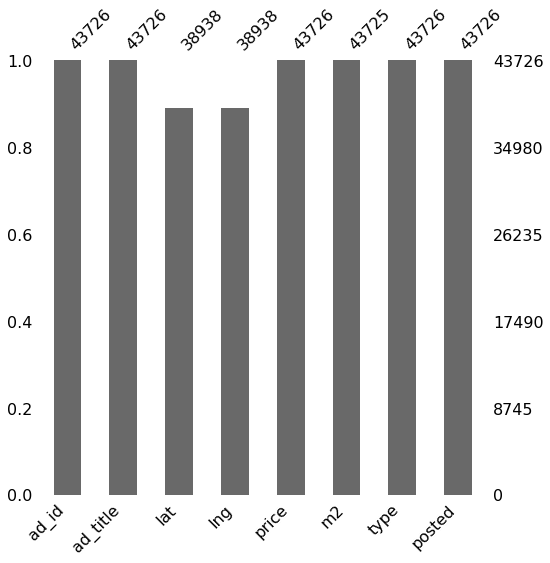

In [66]:
msno.bar(df, figsize=(8,8));

**Matrix:** The pattern of the missingness in the data set can be examined by using Matrix.

The sparkline at right summarizes the general shape of the data completeness and points out the rows with the maximum and minimum nullity in the dataset.

White line shows missing value within the attributes. If no white lines exist in the attributes regarding matrix, the attributes have no missing values. For instance, ad_id, ad_title, price, m2, type and posted have no missing values.

The sparkline at right of the matrix shows rows with the maximum and minimum nullity in the dataset. For example, maximum number of nonmissing value in the one row is 8 that means at least one row has nonmissing values because number of attributes is 8. Also, minimum number of nonmissing value in the one row is 6 that means at least 6 attributes have nonmissing values in the one row.

Missingness pattern of lat and lng looks similar. At the beginning of the dataset, there are no missing values in lat and lng. However, when we have observed that real state agency give faulty information about location of estate and we have stated that these data are disguised data and we treat them as missing data and their location information are discarded from data set. Therefore, missing values of them exist according to matrix and bar chart. Also, due to that reason, missing ones of lat and lng appears together. In addition to lng and lat, m2 has only one missing value due to the value called by "Diğer". Since the missing percentage are very low in m2, we can drop the corresponding instance from the dataset.

Moreover, missingness patern looks like general. In other words, the pattern does not look like univariate nonresponse, unit nonresponse pattern, monotone, file matching or factor analysis.

Also, there are no latent data(Data that are missing on a variable for all cases) and Unit non-response(Data that are missing on all variables for some cases).However, there is disguised data(Missing data values are not explicitly represented as such, but are coded as valid data values) such as lat and lng. In addition to lat and lng, m2 has also disguised data since "Diğer" value in m2 can be represented as disguised data.

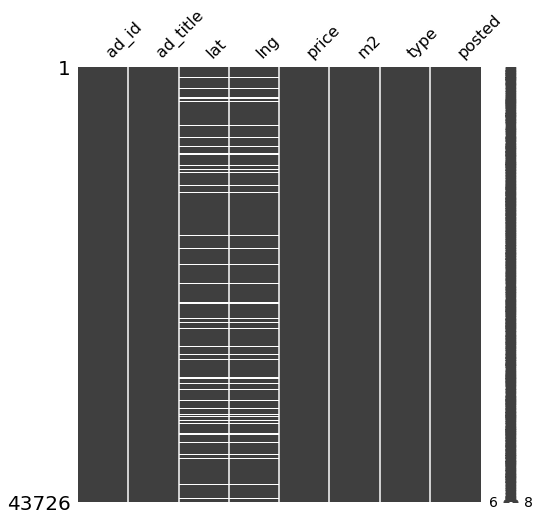

In [67]:
msno.matrix(df, figsize=(8,8));

**Heatmap :** Heatmap shows the correlation of missingness between every 2 columns.

A value near -1 means if one variable appears then the other variable is very likely to be missing.  
A value near 0 means there is no dependence between the occurrence of missing values of two variables.  
A value near 1 means if one variable appears then the other variable is very likely to be present.  

However please notice that 
- if there isn't any missing in an attribute/column, this attribute/column isn't shown in the heatmap.

The correlation of missingness between lng and lat is 1 that is equal to 1. Therefore, we can say that when lng appears, lat is likely to be present.

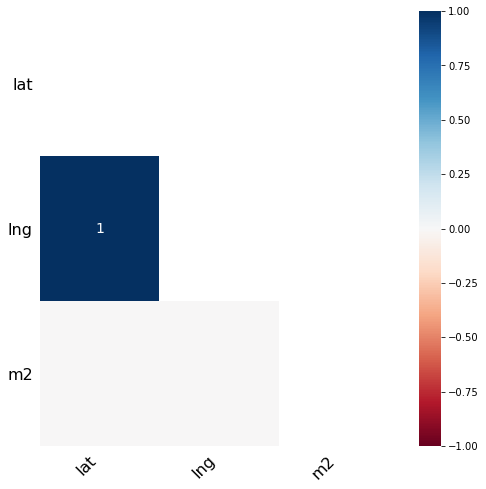

In [68]:
msno.heatmap(df, figsize=(8,8));

In [69]:
#Missingness Mechanism
#for lat consider lng, price, m2(Numeric attributes)

--------------
$H_{0}$: Distribution of lng|lat_is_nan is same with distribution of lng|lat_is_complete.  
$H_{1}$: Distribution of lng|lat_is_nan is different than distribution of lng|lat_is_complete.   

--------------
$H_{0}$: Distribution of price|lat_is_nan is same with distribution of price|lat_is_complete.  
$H_{1}$: Distribution of price|lat_is_nan is different than distribution of price|lat_is_complete.   

--------------
$H_{0}$: Distribution of m2|lat_is_nan is same with distribution of m2|lat_is_complete.  
$H_{1}$: Distribution of m2|lat_is_nan is different than distribution of m2|lat_is_complete.   

In [70]:
lat_mis_index = df[df["lat"].isnull()].index ##Missing indexs of lat
lat_complete_index = df[df["lat"].notnull()].index ##Completed indexs of lat

check_numerics=["lng","price","m2"]
for column in check_numerics:
    print("-------- distribution comparison of", column, " while lat exists and lat is nan--------")
 
    stat, pvalue= stats.ks_2samp(df.loc[lat_mis_index,column],df.loc[lat_complete_index,column])
    print(column, " p value:%.4f" % pvalue)
    if pvalue <0.05:
        print("Reject null hypothesis >> The samples come from DIFFERENT distribution.")
    else:
        print("Fail to reject null hypothesis >> The samples come from same distribution.")

-------- distribution comparison of lng  while lat exists and lat is nan--------
lng  p value:0.0000
Reject null hypothesis >> The samples come from DIFFERENT distribution.
-------- distribution comparison of price  while lat exists and lat is nan--------
price  p value:0.0001
Reject null hypothesis >> The samples come from DIFFERENT distribution.
-------- distribution comparison of m2  while lat exists and lat is nan--------
m2  p value:0.0000
Reject null hypothesis >> The samples come from DIFFERENT distribution.


Since null hypothesis rejects regarding distribution comparison of lng and lat, we can conclude that missingness of lat is not independent of lng.

Since null hypothesis rejects regarding distribution comparison of price and lat, we can conclude that missingness of lat is not independent of price.

Since null hypothesis rejects regarding distribution comparison of m2 and lat, we can conclude that missingness of lat is not independent of m2.

Since missingness of lat depends on other attribute like lat, data of lat are not MCAR and it may be MAR or MNAR.

In [71]:
#for lng consider lat, price, m2(Numeric attributes)

--------------
$H_{0}$: Distribution of lat|lng_is_nan is same with distribution of lat|lng_is_complete.  
$H_{1}$: Distribution of lat|lng_is_nan is different than distribution of lat|lng_is_complete.   

--------------
$H_{0}$: Distribution of price|lng_is_nan is same with distribution of price|lng_is_complete.  
$H_{1}$: Distribution of price|lng_is_nan is different than distribution of price|lng_is_complete.   

--------------
$H_{0}$: Distribution of m2|lng_is_nan is same with distribution of m2|lng_is_complete.  
$H_{1}$: Distribution of m2|lng_is_nan is different than distribution of m2|lng_is_complete.   

In [72]:
lng_mis_index = df[df["lng"].isnull()].index ##Missing indexs of lng
lng_complete_index = df[df["lng"].notnull()].index ##Completed indexs of lng

check_numerics=["lat","price","m2"]
for column in check_numerics:
    print("-------- distribution comparison of", column, " while lat exists and lng is nan--------")
 
    stat, pvalue= stats.ks_2samp(df.loc[lng_mis_index,column],df.loc[lng_complete_index,column])
    print(column, " p value:%.4f" % pvalue)
    if pvalue <0.05:
        print("Reject null hypothesis >> The samples come from DIFFERENT distribution.")
    else:
        print("Fail to reject null hypothesis >> The samples come from same distribution.")

-------- distribution comparison of lat  while lat exists and lng is nan--------
lat  p value:0.0000
Reject null hypothesis >> The samples come from DIFFERENT distribution.
-------- distribution comparison of price  while lat exists and lng is nan--------
price  p value:0.0001
Reject null hypothesis >> The samples come from DIFFERENT distribution.
-------- distribution comparison of m2  while lat exists and lng is nan--------
m2  p value:0.0000
Reject null hypothesis >> The samples come from DIFFERENT distribution.


Since null hypothesis rejects regarding distribution comparison of lat and lng, we can conclude that missingness of lng is not independent of lat.

Since null hypothesis rejects regarding distribution comparison of price and lng, we can conclude that missingness of lng is not independent of price.

Since null hypothesis rejects regarding distribution comparison of m2 and lng, we can conclude that missingness of lng is not independent of m2.

Since missingness of lng depends on other attribute like lng, data of lng are not MCAR and it may be MAR or MNAR.

In [73]:
#for lat consider ad_title, type(Categorical attributes)

In [74]:
def create_missingness_map(mis_data):
    columns=mis_data.columns
    mis_map=pd.DataFrame(data=np.zeros(mis_data.shape), columns=mis_data.columns, dtype=int)
    for col in columns:
        col_mis_index=mis_data[mis_data[col].isnull()].index
        mis_map.loc[col_mis_index,col]=1    
    return mis_map

In [75]:
mis_map=create_missingness_map(df)
mis_map.head(10)

ad_id  ad_title  lat  lng  price  m2  type  posted
0      0         0    0    0      0   0     0       0
1      0         0    0    0      0   0     0       0
2      0         0    0    0      0   0     0       0
3      0         0    1    1      0   0     0       0
4      0         0    0    0      0   0     0       0
5      0         0    0    0      0   0     0       0
6      0         0    0    0      0   0     0       0
7      0         0    1    1      0   0     0       0
8      0         0    0    0      0   0     0       0
9      0         0    0    0      0   0     0       0

$H_{0}$: Missingness of lat is independent of ad_title.  
$H_{1}$: Missingness of lat is  not independent of ad_title.  

In [76]:
df_map=create_missingness_map(df)
df_tab = pd.crosstab(df["ad_title"], df_map["lat"])
chi2, p, dof, ex =stats.chi2_contingency(df_tab)
print("p value:%.4f" % p)
if p <0.05:
    print("Reject null hypothesis >> Missingness of lat is not independent of ad_title")
else:
    print("Fail to reject null hypothesis >> Missingness of lat is independent of ad_title")

p value:0.0000
Reject null hypothesis >> Missingness of lat is not independent of ad_title


As we anticipate that missingness of lat is not independent of ad_title since we can detect disguised data for lat thanks to ad_title.

$H_{0}$: Missingness of lng is independent of ad_title.  
$H_{1}$: Missingness of lng is  not independent of ad_title.  

In [77]:
df_map=create_missingness_map(df)
df_tab = pd.crosstab(df["ad_title"], df_map["lng"])
chi2, p, dof, ex =stats.chi2_contingency(df_tab)
print("p value:%.4f" % p)
if p <0.05:
    print("Reject null hypothesis >> Missingness of lng is not independent of ad_title")
else:
    print("Fail to reject null hypothesis >> Missingness of lng is independent of ad_title")

p value:0.0000
Reject null hypothesis >> Missingness of lng is not independent of ad_title


As we anticipate that missingness of lng is not independent of ad_title since we can detect disguised data for lng thanks to ad_title.

As a result, missingness of lat and lng attributes depends on other attributes. Also, since we have no information about true values of lng and lat, we cannot tell about MNAR.

In [78]:
for columns in df:
    missing_amount=df[columns].isna().sum()
    missing_percentage=missing_amount/(len(df))
    print(columns,"--> # of missing value", missing_amount , "-->  missing_percentage:", missing_percentage )

ad_id --> # of missing value 0 -->  missing_percentage: 0.0
ad_title --> # of missing value 0 -->  missing_percentage: 0.0
lat --> # of missing value 4788 -->  missing_percentage: 0.10950006860906554
lng --> # of missing value 4788 -->  missing_percentage: 0.10950006860906554
price --> # of missing value 0 -->  missing_percentage: 0.0
m2 --> # of missing value 1 -->  missing_percentage: 2.2869688514842427e-05
type --> # of missing value 0 -->  missing_percentage: 0.0
posted --> # of missing value 0 -->  missing_percentage: 0.0


### Missing Data Solutions

Since the missing percentage is too low in m2 attribute, we can select deleting row as solution.

In [79]:
for columns in df:
    missing_amount=df[columns].isna().sum()
    missing_percentage=missing_amount/(len(df))
    print(columns,"--> # of missing value", missing_amount , "-->  missing_percentage:", missing_percentage )

ad_id --> # of missing value 0 -->  missing_percentage: 0.0
ad_title --> # of missing value 0 -->  missing_percentage: 0.0
lat --> # of missing value 4788 -->  missing_percentage: 0.10950006860906554
lng --> # of missing value 4788 -->  missing_percentage: 0.10950006860906554
price --> # of missing value 0 -->  missing_percentage: 0.0
m2 --> # of missing value 1 -->  missing_percentage: 2.2869688514842427e-05
type --> # of missing value 0 -->  missing_percentage: 0.0
posted --> # of missing value 0 -->  missing_percentage: 0.0


In [23]:
df.dropna(subset = ["m2"], inplace=True)

In [24]:
for columns in df:
    missing_amount=df[columns].isna().sum()
    missing_percentage=missing_amount/(len(df))
    print(columns,"--> # of missing value", missing_amount , "-->  missing_percentage:", missing_percentage )

ad_id --> # of missing value 0 -->  missing_percentage: 0.0
ad_title --> # of missing value 0 -->  missing_percentage: 0.0
lat --> # of missing value 4788 -->  missing_percentage: 0.10950257289879932
lng --> # of missing value 4788 -->  missing_percentage: 0.10950257289879932
price --> # of missing value 0 -->  missing_percentage: 0.0
m2 --> # of missing value 0 -->  missing_percentage: 0.0
type --> # of missing value 0 -->  missing_percentage: 0.0
posted --> # of missing value 0 -->  missing_percentage: 0.0


By considering missing values in lat and lng:

We cannot ignore tuples since percentage of missingnesses are high. We cannot fill in the missing value manually since this approach genarally is time consuming and may not be feasible given a large data set with many missing values. We cannot use a global constant to fill in the missing value : Replace all missing attribute values by the same constant such as a label like “Unknown” or infinity. If missing values are replaced by, say, “Unknown ,” then the mining program may mistakenly think that
they form an interesting concept, since they all have a value in common—that of “Unknown.” Hence, although this method is simple, it is not foolproof!. We cannot use a measure of central tendency for the attribute (e.g., the mean or median) to fill in the missing value since we reduce the knowledge of the data. Also, we cannot use the most probable value to fill in the missing value(eg:multiple imputation) since we have both categorical and numeric attributes. To predict lat and lng, we should access ground truth regarding lat and lng, but we have no chance to do that. Therefore, percentage of missingness is about 10%, we should discard missing data from the dataset.


In [82]:
df.head()

ad_id                                           ad_title        lat  \
0  33204358  İVEDİK OSB DE 4 CEPHELİ KUPON SATILIK DÜKKAN /...  39.988071   
1  33317214       OSTİM BAĞDAT CADDESİNDE SATILIK OFİS/BÜROLAR  39.964565   
2  26440906  ACİLLL,FİYAT DÜŞTÜ İVEDİK OSB,MELİH GÖKÇEK'DE ...  40.000498   
3  24945051              İVEDİK OSB SATILIK İŞYERİ KALEM EMLAK        NaN   
4  33511467          YILDIRIM KULE 19.KATTA 90 M2 SATILIK OFİS  39.884835   

         lng      price      m2             type     posted  
0  32.744523  5250000.0  1650.0  Dükkan & Mağaza 2019-06-10  
1  32.756947   280000.0    52.0  Dükkan & Mağaza 2019-06-10  
2  32.764535   725000.0   210.0  Dükkan & Mağaza 2019-06-14  
3        NaN   875000.0   460.0  Dükkan & Mağaza 2019-06-11  
4  32.812957   900000.0    90.0             Ofis 2019-06-14

In [25]:
df.dropna(subset = ["lat"], inplace=True)
df.dropna(subset = ["lng"], inplace=True)

In [26]:
df.reset_index(drop=True, inplace=True)
df.head()

ad_id                                           ad_title        lat  \
0  33204358  İVEDİK OSB DE 4 CEPHELİ KUPON SATILIK DÜKKAN /...  39.988071   
1  33317214       OSTİM BAĞDAT CADDESİNDE SATILIK OFİS/BÜROLAR  39.964565   
2  26440906  ACİLLL,FİYAT DÜŞTÜ İVEDİK OSB,MELİH GÖKÇEK'DE ...  40.000498   
3  33511467          YILDIRIM KULE 19.KATTA 90 M2 SATILIK OFİS  39.884835   
4  29141107  ÇAYYOLU İLKO'DA 550m2 KULLANIMLI İSKANLI HER İ...  39.868478   

         lng      price      m2             type     posted  
0  32.744523  5250000.0  1650.0  Dükkan & Mağaza 2019-06-10  
1  32.756947   280000.0    52.0  Dükkan & Mağaza 2019-06-10  
2  32.764535   725000.0   210.0  Dükkan & Mağaza 2019-06-14  
3  32.812957   900000.0    90.0             Ofis 2019-06-14  
4  32.691587  1400000.0   600.0            Villa 2019-06-14

In [27]:
for columns in df:
    missing_amount=df[columns].isna().sum()
    missing_percentage=missing_amount/(len(df))
    print(columns,"--> # of missing value", missing_amount , "-->  missing_percentage:", missing_percentage )

ad_id --> # of missing value 0 -->  missing_percentage: 0.0
ad_title --> # of missing value 0 -->  missing_percentage: 0.0
lat --> # of missing value 0 -->  missing_percentage: 0.0
lng --> # of missing value 0 -->  missing_percentage: 0.0
price --> # of missing value 0 -->  missing_percentage: 0.0
m2 --> # of missing value 0 -->  missing_percentage: 0.0
type --> # of missing value 0 -->  missing_percentage: 0.0
posted --> # of missing value 0 -->  missing_percentage: 0.0


### Visualize the distributions of the numeric attributes

In [86]:
df.describe().T

count           mean           std        min            25%  \
lat    38937.0      39.920581  6.601116e-02  38.938118      39.881743   
lng    38937.0      32.791228  1.119386e-01  31.349558      32.740009   
price  38937.0  490013.559211  1.780956e+06  10.000000  140000.000000   
m2     38937.0     308.723143  7.761392e+03   1.000000     110.000000   

                 50%           75%           max  
lat        39.912458      39.97086  4.050664e+01  
lng        32.826409      32.85710  3.354567e+01  
price  265000.000000  430000.00000  9.900000e+07  
m2        135.000000     186.00000  1.111111e+06

Ankara's latitude value: 38-57, longitude value: 31-53. The minimum value of lat is 38.938118 ve maximum value is 40.50664. The minimum value of lng is 31.349558 ve maximum value is 33.54567.It is desirable that the minimum and maximum values in the data set are included in the actual values. 

When we look at the boxplot graph of lat, we see that the values are concentrated between 39-40 and there are outliers.But; There is about 2 unit difference between the minimum and maximum value and the standard deviation is 0.066.When we look at the histogram and the Q-Q plot, we can say that although some values are outside the normal distribution and there is a multi-peaked structure, most values are around the normal distribution. Mean(39.920581) is close to median(39.912458).This strengthens the normal distribution.

When we look at the boxplot graph of lng, we see that the values are concentrated between 32-33.5 and there are outliers. But; There is about 2 unit difference between the minimum and maximum value and the standard deviation is 0.11.When we look at the histogram and the Q-Q plot, some values are outside the normal distribution and there is a multi-peaked structure.On the other hand, we can say that most values are around the normal distribution. Mean(32.791507) is close to median(32.822769).This strengthens the normal distribution.

The minimum value of price is 10 and the maximum value is 99000000. The range of price values is very wide.When the advertisement definitions are examined, the properties can be rented daily or monthly, and at the same time, they can be advertised for sale.For this reason, The range of price of properties is very wide.Also, when we look at the histogram chart, more than about 40000 values are in the range 0-20000000.The number of ads above 20000000 is 40.These values have a very small proportion (0.1%) of the total number of data and they are far from the central tendency as outlier. Most parametric statistics, like means, standard deviations, and correlations, and every statistic based on these, are highly sensitive to outliers.  And since the assumptions of common statistical procedures, like linear regression and ANOVA, are also based on these statistics, outliers can really mess up your analysis.It is believed that models conducting later and statistical analysis will be negatively affected regarding performance.Also, this situation adversely affects the readability and interpretability of the graphics,so this data is extracted from the data set.When we look at the histogram in the last case, we see that most of the values are between 0-2500000 values.There are many different values and the histogram frequency continues like a straight line at a very low point after a certain point, since the frequencies of those with high values are very low. The outliers can affect the mean and standard deviation seriously. As a remediation, these values can be dropped from data set.As the values determined as outlier according to the Outlier analysis are removed from the data set, the price value at the outlier border (Q3 + 1.5IQR) is 865000. However, when the data set was examined, it was observed that there were values above this value and without error in terms of variable values.For example; Ad_id no(33511467) has 90 m2, its type is Ofis and its price is 900000. Due to m2 and type, it is considered to be reasonable in price.At least there is not enough evidence to say it contains incorrect data.That is, removing all outliers from the data set will cause the information carried by the data to decrease. We know that parametric tests, correlation analyzes and statistical procedures based on them are sensitive to outliers. In order to find a balance between the two situations, we removed the observations with extreme outlier (Q3 +/- 3IQR) values from the data set and we will continue the evaluations.Thus, we wanted to contain the powers of both cases in the data set.Histogram and boxplot were rebuilt for price. In addition, when we checked the very low priced ads with little reflection of the truth, we found 2 ads with a price below 50. The values of these ads are 10 and 25. According to the opinion of the field expert (real estate agent), the related ads were deleted from the data set because it was not reasonable to advertise at such low prices in the relevant variable values.

When we look at the boxplot graph of lat, we see that the values are concentrated between 39-40 and there are outliers.But; There is about 2 unit difference between the minimum and maximum value and the standard deviation is 0.066.When we look at the histogram and the Q-Q plot, we can say that although some values are outside the normal distribution and there is a multi-peaked structure, most values are around the normal distribution. Mean(39.920581) is close to median(39.912458).This strengthens the normal distribution.

When we look at the boxplot graph of lng, we see that the values are concentrated between 32-33.5 and there are outliers. But; There is about 2 unit difference between the minimum and maximum value and the standard deviation is 0.11.When we look at the histogram and the Q-Q plot, some values are outside the normal distribution and there is a multi-peaked structure.On the other hand, we can say that most values are around the normal distribution. Mean(32.791507) is close to median(32.822769).This strengthens the normal distribution.

The minimum value of price is 10 and the maximum value is 99000000. The range of price values is very wide.When the advertisement definitions are examined, the properties can be rented daily or monthly, and at the same time, they can be advertised for sale.For this reason, The range of price of properties is very wide.

**IMPORTANT NOTE**

Since dataset's size is huge, computation time of the following code is about **10 minutes**. This situation should be considered while running the code.

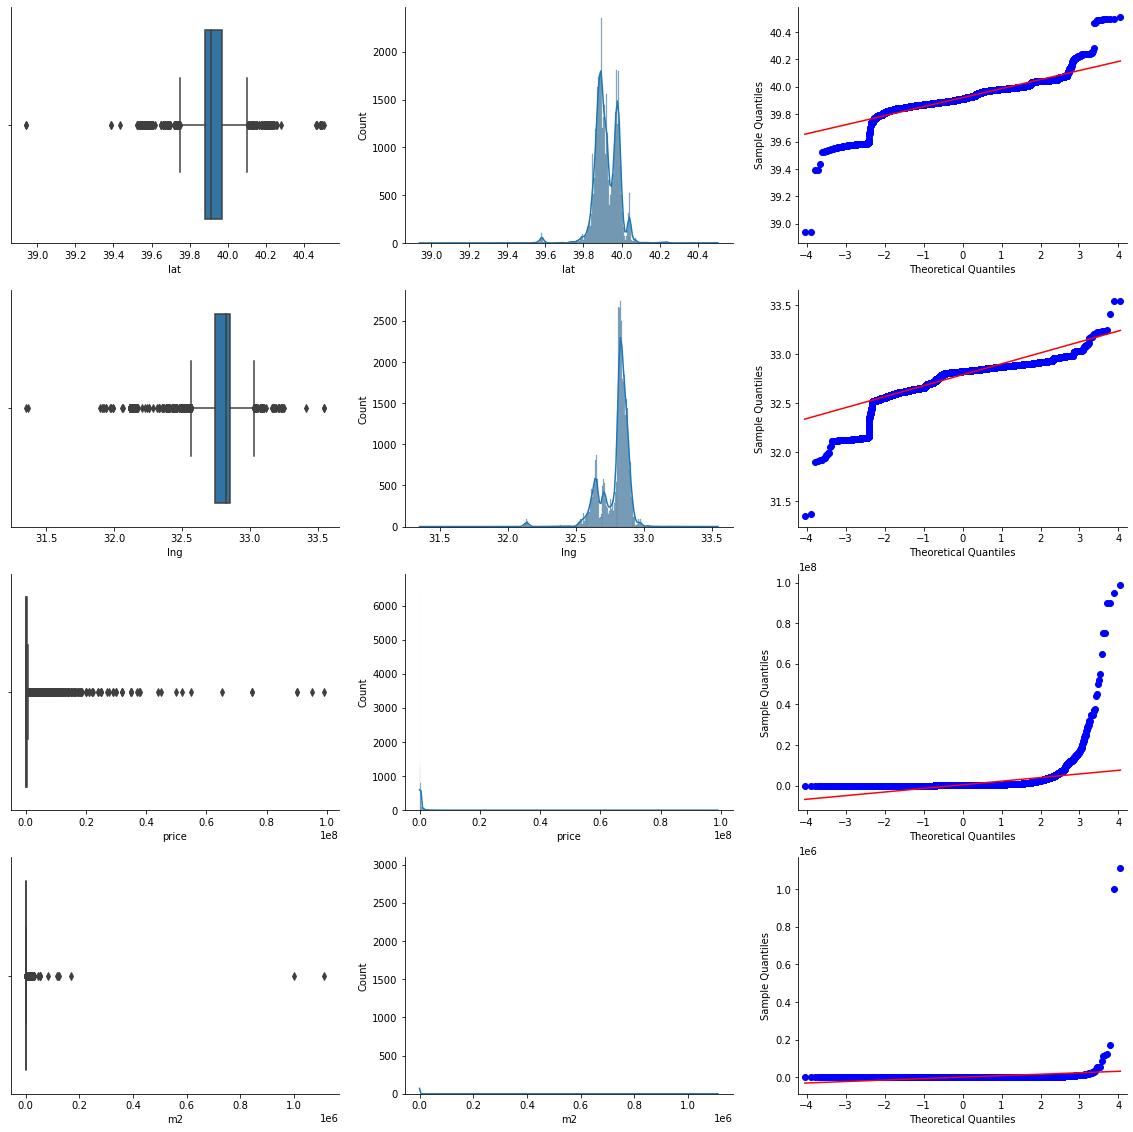

In [87]:
numeric=["lat","lng","price","m2"]
f, axes = plt.subplots(len(numeric), 3, figsize=(20, 20))
sns.despine(right=True)
count=0
for i in range(len(numeric)):
    sns.boxplot(x=df[numeric[count]], ax=axes[i,0])
    sns.histplot(x=df[numeric[count]], ax=axes[i,1], kde=True)
    sm.qqplot(data=df.loc[:,numeric[count]], line="s", ax=axes[i,2])
    count=count+1

Also, when we look at the histogram chart, more than about 40000 values are in the range 0-20000000.

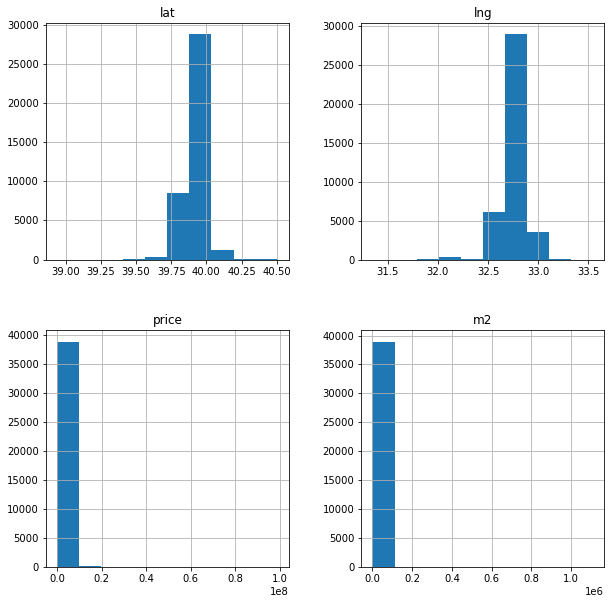

In [28]:
df.hist(figsize = (10,10));

The number of ads above 20000000 is 40.

In [89]:
len(df.loc[df["price"] > 20000000])

40

In [90]:
df.shape

(38937, 8)

These values have a very small proportion (0.1%) of the total number of data and they are far from the centeral tendency as outlier. Most parametric statistics, like means, standard deviations, and correlations, and every statistic based on these, are highly sensitive to outliers.  And since the assumptions of common statistical procedures, like linear regression and ANOVA, are also based on these statistics, outliers can really mess up your analysis.It is believed that models conducting later and statistical analysis will be negatively affected regarding performance.Also, this situaiton adversely affects the readability and interpretability of the graphics,so this data is extracted from the data set.

In [28]:
df.drop(df[df.price > 20000000].index, inplace=True)

In [92]:
df.loc[df["price"] > 20000000]

Empty DataFrame
Columns: [ad_id, ad_title, lat, lng, price, m2, type, posted]
Index: []

In [29]:
df.reset_index(drop=True, inplace=True)

In [94]:
df.describe().T

count           mean            std        min            25%  \
lat    38897.0      39.920598       0.066014  38.938118      39.881742   
lng    38897.0      32.791206       0.111955  31.349558      32.739604   
price  38897.0  448163.301926  987820.539000  10.000000  140000.000000   
m2     38897.0     299.367046    7756.668727   1.000000     110.000000   

                 50%            75%           max  
lat        39.912467      39.970877  4.050664e+01  
lng        32.826415      32.857117  3.354567e+01  
price  264000.000000  430000.000000  2.000000e+07  
m2        135.000000     185.000000  1.111111e+06

When we look at the histogram in the last case, we see that most of the values are between 0-2500000 values.There are many different values and the histogram frequency continues like a straight line at a very low point after a certain point, since the frequencies of those with high values are very low.

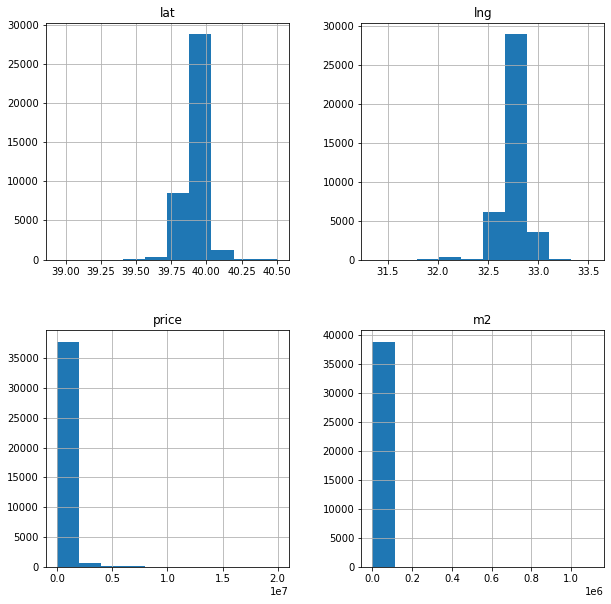

In [95]:
df.hist(figsize = (10,10));

The outliers can affect the mean and standard deviation seriously. As a remeditation, these values can be dropped from the the data set.As the values determined as outlier according to the Outlier analysis are removed from the data set, the price value at the outlier border (Q3 + 1.5IQR) is 865000.

In [30]:
numeric_columns=["lat", "lng", "price","m2"]
for columns in numeric_columns:
    quantiles=df[columns].quantile(q=[0.25,0.50,0.75]).values
    q1=quantiles[0]
    q2=quantiles[1]
    q3=quantiles[2]
    iqr=q3-q1
    outliers=df[(df[columns] < q1-1.5*iqr ) | (df[columns] >  q3+ 1.5*iqr)][columns]
    print("number of outliers in", columns, ":", (len(outliers)))
    print("percentage of outliers in", columns, ":", (100*len(outliers))/len(df))

number of outliers in lat : 543
percentage of outliers in lat : 1.3959945497082038
number of outliers in lng : 999
percentage of outliers in lng : 2.5683214643802863
number of outliers in price : 3247
percentage of outliers in price : 8.347687482325115
number of outliers in m2 : 4288
percentage of outliers in m2 : 11.023986425688356


In [97]:
df.shape

(38897, 8)

In [31]:
quantiles = df["price"].quantile(q=[0.25,0.50,0.75]).values
q1=quantiles[0]
q2=quantiles[1]
q3=quantiles[2]
iqr=q3-q1
q3+ 1.5*iqr

865000.0

However, when the data set was examined, it was observed that there were values above this value and without error in terms of variable values.For example; Ad_id no(33511467) has 90 m2, its type is Ofis adn its price ise 900000. Due to m2 and type, it is considered to be reasonable in price.At least there is not enough evidence to say it contains incorrect data.That is, removing all outliers from the data set will cause the information carried by the data to decrease. We know that parametric tests, correlation analyzes and statistical procedures based on them are sensitive to outliers. In order to find a balance between the two situations, we removed the observations with extreme outlier (Q3 + 3IQR) values from the data set and we will continue the evaluations.Thus, we wanted to contain the powers of both cases in the data set.

In [99]:
df.loc[(df["price"] >  q3+ 1.5*iqr) & (df["price"] <  q3+ 3*iqr)]

ad_id                                           ad_title        lat  \
3      33511467          YILDIRIM KULE 19.KATTA 90 M2 SATILIK OFİS  39.884835   
15     33530507                     Sahibinden satılık dublex ofis  39.932260   
17     33389587        GİMAT TİMKO-1 SATILIK BORÇSUZ TAPULU DÜKKAN  39.950457   
22     33531513  ÇUKURAMBAR'DA,PARK MANZARALI,MADONUN ÜSTÜNDE,S...  39.905782   
24     33532607  4.750 TL NET KURUMSAL MARKET KİRACILI 10 YILLI...  39.877785   
...         ...                                                ...        ...   
38117  33524795  ACİL,FİYAT DÜŞTÜ!!! SAHİBİNDEN ACİL SATILIK DA...  39.867203   
38118  30002042  BİRLİK'DE ZİRVEKENT MİMOZA'DA 2+1 LÜX SATILIK ...  39.876826   
38121  32481994      BİLKENT FLORADA TAM MÜSTAKİL YAPILI 6+1 VİLLA  39.853725   
38153  31729127  İLKO'DA BEYLLER CAD YANI 265M2 4+2 BAKIMLI MAS...  39.863875   
38163  31341406  SİNPAŞ ALTIN ORAN EN GÜZEL DAİRE 4.5+1 VADİ MA...  39.855372   

             lng      price     m2             type     posted  
3      32.812957   900000.0   90.0             Ofis 2019-06-14  
15     32.835414  1250000.0  175.0             Ofis 2019-06-14  
17     32.769287   985000.0  720.0  Dükkan & Mağaza 2019-06-13  
22     32.807424  1075000.0  300.0             Ofis 2019-06-14  
24     32.836805   910000.0  285.0  Dükkan & Mağaza 2019-06-14  
...          ...        ...    ...              ...        ...  
38117  32.645633  1200000.0  300.0            Villa 2019-06-22  
38118  32.874141  1000000.0   95.0            Daire 2019-06-26  
38121  32.753896   975000.0  300.0            Villa 2019-06-24  
38153  32.692269  1080000.0  265.0            Villa 2019-06-27  
38163  32.851205   980000.0  195.0        Residence 2019-06-13  

[1268 rows x 8 columns]

In [32]:
remove_outliers=df[(df["price"] < q1-3*iqr ) | (df["price"] >  q3+ 3*iqr)]["price"]
remove_outliers

0         5250000.0
4         1400000.0
6         2350000.0
8         2650000.0
9         2500000.0
            ...    
37515     1500000.0
37526     2400000.0
38058     1595000.0
38077    14500000.0
38140     1350000.0
Name: price, Length: 1920, dtype: float64

In [34]:
remove_outliers.index

Int64Index([    0,     4,     6,     8,     9,    10,    11,    19,    21,
               26,
            ...
            37039, 37111, 37246, 37474, 37502, 37515, 37526, 38058, 38077,
            38140],
           dtype='int64', length=1920)

In [33]:
mean_change= (np.mean(df["price"]) - np.mean(remove_outliers) )/ np.mean(df["price"])
std_change= (np.std(df["price"]) - np.std(remove_outliers) )/ np.std(df["price"])
print("change in mean: %.2f "% mean_change)
print("change in std: %.2f "% std_change)

change in mean: -6.75 
change in std: -2.03 


In [34]:
df.drop(remove_outliers.index, inplace=True)

In [37]:
df

ad_id                                           ad_title        lat  \
1      33317214       OSTİM BAĞDAT CADDESİNDE SATILIK OFİS/BÜROLAR  39.964565   
2      26440906  ACİLLL,FİYAT DÜŞTÜ İVEDİK OSB,MELİH GÖKÇEK'DE ...  40.000498   
3      33511467          YILDIRIM KULE 19.KATTA 90 M2 SATILIK OFİS  39.884835   
5      27633894          HAZIR MÜŞTERİLİ FULL YAPILI DEVREN İŞYERİ  39.894921   
7      30998944     YAŞAMKENT BESA KARİNA PLAZA'DA SATILIK İŞ YERİ  39.856465   
...         ...                                                ...        ...   
38892  33408148         Çayyolu Angora Evlerinde 3+1 Kiralık Daire  39.883993   
38893  23744481  PARKORANDA A BLOKLARDA KİRALIK 1+1 MOBİLYALI D...  39.846542   
38894  33587472  BEYSU KONAKLARINDA 4+2, 266m2, EN İYİ KONUMDA ...  39.887654   
38895  33581038  DOST'TAN MUSTAFA KEMALDE MOBİLYALI 2+1 90 M2 2...  39.915348   
38896  33122158   ONE TOWER LUXURY NEW FURNİSHED WİTH AMAZİNG WİEW  39.849264   

             lng     price     m2             type     posted  
1      32.756947  280000.0   52.0  Dükkan & Mağaza 2019-06-10  
2      32.764535  725000.0  210.0  Dükkan & Mağaza 2019-06-14  
3      32.812957  900000.0   90.0             Ofis 2019-06-14  
5      32.836332   65000.0  120.0  Dükkan & Mağaza 2019-06-13  
7      32.645285  560000.0   70.0       Plaza Katı 2019-06-14  
...          ...       ...    ...              ...        ...  
38892  32.726188    2550.0  175.0            Daire 2019-06-10  
38893  32.834549    3000.0   82.0            Daire 2019-06-21  
38894  32.712282    8250.0  300.0            Daire 2019-06-22  
38895  32.769235    2500.0   95.0            Daire 2019-06-21  
38896  32.834913   15000.0  220.0        Residence 2019-06-04  

[36977 rows x 8 columns]

In [35]:
df.reset_index(drop=True, inplace=True)

Histogram and boxplot was rebuilt for price.

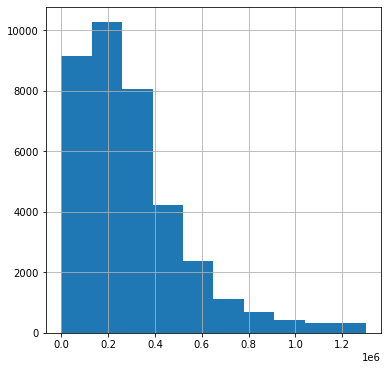

In [106]:
df["price"].hist(figsize = (6,6));

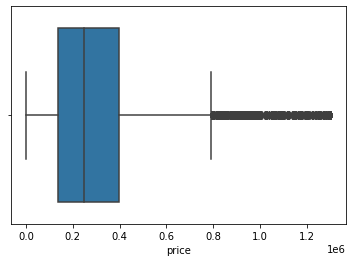

In [107]:
sns.boxplot(x=df["price"]);

In [108]:
df.describe().T

count           mean            std        min            25%  \
lat    36977.0      39.921478       0.065965  38.938118      39.882296   
lng    36977.0      32.791939       0.112438  31.349558      32.747808   
price  36977.0  291007.216865  245150.964122  10.000000  135000.000000   
m2     36977.0     241.146334    5996.517208   1.000000     110.000000   

                 50%            75%           max  
lat        39.913579      39.971888  4.050664e+01  
lng        32.827148      32.857685  3.354567e+01  
price  250000.000000  398000.000000  1.300000e+06  
m2        135.000000     180.000000  1.111111e+06

when we checked the very low priced ads with little reflection of the truth, we found 2 ads with a price below 50. The values of these ads are 10 and 25. According to the opinion of the field expert (real estate agent), the related ads were deleted from the data set because it was not reasonable to advertise at such low prices in the relevant variable values.

In [109]:
df.loc[df["price"] < 50]

ad_id                                       ad_title        lat  \
25071  32724143  Ankara Günlük Kiralık Ev Daire Apart Rezidans  39.883601   
26040  32725409      Cevizlidere Günlük Kiralık Ev Daire Apart  39.882621   

             lng  price    m2   type     posted  
25071  32.815915   10.0  80.0  Daire 2019-06-22  
26040  32.816035   25.0  90.0  Daire 2019-06-22

In [36]:
df.drop(df.loc[df["price"] < 50].index, inplace=True)

In [111]:
df.loc[df["price"] < 50]

Empty DataFrame
Columns: [ad_id, ad_title, lat, lng, price, m2, type, posted]
Index: []

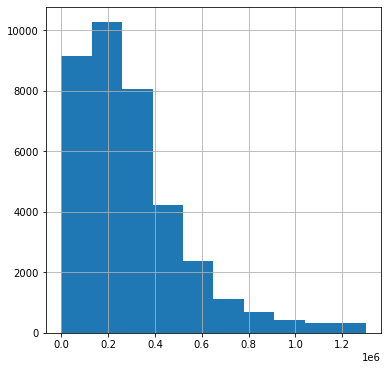

In [112]:
df["price"].hist(figsize = (6,6));

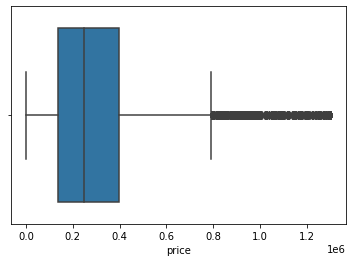

In [113]:
sns.boxplot(x=df["price"]);

The minimum value of m2 is 1 and the maximum value is 1111111.The range of values taken by m2 is very wide.Property type of advertisements with a value of 1 are different structures such as apartment flats, offices, shops & shops and the area of which is far from 1 m2.we understand that they are filled with 1 instead of their real value,so there is disguised data.In order to correct this, the m2 information of the related ads was made as NaN.They were removed from the data set because the rate of missing data was very low.The outlier analysis applied in the price variable was also applied for m2. The outliers can affect the mean and standard deviation seriously. As a remediation, these values can be dropped from data set. However, the observations with no necessary evidence to contain erroneous data(for example, ad_id = 33531513) were not removed from the data set, although they were outlier.Because they contain information about the data and the variable values are consistent.However,the fact that parametric tests, correlation and related procedures are too sensitive to outliers prevents us from keeping all outlier values.Therefore, we removed the extreme outliers from the data set.

The minimum value of m2 is 1 and the maximum value is 1111111.The range of values taken by m2 is very wide.

In [114]:
df.describe().T

count           mean            std        min            25%  \
lat    36975.0      39.921480       0.065966  38.938118      39.882296   
lng    36975.0      32.791938       0.112441  31.349558      32.747765   
price  36975.0  291022.956673  245148.252277  50.000000  135000.000000   
m2     36975.0     241.154780    5996.679278   1.000000     110.000000   

                 50%            75%           max  
lat        39.913580      39.971889  4.050664e+01  
lng        32.827148      32.857685  3.354567e+01  
price  250000.000000  398000.000000  1.300000e+06  
m2        135.000000     180.000000  1.111111e+06

Property type of advertisements with a value of 1 are different structures such as apartment flats, offices, shops & shops and the area of which is far from 1 m2.

In [115]:
df.loc[df["m2"] == 1]

ad_id                                           ad_title        lat  \
1098   11267469     DEDEMAN OTELİ YAKINI KATTA 3+1 130m2 MANZARALI  39.914136   
1154   33427772                 YÜKSEL CADDESİNDE 3 +1 İŞ YERİ !!!  39.920412   
1432   33054292  DEVREN SU BAYİİ ÇAYYOLU ÜMİTKÖY YAŞAMKENT BÖLGESİ  39.886237   
1516    9799094  SERKANDAN TUNALIDA ÇELİKLER PASAJINDA SATILIK ...  39.907942   
1685   33454864  GARDEN GAYRİMENKUL FORCES ERYAMAN'DA İŞ VE YAŞ...  39.968804   
2207   30567476                                PODİUM AVM DE HİSSE  39.961497   
2368   25010630               SATILIK GİMAT GROSS' DA BOÇSUZ HİSSE  39.961020   
2501   33525969  MEGAKENT'den ÇANKAYA TREND RESIDENCE'da 1+0, 4...  39.888112   
3208   28505486  ÇAĞDAŞ TAN ÇUKURAMBAR PARAGON PLAZA DA KİRALIK...  39.908815   
4132   33441358  İZMİR CADDESİ VAKIFBANK BİNASI KARŞISI 1+1 70M...  39.924409   
4539   33022708  AKÇADAN CEVİZLİDERE CADDESİ ÜZERİ HAZIR KURULU...  39.887370   
4847   33494430  YENİ ŞİRKET AÇANLAR VEYA ŞİRKETİ OLUP MASRAFLA...  39.897408   
4948   33494434  EN UCUZ SANAL OFİS STOPAJ DERDİNDEN KURTULMAK ...  39.897441   
5049   33523191  YAMAN EMLAK KAZANC GETİRİSİ YÜKSEK HOTEL KİRAL...  39.944708   
5419   33531397   YAMAN EMLAK ANKARA ULUSTA KİRALIK HOTEL 50 ODALI  39.944717   
18824  33529701  SAHİBİNDEN,LEVENT SOKAKTA,KATTA,3+1+KİLER,GÜNE...  39.964453   
19352  32647342                         S.S. ARSAFİR KOOP. HİSSESİ  40.017331   
25556  33363400  MİRAC-DAN SOKULLU CADDESİNDE 3+1 KATTA GÜNEY M...  39.891152   
35857  33522807  YAMAN EMLAK ANKARA DA KİRALIK HOTEL 50 ODALI K...  39.944711   
36884  32494448   ERKAL'DAN 3+1 KOMBİLİ 1 KATTA BALKONLU MOBİLYALI  39.876193   

             lng     price   m2                type     posted  
1098   32.856577  285000.0  1.0    Apartman Dairesi 2019-06-14  
1154   32.860720  325000.0  1.0                Ofis 2019-06-14  
1432   32.699922   45000.0  1.0     Dükkan & Mağaza 2019-06-14  
1516   32.862639  145000.0  1.0        İş Hanı Katı 2019-06-03  
1685   32.619803  800000.0  1.0     Dükkan & Mağaza 2019-06-15  
2207   32.771187  125000.0  1.0     Dükkan & Mağaza 2019-06-14  
2368   32.768826  150000.0  1.0     Dükkan & Mağaza 2019-06-03  
2501   32.845777    1000.0  1.0                Ofis 2019-06-13  
3208   32.812836     500.0  1.0  Sanal & Hazır Ofis 2019-06-14  
4132   32.852424     700.0  1.0                Ofis 2019-06-16  
4539   32.818170    2600.0  1.0    Apartman Dairesi 2019-06-15  
4847   32.847731     844.0  1.0  Sanal & Hazır Ofis 2019-06-06  
4948   32.847473      59.0  1.0  Sanal & Hazır Ofis 2019-06-06  
5049   32.853737   30000.0  1.0               Genel 2019-06-17  
5419   32.853721   30000.0  1.0               Genel 2019-06-17  
18824  32.810759  340000.0  1.0               Daire 2019-06-13  
19352  32.654652  102000.0  1.0               Daire 2019-06-20  
25556  32.835192  239000.0  1.0               Daire 2019-06-22  
35857  32.853728   30000.0  1.0           Residence 2019-06-24  
36884  32.837626    1500.0  1.0               Daire 2019-06-30

we understand that they are filled with 1 instead of their real value.So there is disguised data.In order to correct this, the m2 information of the related ads was made as NaN.

In [37]:
m2_na = df.loc[df["m2"] == 1]

In [38]:
m2_na.index

Int64Index([ 1098,  1154,  1432,  1516,  1685,  2207,  2368,  2501,  3208,
             4132,  4539,  4847,  4948,  5049,  5419, 18824, 19352, 25556,
            35857, 36884],
           dtype='int64')

In [39]:
df.loc[m2_na.index,"m2"] = np.nan

In [40]:
df.loc[df["m2"] == 1]

Empty DataFrame
Columns: [ad_id, ad_title, lat, lng, price, m2, type, posted]
Index: []

In [41]:
df.reset_index(drop=True, inplace=True)
df

ad_id                                           ad_title        lat  \
0      33317214       OSTİM BAĞDAT CADDESİNDE SATILIK OFİS/BÜROLAR  39.964565   
1      26440906  ACİLLL,FİYAT DÜŞTÜ İVEDİK OSB,MELİH GÖKÇEK'DE ...  40.000498   
2      33511467          YILDIRIM KULE 19.KATTA 90 M2 SATILIK OFİS  39.884835   
3      27633894          HAZIR MÜŞTERİLİ FULL YAPILI DEVREN İŞYERİ  39.894921   
4      30998944     YAŞAMKENT BESA KARİNA PLAZA'DA SATILIK İŞ YERİ  39.856465   
...         ...                                                ...        ...   
36970  33408148         Çayyolu Angora Evlerinde 3+1 Kiralık Daire  39.883993   
36971  23744481  PARKORANDA A BLOKLARDA KİRALIK 1+1 MOBİLYALI D...  39.846542   
36972  33587472  BEYSU KONAKLARINDA 4+2, 266m2, EN İYİ KONUMDA ...  39.887654   
36973  33581038  DOST'TAN MUSTAFA KEMALDE MOBİLYALI 2+1 90 M2 2...  39.915348   
36974  33122158   ONE TOWER LUXURY NEW FURNİSHED WİTH AMAZİNG WİEW  39.849264   

             lng     price     m2             type     posted  
0      32.756947  280000.0   52.0  Dükkan & Mağaza 2019-06-10  
1      32.764535  725000.0  210.0  Dükkan & Mağaza 2019-06-14  
2      32.812957  900000.0   90.0             Ofis 2019-06-14  
3      32.836332   65000.0  120.0  Dükkan & Mağaza 2019-06-13  
4      32.645285  560000.0   70.0       Plaza Katı 2019-06-14  
...          ...       ...    ...              ...        ...  
36970  32.726188    2550.0  175.0            Daire 2019-06-10  
36971  32.834549    3000.0   82.0            Daire 2019-06-21  
36972  32.712282    8250.0  300.0            Daire 2019-06-22  
36973  32.769235    2500.0   95.0            Daire 2019-06-21  
36974  32.834913   15000.0  220.0        Residence 2019-06-04  

[36975 rows x 8 columns]

### Missing Data

In [121]:
for columns in df:
    missing_amount=df[columns].isna().sum()
    missing_percentage=missing_amount/(len(df))
    print(columns,"--> # of missing value", missing_amount , "-->  missing_percentage:", missing_percentage )

ad_id --> # of missing value 0 -->  missing_percentage: 0.0
ad_title --> # of missing value 0 -->  missing_percentage: 0.0
lat --> # of missing value 0 -->  missing_percentage: 0.0
lng --> # of missing value 0 -->  missing_percentage: 0.0
price --> # of missing value 0 -->  missing_percentage: 0.0
m2 --> # of missing value 20 -->  missing_percentage: 0.0005409060175794456
type --> # of missing value 0 -->  missing_percentage: 0.0
posted --> # of missing value 0 -->  missing_percentage: 0.0


In [122]:
#Missingness Mechanism
#for m2 consider lat, lng, price(Numeric attributes)

--------------
$H_{0}$: Distribution of lat|m2_is_nan is same with distribution of lat|m2_is_complete.  
$H_{1}$: Distribution of lat|m2_is_nan is different than distribution of lat|m2_is_complete.   

--------------
$H_{0}$: Distribution of lng|m2_is_nan is same with distribution of lng|m2_is_complete.  
$H_{1}$: Distribution of lng|m2_is_nan is different than distribution of lng|m2_is_complete.   

--------------
$H_{0}$: Distribution of price|m2_is_nan is same with distribution of price|m2_is_complete.  
$H_{1}$: Distribution of price|m2_is_nan is different than distribution of price|m2_is_complete.   

In [123]:
m2_mis_index = df[df["m2"].isnull()].index ##Missing indexs of m2
m2_complete_index = df[df["m2"].notnull()].index ##Completed indexs of m2

check_numerics=["lat","lng","price"]
for column in check_numerics:
    print("-------- distribution comparison of", column, " while lat exists and lat is nan--------")
 
    stat, pvalue= stats.ks_2samp(df.loc[m2_mis_index,column],df.loc[m2_complete_index,column])
    print(column, " p value:%.4f" % pvalue)
    if pvalue <0.05:
        print("Reject null hypothesis >> The samples come from DIFFERENT distribution.")
    else:
        print("Fail to reject null hypothesis >> The samples come from same distribution.")

-------- distribution comparison of lat  while lat exists and lat is nan--------
lat  p value:0.1950
Fail to reject null hypothesis >> The samples come from same distribution.
-------- distribution comparison of lng  while lat exists and lat is nan--------
lng  p value:0.2509
Fail to reject null hypothesis >> The samples come from same distribution.
-------- distribution comparison of price  while lat exists and lat is nan--------
price  p value:0.0002
Reject null hypothesis >> The samples come from DIFFERENT distribution.


Since null hypothesis fails to reject regarding distribution comparison of lat and m2, we can conclude that missingness of m2 is independent of lat.

Since null hypothesis fails to reject regarding distribution comparison of lng and m2, we can conclude that missingness of m2 is independent of lng.

Since null hypothesis rejects regarding distribution comparison of price and m2, we can conclude that missingness of m2 is not independent of price.

Since missingness of m2 depends on other attribute like price, data of m2 are not MCAR and it may be MAR or MNAR.

In [124]:
#for m2 consider ad_title, type(Categorical attributes)

In [125]:
def create_missingness_map(mis_data):
    columns=mis_data.columns
    mis_map=pd.DataFrame(data=np.zeros(mis_data.shape), columns=mis_data.columns, dtype=int)
    for col in columns:
        col_mis_index=mis_data[mis_data[col].isnull()].index
        mis_map.loc[col_mis_index,col]=1    
    return mis_map

In [126]:
mis_map=create_missingness_map(df)
mis_map.head(10)

ad_id  ad_title  lat  lng  price  m2  type  posted
0      0         0    0    0      0   0     0       0
1      0         0    0    0      0   0     0       0
2      0         0    0    0      0   0     0       0
3      0         0    0    0      0   0     0       0
4      0         0    0    0      0   0     0       0
5      0         0    0    0      0   0     0       0
6      0         0    0    0      0   0     0       0
7      0         0    0    0      0   0     0       0
8      0         0    0    0      0   0     0       0
9      0         0    0    0      0   0     0       0

$H_{0}$: Missingness of m2 is independent of ad_title.  
$H_{1}$: Missingness of m2 is  not independent of ad_title.  

In [127]:
df_map=create_missingness_map(df)
df_tab = pd.crosstab(df["ad_title"], df_map["m2"])
chi2, p, dof, ex =stats.chi2_contingency(df_tab)
print("p value:%.4f" % p)
if p <0.05:
    print("Reject null hypothesis >> Missingness of m2 is not independent of ad_title")
else:
    print("Fail to reject null hypothesis >> Missingness of m2 is independent of ad_title")

p value:0.4976
Fail to reject null hypothesis >> Missingness of m2 is independent of ad_title


$H_{0}$: Missingness of m2 is independent of type.  
$H_{1}$: Missingness of m2 is  not independent of type.  

In [128]:
df_map=create_missingness_map(df)
df_tab = pd.crosstab(df["type"], df_map["m2"])
chi2, p, dof, ex =stats.chi2_contingency(df_tab)
print("p value:%.4f" % p)
if p <0.05:
    print("Reject null hypothesis >> Missingness of m2 is not independent of type")
else:
    print("Fail to reject null hypothesis >> Missingness of m2 is independent of type")

p value:0.0000
Reject null hypothesis >> Missingness of m2 is not independent of type


As a result, missingness of m2 depends on type.

### Missing Data Solutions

Since missingness percentage of m2(0.00054) is too low, we can delete the corresponding rows.

In [42]:
for columns in df:
    missing_amount=df[columns].isna().sum()
    missing_percentage=missing_amount/(len(df))
    print(columns,"--> # of missing value", missing_amount , "-->  missing_percentage:", missing_percentage )

ad_id --> # of missing value 0 -->  missing_percentage: 0.0
ad_title --> # of missing value 0 -->  missing_percentage: 0.0
lat --> # of missing value 0 -->  missing_percentage: 0.0
lng --> # of missing value 0 -->  missing_percentage: 0.0
price --> # of missing value 0 -->  missing_percentage: 0.0
m2 --> # of missing value 20 -->  missing_percentage: 0.0005409060175794456
type --> # of missing value 0 -->  missing_percentage: 0.0
posted --> # of missing value 0 -->  missing_percentage: 0.0


In [43]:
df.dropna(subset = ["m2"], inplace=True)

In [44]:
for columns in df:
    missing_amount=df[columns].isna().sum()
    missing_percentage=missing_amount/(len(df))
    print(columns,"--> # of missing value", missing_amount , "-->  missing_percentage:", missing_percentage )

ad_id --> # of missing value 0 -->  missing_percentage: 0.0
ad_title --> # of missing value 0 -->  missing_percentage: 0.0
lat --> # of missing value 0 -->  missing_percentage: 0.0
lng --> # of missing value 0 -->  missing_percentage: 0.0
price --> # of missing value 0 -->  missing_percentage: 0.0
m2 --> # of missing value 0 -->  missing_percentage: 0.0
type --> # of missing value 0 -->  missing_percentage: 0.0
posted --> # of missing value 0 -->  missing_percentage: 0.0


### Outlier Analysis

The outlier analysis applied in the price variable was also applied for m2. The outliers can affect the mean and standard deviation seriously. As a remeditation, these values can be dropped from the the data set. However, the observations with no necessary evidence to contain erroneous data(for example, ad_id = 33531513) were not removed from the data set, although they were outlier.Because; they contain information about the data and the variable values are consistent.However,the fact that parametric tests, correlation and related procedures are too sensitive to outliers prevents us from keeping all outlier values.Therefore, we removed the extreme outliers from the data set.

In [45]:
numeric_columns=["lat", "lng", "price","m2"]
for columns in numeric_columns:
    quantiles=df[columns].quantile(q=[0.25,0.50,0.75]).values
    q1=quantiles[0]
    q2=quantiles[1]
    q3=quantiles[2]
    iqr=q3-q1
    outliers=df[(df[columns] < q1-1.5*iqr ) | (df[columns] >  q3+ 1.5*iqr)][columns]
    print("number of outliers in", columns, ":", (len(outliers)))
    print("percentage of outliers in", columns, ":", (100*len(outliers))/len(df))

number of outliers in lat : 496
percentage of outliers in lat : 1.3421729130023001
number of outliers in lng : 1342
percentage of outliers in lng : 3.6314436476796104
number of outliers in price : 1727
percentage of outliers in price : 4.673251251522122
number of outliers in m2 : 2908
percentage of outliers in m2 : 7.869029901231227


In [46]:
quantiles = df["m2"].quantile(q=[0.25,0.50,0.75]).values
q1=quantiles[0]
q2=quantiles[1]
q3=quantiles[2]
iqr=q3-q1
q3+ 1.5*iqr

285.0

In [134]:
df.loc[(df["m2"] > q3+1.5*iqr) & (df["m2"] <  q3+ 3*iqr)]

ad_id                                           ad_title        lat  \
13     33531513  ÇUKURAMBAR'DA,PARK MANZARALI,MADONUN ÜSTÜNDE,S...  39.905782   
38     33517545  KURUMSAL KİRACILI 6.000 TL NET KİRA ACİL İHTİY...  39.909317   
41     33517528  4.900 TL + Stopaj Kurumsal Market Kiracılı ** ...  39.889573   
62     33103291  ÖVEÇLER 4. CADDE ÜZERİ CEPHESİ GENİŞ HER İŞE U...  39.874827   
102    33460696  7.500 TL Çankaya ' da Kurumsal Kiracınız Olsun...  39.907704   
...         ...                                                ...        ...   
36946  23766477       Çayyolu İlko da Kiralık Villa İşyeri girişte  39.871418   
36958  33090771      PARKORANDA ( D BLOKTA) 5+1 KİRALIK BAHÇE KATI  39.846302   
36962  32547948    BÜYÜKELÇİLİKLERE PARK ORAN DA KİRALIK 5+1 255m2  39.847469   
36964  33034348   Oran Kiralık 5+1 Geniş, Ferah, Panora Avm Yakını  39.849886   
36972  33587472  BEYSU KONAKLARINDA 4+2, 266m2, EN İYİ KONUMDA ...  39.887654   

             lng      price     m2             type     posted  
13     32.807424  1075000.0  300.0             Ofis 2019-06-14  
38     32.818176   930000.0  350.0  Dükkan & Mağaza 2019-06-12  
41     32.824030   920000.0  360.0  Dükkan & Mağaza 2019-06-12  
62     32.826229  1200000.0  320.0  Dükkan & Mağaza 2019-06-14  
102    32.817232  1240000.0  309.0  Dükkan & Mağaza 2019-06-11  
...          ...        ...    ...              ...        ...  
36946  32.690353     5750.0  300.0            Villa 2019-06-16  
36958  32.832992    22000.0  300.0            Daire 2019-06-21  
36962  32.832461    30000.0  300.0            Daire 2019-07-01  
36964  32.821116     4000.0  350.0            Daire 2019-06-16  
36972  32.712282     8250.0  300.0            Daire 2019-06-22  

[1408 rows x 8 columns]

In [47]:
remove_outliers=df[(df["m2"] < q1-3*iqr ) | (df["m2"] >  q3+ 3*iqr)]["m2"]
remove_outliers

10       720.0
22       450.0
30       407.0
32       400.0
34       407.0
         ...  
36891    550.0
36906    400.0
36912    650.0
36963    650.0
36965    450.0
Name: m2, Length: 1485, dtype: float64

In [48]:
remove_outliers.index

Int64Index([   10,    22,    30,    32,    34,    36,    39,    45,    55,
               64,
            ...
            36619, 36704, 36714, 36796, 36820, 36891, 36906, 36912, 36963,
            36965],
           dtype='int64', length=1485)

In [49]:
mean_change= (np.mean(df["m2"]) - np.mean(remove_outliers) )/ np.mean(df["m2"])
std_change= (np.std(df["m2"]) - np.std(remove_outliers) )/ np.std(df["m2"])
print("change in mean: %.2f "% mean_change)
print("change in std: %.2f "% std_change)

change in mean: -9.55 
change in std: -3.97 


In [50]:
df.drop(remove_outliers.index, inplace=True)

In [139]:
df

ad_id                                           ad_title        lat  \
0      33317214       OSTİM BAĞDAT CADDESİNDE SATILIK OFİS/BÜROLAR  39.964565   
1      26440906  ACİLLL,FİYAT DÜŞTÜ İVEDİK OSB,MELİH GÖKÇEK'DE ...  40.000498   
2      33511467          YILDIRIM KULE 19.KATTA 90 M2 SATILIK OFİS  39.884835   
3      27633894          HAZIR MÜŞTERİLİ FULL YAPILI DEVREN İŞYERİ  39.894921   
4      30998944     YAŞAMKENT BESA KARİNA PLAZA'DA SATILIK İŞ YERİ  39.856465   
...         ...                                                ...        ...   
36970  33408148         Çayyolu Angora Evlerinde 3+1 Kiralık Daire  39.883993   
36971  23744481  PARKORANDA A BLOKLARDA KİRALIK 1+1 MOBİLYALI D...  39.846542   
36972  33587472  BEYSU KONAKLARINDA 4+2, 266m2, EN İYİ KONUMDA ...  39.887654   
36973  33581038  DOST'TAN MUSTAFA KEMALDE MOBİLYALI 2+1 90 M2 2...  39.915348   
36974  33122158   ONE TOWER LUXURY NEW FURNİSHED WİTH AMAZİNG WİEW  39.849264   

             lng     price     m2             type     posted  
0      32.756947  280000.0   52.0  Dükkan & Mağaza 2019-06-10  
1      32.764535  725000.0  210.0  Dükkan & Mağaza 2019-06-14  
2      32.812957  900000.0   90.0             Ofis 2019-06-14  
3      32.836332   65000.0  120.0  Dükkan & Mağaza 2019-06-13  
4      32.645285  560000.0   70.0       Plaza Katı 2019-06-14  
...          ...       ...    ...              ...        ...  
36970  32.726188    2550.0  175.0            Daire 2019-06-10  
36971  32.834549    3000.0   82.0            Daire 2019-06-21  
36972  32.712282    8250.0  300.0            Daire 2019-06-22  
36973  32.769235    2500.0   95.0            Daire 2019-06-21  
36974  32.834913   15000.0  220.0        Residence 2019-06-04  

[35470 rows x 8 columns]

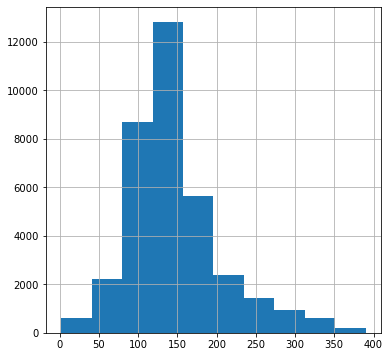

In [140]:
df["m2"].hist(figsize = (6,6));

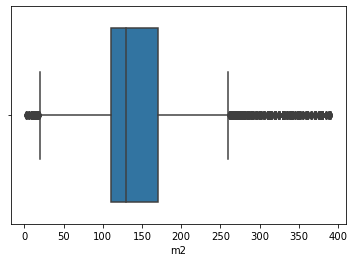

In [141]:
sns.boxplot(x=df["m2"]);

In [142]:
df.describe().T

count           mean            std        min            25%  \
lat    35470.0      39.921513       0.065378  38.938118      39.882298   
lng    35470.0      32.793126       0.111956  31.900515      32.755108   
price  35470.0  292672.982210  236012.190645  50.000000  145000.000000   
m2     35470.0     144.798647      60.380051   2.000000     110.000000   

                 50%            75%           max  
lat        39.913775      39.971820  4.050664e+01  
lng        32.828048      32.858105  3.354567e+01  
price  255000.000000  398000.000000  1.300000e+06  
m2        130.000000     170.000000  3.900000e+02

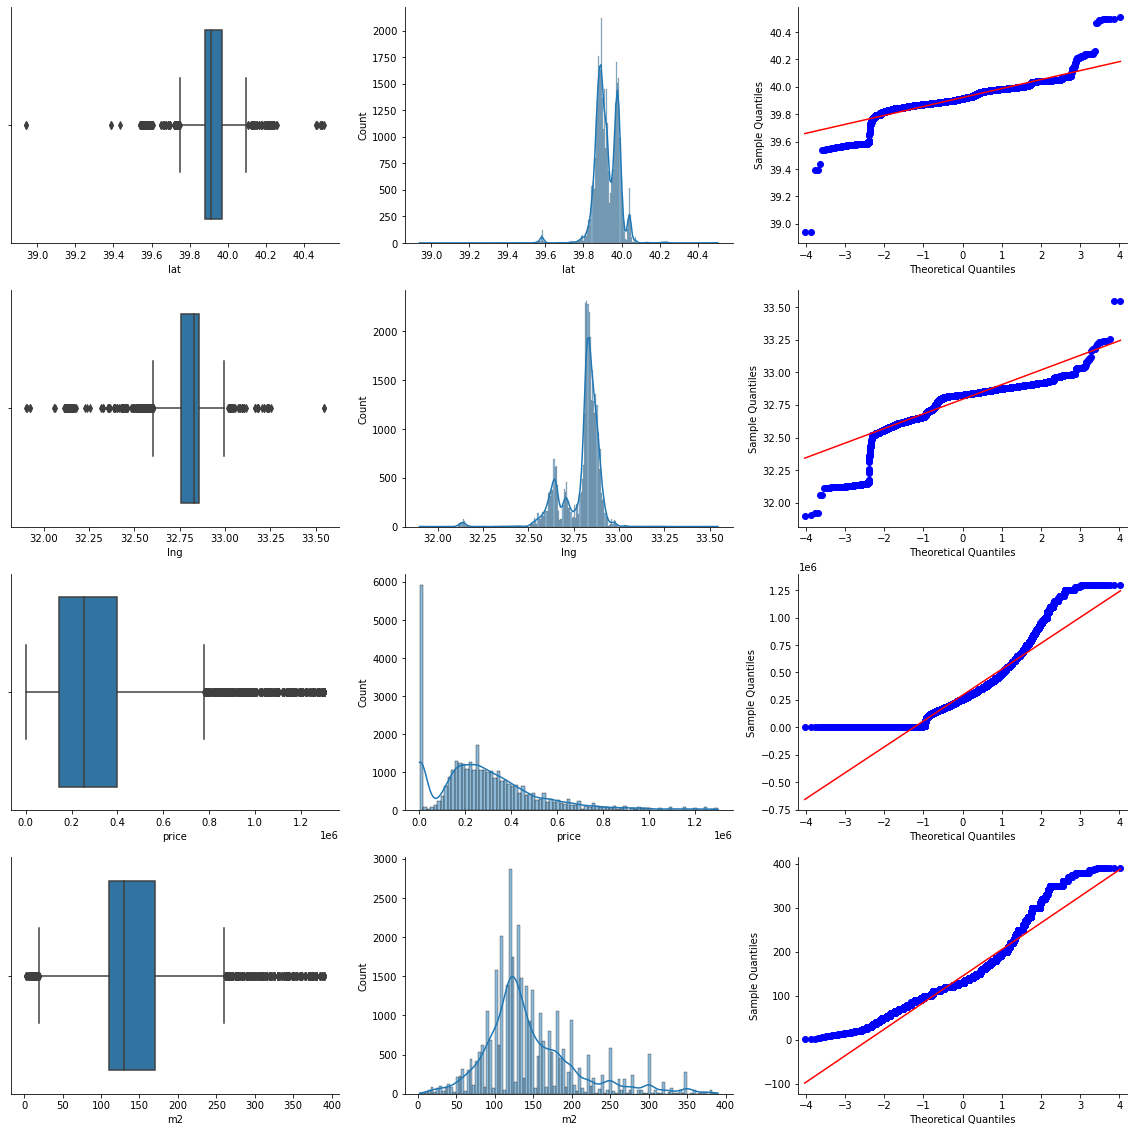

In [143]:
numeric=["lat","lng","price","m2"]
f, axes = plt.subplots(len(numeric), 3, figsize=(20, 20))
sns.despine(right=True)
count=0
for i in range(len(numeric)):
    sns.boxplot(x=df[numeric[count]], ax=axes[i,0])
    sns.histplot(x=df[numeric[count]], ax=axes[i,1], kde=True)
    sm.qqplot(data=df.loc[:,numeric[count]], line="s", ax=axes[i,2])
    count=count+1

High frequencies at low price in the variable price indicate that the relevant properties are rented.Çünkü; Because; price values are small and numerous. Maximum value of the first bin is 15525.Prices less than 15525 have a very high frequency(5833). When we examine the other variables in the ads with a price less than 15525, it can be determined that the properties are rented.But; There are also advertisements with rental status greater than 15525 and the other limit of 31001 price range. For example; ad_id has 15160, villa type and 350 m2.Its price is 22000.When the variables other than the price of the property are examined, it turns out that the price is for rent.It appeared that ads with a price greater than 31000 might be for sale.Therefore, it was determined that those with a price less than 31001 were for rent.The reason why we call the properties for rent is its price is low and their frequency is high.Since separating rents and sales may be useful in our future analysis, we created a new variable and showed the rents with 0 and the sales with 1.

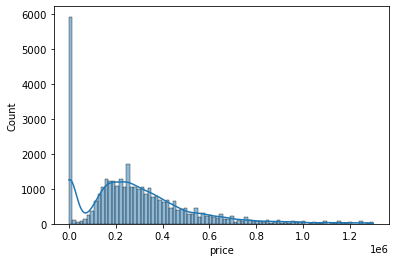

In [144]:
sns.histplot(x=df["price"], kde=True);

In [145]:
np.histogram_bin_edges(df["price"], bins='auto')

array([5.00000000e+01, 1.53435294e+04, 3.06370588e+04, 4.59305882e+04,
       6.12241176e+04, 7.65176471e+04, 9.18111765e+04, 1.07104706e+05,
       1.22398235e+05, 1.37691765e+05, 1.52985294e+05, 1.68278824e+05,
       1.83572353e+05, 1.98865882e+05, 2.14159412e+05, 2.29452941e+05,
       2.44746471e+05, 2.60040000e+05, 2.75333529e+05, 2.90627059e+05,
       3.05920588e+05, 3.21214118e+05, 3.36507647e+05, 3.51801176e+05,
       3.67094706e+05, 3.82388235e+05, 3.97681765e+05, 4.12975294e+05,
       4.28268824e+05, 4.43562353e+05, 4.58855882e+05, 4.74149412e+05,
       4.89442941e+05, 5.04736471e+05, 5.20030000e+05, 5.35323529e+05,
       5.50617059e+05, 5.65910588e+05, 5.81204118e+05, 5.96497647e+05,
       6.11791176e+05, 6.27084706e+05, 6.42378235e+05, 6.57671765e+05,
       6.72965294e+05, 6.88258824e+05, 7.03552353e+05, 7.18845882e+05,
       7.34139412e+05, 7.49432941e+05, 7.64726471e+05, 7.80020000e+05,
       7.95313529e+05, 8.10607059e+05, 8.25900588e+05, 8.41194118e+05,
      

In [146]:
len(df.loc[df["price"] < 15525])

5917

In [147]:
df.loc[df["price"] < 15525]

ad_id                                           ad_title        lat  \
2315   33535895                              Devren Satılık Market  39.961340   
2426   33417930            Şeker mahallesinde 150m2 kiralık dükkan  39.966831   
2432   30405331  ANKREA'DAN MAHALL ANKARA DA FARKLI OFİS SEÇENE...  39.907860   
2433   33505323  YILDIRIM KULE YAPILI MANZARALI 90 M2 KİRALIK OFİS  39.885592   
2435   33362018  ANKREA'DAN MAHALL B BLOK'TA NET 240 M2 KDV'Lİ ...  39.908016   
...         ...                                                ...        ...   
36970  33408148         Çayyolu Angora Evlerinde 3+1 Kiralık Daire  39.883993   
36971  23744481  PARKORANDA A BLOKLARDA KİRALIK 1+1 MOBİLYALI D...  39.846542   
36972  33587472  BEYSU KONAKLARINDA 4+2, 266m2, EN İYİ KONUMDA ...  39.887654   
36973  33581038  DOST'TAN MUSTAFA KEMALDE MOBİLYALI 2+1 90 M2 2...  39.915348   
36974  33122158   ONE TOWER LUXURY NEW FURNİSHED WİTH AMAZİNG WİEW  39.849264   

             lng    price     m2             type     posted  
2315   32.588434  12000.0   19.0  Dükkan & Mağaza 2019-06-14  
2426   32.662187   1500.0  150.0  Dükkan & Mağaza 2019-06-11  
2432   32.752926   2200.0   80.0             Ofis 2019-06-13  
2433   32.813047   3200.0   90.0             Ofis 2019-06-14  
2435   32.752863  10000.0  300.0             Ofis 2019-06-13  
...          ...      ...    ...              ...        ...  
36970  32.726188   2550.0  175.0            Daire 2019-06-10  
36971  32.834549   3000.0   82.0            Daire 2019-06-21  
36972  32.712282   8250.0  300.0            Daire 2019-06-22  
36973  32.769235   2500.0   95.0            Daire 2019-06-21  
36974  32.834913  15000.0  220.0        Residence 2019-06-04  

[5917 rows x 8 columns]

In [148]:
df.loc[(df["price"] > 15525) & (df["price"] < 31001)]

ad_id                                           ad_title        lat  \
337    33224443  RESİTALden AYDINLIKEVLERde DEVREN Satılık ADIY...  39.962410   
957    31581732  GEST GAYRİMENKULDEN ŞERİFLİKOÇHİSAR KALE 'DE S...  38.938118   
1049   33526235  FAAL PLOTTER VE KOPYALAMA MERKEZİ SOKULLU MEHM...  39.894302   
1481   32633135  REŞADİYE'DEN İLKER CAD'Sİ ÜZERİ DEVREN YAPILI ...  39.876722   
1623   32002600  YILDIRIM GAYRİMENKUL'DEN ACİL DEVREN SATILIK Y...  39.911975   
...         ...                                                ...        ...   
36646  32848504                                Park Oran Konutları  39.846453   
36672  32754401          Oran Villa, Güvenlik, Kapalı Yüzme Havuzu  39.848769   
36944  18843857          PARK ORAN DA ÖZEL PEYZAJ MANZARASIYLA 5+1  39.846471   
36958  33090771      PARKORANDA ( D BLOKTA) 5+1 KİRALIK BAHÇE KATI  39.846302   
36962  32547948    BÜYÜKELÇİLİKLERE PARK ORAN DA KİRALIK 5+1 255m2  39.847469   

             lng    price     m2             type     posted  
337    32.874640  24750.0   50.0            Genel 2019-06-10  
957    33.545668  24000.0   73.0             Depo 2019-06-07  
1049   32.834270  20000.0   80.0  Dükkan & Mağaza 2019-06-13  
1481   32.837728  18000.0   70.0  Dükkan & Mağaza 2019-06-14  
1623   32.911674  25000.0   60.0  Dükkan & Mağaza 2019-06-08  
...          ...      ...    ...              ...        ...  
36646  32.833231  18000.0  320.0            Daire 2019-06-24  
36672  32.832851  22000.0  350.0            Villa 2019-06-16  
36944  32.833285  20000.0  300.0        Residence 2019-06-27  
36958  32.832992  22000.0  300.0            Daire 2019-06-21  
36962  32.832461  30000.0  300.0            Daire 2019-07-01  

[94 rows x 8 columns]

In [149]:
df.loc[df["price"] < 31001]

ad_id                                           ad_title        lat  \
337    33224443  RESİTALden AYDINLIKEVLERde DEVREN Satılık ADIY...  39.962410   
957    31581732  GEST GAYRİMENKULDEN ŞERİFLİKOÇHİSAR KALE 'DE S...  38.938118   
1049   33526235  FAAL PLOTTER VE KOPYALAMA MERKEZİ SOKULLU MEHM...  39.894302   
1481   32633135  REŞADİYE'DEN İLKER CAD'Sİ ÜZERİ DEVREN YAPILI ...  39.876722   
1623   32002600  YILDIRIM GAYRİMENKUL'DEN ACİL DEVREN SATILIK Y...  39.911975   
...         ...                                                ...        ...   
36970  33408148         Çayyolu Angora Evlerinde 3+1 Kiralık Daire  39.883993   
36971  23744481  PARKORANDA A BLOKLARDA KİRALIK 1+1 MOBİLYALI D...  39.846542   
36972  33587472  BEYSU KONAKLARINDA 4+2, 266m2, EN İYİ KONUMDA ...  39.887654   
36973  33581038  DOST'TAN MUSTAFA KEMALDE MOBİLYALI 2+1 90 M2 2...  39.915348   
36974  33122158   ONE TOWER LUXURY NEW FURNİSHED WİTH AMAZİNG WİEW  39.849264   

             lng    price     m2             type     posted  
337    32.874640  24750.0   50.0            Genel 2019-06-10  
957    33.545668  24000.0   73.0             Depo 2019-06-07  
1049   32.834270  20000.0   80.0  Dükkan & Mağaza 2019-06-13  
1481   32.837728  18000.0   70.0  Dükkan & Mağaza 2019-06-14  
1623   32.911674  25000.0   60.0  Dükkan & Mağaza 2019-06-08  
...          ...      ...    ...              ...        ...  
36970  32.726188   2550.0  175.0            Daire 2019-06-10  
36971  32.834549   3000.0   82.0            Daire 2019-06-21  
36972  32.712282   8250.0  300.0            Daire 2019-06-22  
36973  32.769235   2500.0   95.0            Daire 2019-06-21  
36974  32.834913  15000.0  220.0        Residence 2019-06-04  

[6011 rows x 8 columns]

Since separating rents and sales may be useful in our future analysis, we created a new variable and showed the rents with 0 and the sales with 1.

In [51]:
df["buy/rent"] = np.where(df["price"]<31001, 0, 1)

In [53]:
df

ad_id                                           ad_title        lat  \
0      33317214       OSTİM BAĞDAT CADDESİNDE SATILIK OFİS/BÜROLAR  39.964565   
1      26440906  ACİLLL,FİYAT DÜŞTÜ İVEDİK OSB,MELİH GÖKÇEK'DE ...  40.000498   
2      33511467          YILDIRIM KULE 19.KATTA 90 M2 SATILIK OFİS  39.884835   
3      27633894          HAZIR MÜŞTERİLİ FULL YAPILI DEVREN İŞYERİ  39.894921   
4      30998944     YAŞAMKENT BESA KARİNA PLAZA'DA SATILIK İŞ YERİ  39.856465   
...         ...                                                ...        ...   
36970  33408148         Çayyolu Angora Evlerinde 3+1 Kiralık Daire  39.883993   
36971  23744481  PARKORANDA A BLOKLARDA KİRALIK 1+1 MOBİLYALI D...  39.846542   
36972  33587472  BEYSU KONAKLARINDA 4+2, 266m2, EN İYİ KONUMDA ...  39.887654   
36973  33581038  DOST'TAN MUSTAFA KEMALDE MOBİLYALI 2+1 90 M2 2...  39.915348   
36974  33122158   ONE TOWER LUXURY NEW FURNİSHED WİTH AMAZİNG WİEW  39.849264   

             lng     price     m2             type     posted  buy/rent  
0      32.756947  280000.0   52.0  Dükkan & Mağaza 2019-06-10         1  
1      32.764535  725000.0  210.0  Dükkan & Mağaza 2019-06-14         1  
2      32.812957  900000.0   90.0             Ofis 2019-06-14         1  
3      32.836332   65000.0  120.0  Dükkan & Mağaza 2019-06-13         1  
4      32.645285  560000.0   70.0       Plaza Katı 2019-06-14         1  
...          ...       ...    ...              ...        ...       ...  
36970  32.726188    2550.0  175.0            Daire 2019-06-10         0  
36971  32.834549    3000.0   82.0            Daire 2019-06-21         0  
36972  32.712282    8250.0  300.0            Daire 2019-06-22         0  
36973  32.769235    2500.0   95.0            Daire 2019-06-21         0  
36974  32.834913   15000.0  220.0        Residence 2019-06-04         0  

[35470 rows x 9 columns]

**4-Research Question:**

Is there an advertisement written for "Kiralık" in ad_title and its price is over 31000 in the description? The answer is No.

In [52]:
np.where(df["ad_title"].str.contains("kiralık") & df["price"]>31000)

(array([], dtype=int64),)

Normality test of final values:

For testing normality,  Shapiro-Wilk’s W test and Kolmogorov-Smirnov tests can be used.However, both tests are sensitive to outliers and are influenced by sample size.

* Shapiro-Wilk’s W test is generally preffered for smaller samples. 
* If n is greater than 100, Kolmogorov-Smirnov is generally preferred

**Please be aware that if your data set contains outliers, these results may not reflect the real situation.**

$H_{0}$: The data is normally distributed.  
$H_{1}$: The data is not normally distributed.  
Assume that alpha=0.05 If p-value is >0.05, it can be said that data is normality distributed.

In [153]:
#If n is greater than 100, Kolmogorov-Smirnov is generally preferred.
test_stat_kolmogorov_a1, p_value_kolmogorov_a1=stats.kstest(df["lat"],"norm")
test_stat_kolmogorov_a2, p_value_kolmogorov_a2=stats.kstest(df["lng"],"norm")
test_stat_kolmogorov_a3, p_value_kolmogorov_a3=stats.kstest(df["m2"],"norm")
test_stat_kolmogorov_a4, p_value_kolmogorov_a4=stats.kstest(df["price"],"norm")
print("For array1 p value:%.6f" % p_value_kolmogorov_a1)
print("For array2 p value:%.6f" % p_value_kolmogorov_a2)
print("For array3 p value:%.6f" % p_value_kolmogorov_a3)
print("For array4 p value:%.6f" % p_value_kolmogorov_a4)

For array1 p value:0.000000
For array2 p value:0.000000
For array3 p value:0.000000
For array4 p value:0.000000


All of numeric values does not distributed normally according to kolmogorov-Smirnov normality test.

### Categoric attributes

Since ad_id variable has too many unique values, it was not possible to visualize it with bar plot. The ad_id is labeled for the visualization. Looking at the histogram plot of the labeled ad_id observations, we see an almost uniform distribution. Because ad_id values are not duplicate and they are specific to ad. Since ad_id values are unique, they are not useful in explaining the variance(aka information) in the data set.

Since ad_title variable has too many unique values, it was not possible to visualize it with bar plot. The ad_title is labeled for the visualization.The labeled ad_title also shows an approximately uniform distribution.We expect it to be like this because we do not expect a data set where advertisements with the same definition are concentrated.

We see a concentration in different regions in the type variable.Most of the observations (about 30000) in the largest concentration data set are concentrated around Daire ve Dükkan & Mağaza class values.The total number of "daire" advertisements in the data set is 28033. About 80% of the dataset are "Daire postings.This corresponds to a large percentage.In addition, Daire, Dükkan & Mağaza, Ofis,Apartman Dairesi,Bina,Residence,Villa,Plaza Katı,Müstakil Ev,Genel,Plaza make up 99% of all postings.Since it is not correct for "Daire" ve "Apartman dairesi" to be in different classes, the class from "Apartman dairesi" has been changed to "Daire".Since "loft daire" is an "Daire", it has been redefined under the "Daire" class."Çiftlik Evi" and "Çiftlik" are grouped under "Çiftlik".We defined commercial and residential properties by creating a new variable (property) for future studies.Residential properties is indicated by 1 and commercial properties by 0.The "Genel" type could not be assigned to the new variable because the property type is not specified.Therefore, since the "Genel" cannot be assigned to the new variable, a missing observation will occur in the new variable for its observations.In order to get rid of lost data, number of observations of "Genel"  is too low (230), so we remove "Genel" from the data set.Thus, we have a true label variable for the property type.We will use "property" variable in classification problem application and hypothesis testing.

Since ad_id variable has too many unique values, it was not possible to visualize it with bar plot. The ad_id is labeled for the visualization.

In [154]:
len(df["ad_id"].unique())

35470

In [53]:
le = preprocessing.LabelEncoder()
df["new_ad_id"] = le.fit_transform(df.ad_id)

In [54]:
e2 = {'col1': df.new_ad_id.unique(), 'col2': le.inverse_transform(df.new_ad_id.unique())}
e2_kontrol = pd.DataFrame(data=e2)
e2_kontrol.sort_values(by=['col1'])

col1      col2
35140      0  10010942
21246      1  10047755
21104      2  10049185
17169      3  10051694
13716      4  10109281
...      ...       ...
34253  35465   9818945
16066  35466   9891527
3017   35467   9928586
19839  35468   9951647
20312  35469   9972383

[35470 rows x 2 columns]

Looking at the histogram plot of the labeled ad_id observations, we see an almost uniform distribution. Because ad_id values are not duplicate and they are specific to ad. Since ad_id values are unique, they are not useful in explaining the variance(aka information) in the data set.

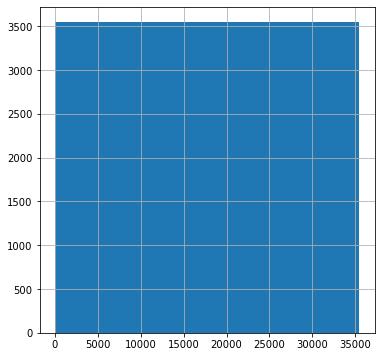

In [157]:
df["new_ad_id"].hist(figsize = (6,6));

Since ad_title variable has too many unique values, it was not possible to visualize it with bar plot. The ad_title is labeled for the visualization.

In [158]:
len(df["ad_title"].unique())

35470

In [55]:
le = preprocessing.LabelEncoder()
df["new_ad_title"] = le.fit_transform(df.ad_title)

In [56]:
e3 = {'col1': df.new_ad_title.unique(), 'col2': le.inverse_transform(df.new_ad_title.unique())}
e3_kontrol = pd.DataFrame(data=e3)
e3_kontrol.sort_values(by=['col1'])

col1                                               col2
12779      0   ALACAATLI' DA PARK CADDESİ YAKINI MUHTEŞEM ÇA...
32053      1   YAŞAMKENT MERKEZ'DE GÜVENLİKLİ SİTEDE SIFIR A...
34022      2   YAŞAMKENT MERKEZDE GÜVENLİKLİ SİTEDE EŞYALI H...
29777      3  ! DİKMEN CADDESİ YAKINI 3+1 MANZARALI SATILIK ...
25149      4  ! EŞREF ÖZANT SOKAK DOSTLAR SİTESİNDE 4+1 ARAK...
...      ...                                                ...
13220  35465            şehitlik mah satılık daire bektas emlak
12719  35466                             şehitlik satılık daire
17208  35467  şentepe teleferik istasyonu yakını ana cadde d...
13132  35468  şentepe çiğdemtepede 3+12. kat geniş teras bal...
28009  35469  şok şok şok EV SAHİBİ olmak isteyenlere kat ko...

[35470 rows x 2 columns]

The labeled ad_title also shows an approximately uniform distribution.We expect it to be like this because we do not expect a data set where advertisements with the same definition are concentrated.

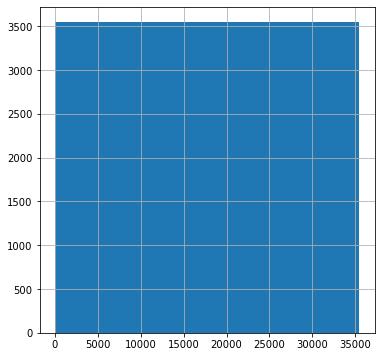

In [161]:
df["new_ad_title"].hist(figsize = (6,6));

We see a concentration in different regions in the type variable.Most of the observations (about 30000) in the largest concentration data set are concentrated around Daire ve Dükkan & Mağaza class values.The total number of "daire" advertisements in the data set is 28033. About 80% of the dataset are "Daire postings.This corresponds to a large percentage.In addition, Daire, Dükkan & Mağaza, Ofis,Apartman Dairesi,Bina,Residence,Villa,Plaza Katı,Müstakil Ev,Genel,Plaza make up 99% of all postings.Since it is not correct for "Daire" ve "Apartman dairesi" to be in different classes, the class from "Apartman dairesi" has been changed to "Daire".Since "loft daire" is an "Daire", it has been redefined under the "Daire" class."Çiftlik Evi" and "Çiftlik" are grouped under "Çiftlik".We defined commercial and residential properties by creating a new variable (property) for future studies.Residential properties is indicated by 1 and commercial properties by 0.The "Genel" type could not be assigned to the new variable because the property type is not specified.Therefore, since the "Genel" cannot be assigned to the new variable, a missing observation will occur in the new variable for its observations.In order to get rid of lost data, number of observations of "Genel"  is too low (230), so we remove "Genel" from the data set.Thus, we have a true label variable for the property type.We will use "property" variable in classification problem application and hypothesis testing.

We see a concentration in different regions in the type variable.Most of the observations (about 30000) in the largest concentration data set are concentrated around Daire ve Dükkan & Mağaza class values.The total number of "daire" advertisements in the data set is 28033. About 80% of the dataset are "Daire postings.This corresponds to a large percentage.In addition, Daire, Dükkan & Mağaza, Ofis,Apartman Dairesi,Bina,Residence,Villa,Plaza Katı,Müstakil Ev,Genel,Plaza make up 99% of all postings.

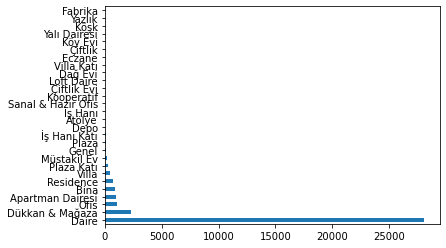

In [162]:
df["type"].value_counts().plot.barh();

In [163]:
df.shape

(35470, 11)

In [164]:
len(df["type"].unique())

28

In [165]:
df["type"].value_counts()

Daire                 28033
Dükkan & Mağaza        2281
Ofis                   1060
Apartman Dairesi       1004
Bina                    907
Residence               683
Villa                   468
Plaza Katı              268
Müstakil Ev             232
Genel                   142
Plaza                   109
İş Hanı Katı             66
Depo                     45
Atölye                   30
İş Hanı                  29
Sanal & Hazır Ofis       28
Kooperatif               20
Çiftlik Evi              18
Loft Daire               16
Dağ Evi                   8
Villa Katı                8
Eczane                    8
Çiftlik                   2
Köy Evi                   1
Yalı Dairesi              1
Köşk                      1
Yazlık                    1
Fabrika                   1
Name: type, dtype: int64

Since it is not correct for "Daire" ve "Apartman dairesi" to be in different classes, the class from "Apartman dairesi" has been changed to "Daire"

In [57]:
df["type"].replace("Apartman Dairesi", "Daire", inplace=True)

Since "loft daire" is an "Daire", it has been redefined under the "Daire" class.

In [58]:
df["type"].replace("Loft Daire", "Daire", inplace=True)

"Çiftlik Evi" and "Çiftlik" are grouped under "Çiftlik"

In [59]:
df["type"].replace("Çiftlik Evi", "Çiftlik", inplace=True)

In [169]:
df["type"].value_counts()

Daire                 29053
Dükkan & Mağaza        2281
Ofis                   1060
Bina                    907
Residence               683
Villa                   468
Plaza Katı              268
Müstakil Ev             232
Genel                   142
Plaza                   109
İş Hanı Katı             66
Depo                     45
Atölye                   30
İş Hanı                  29
Sanal & Hazır Ofis       28
Çiftlik                  20
Kooperatif               20
Dağ Evi                   8
Villa Katı                8
Eczane                    8
Köy Evi                   1
Yalı Dairesi              1
Köşk                      1
Yazlık                    1
Fabrika                   1
Name: type, dtype: int64

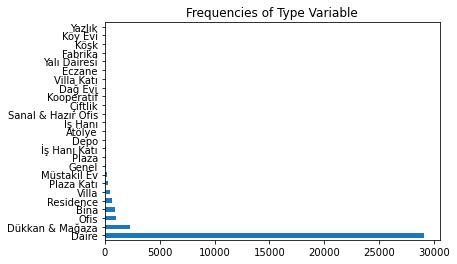

In [62]:
df["type"].value_counts().plot.barh().set_title("Frequencies of Type Variable");

We defined commercial and residential properties by creating a new variable (property) for future studies.Residential properties is indicated by 1 and commercial properties by 0.The "Genel" type could not be assigned to the new variable because the property type is not specified.Therefore, since the "Genel" cannot be assigned to the new variable, a missing observation will occur in the new variable for its observations.In order to get rid of lost data, number of observations of "Genel"  is too low (230), so we remove "Genel" from the data set.Thus, we have a true label variable for the property type.We will use "property" variable in classification problem application and hypothesis testing.

In [171]:
df.loc[df["type"] == "Genel"]

ad_id                                           ad_title        lat  \
80    32852385  BORSEM'DEN SİNPAŞ ALTINORAN KULE'DE SATILIK LÜ...  39.844449   
86    33498513          DEVREN SATILIK UNLU MAMULLER VE PASTAHANE  39.972814   
106   32864057  MEŞRUTİYET SELANİK KIZILAY MERKEZ 5+1 MASRAFSI...  39.917988   
138   31576791  Kızılay Necatibey'de Yatırımcıya 2500 TL Sağla...  39.925150   
168   33300572     YENİZİRAATT TE 3KATLI 250M2 İŞ YERİ.825.000 TL  39.956464   
...        ...                                                ...        ...   
6206  29310853  AĞAHAN GAYRİMENKUL'DEN ESKİŞEHİR YOLU ÜZERİ Kİ...  39.887427   
6229  33173520         AKKENT PARADİSE'DA CADDE ÜZERİ 50M2 DÜKKAN  39.989716   
6269  33146164  TURGUT ÖZAL BÜYÜK GÖBEKTE BULVAR ÜZERİ KİRALIK...  39.987579   
6319  33497400                         Acil Devren Kiralik Dükkan  39.962816   
6329  27456045                  GENÇLİK PARKINDA ÇAY BAHÇESİ-KAFE  39.938484   

            lng     price     m2   type     posted  buy/rent  new_ad_id  \
80    32.854495  690000.0  107.0  Genel 2019-06-11         1      16283   
86    32.909557   90000.0  165.0  Genel 2019-06-13         1      30195   
106   32.857597  384000.0  165.0  Genel 2019-06-10         1      16412   
138   32.852344  460000.0  160.0  Genel 2019-06-14         1       7657   
168   32.855662  825000.0  250.0  Genel 2019-06-10         1      24277   
...         ...       ...    ...    ...        ...       ...        ...   
6206  32.650290    3250.0  300.0  Genel 2019-06-10         0       3524   
6229  32.710009    2750.0   50.0  Genel 2019-06-17         0      21473   
6269  32.692285    4000.0  165.0  Genel 2019-06-17         0      20851   
6319  32.768829  180000.0   50.0  Genel 2019-06-07         1      30135   
6329  32.851567    1850.0  150.0  Genel 2019-06-17         0       2212   

      new_ad_title  
80            7790  
86           10044  
106          21587  
138          20309  
168          29850  
...            ...  
6206          5058  
6229          1986  
6269         27797  
6319          4547  
6329         15725  

[142 rows x 11 columns]

In [172]:
len(df["type"].value_counts())

25

In [60]:
df.drop(df.loc[df["type"] == "Genel"].index, inplace=True)

In [174]:
df["type"].unique()

array(['Dükkan & Mağaza', 'Ofis', 'Plaza Katı', 'Daire', 'İş Hanı Katı',
       'Plaza', 'Bina', 'Depo', 'İş Hanı', 'Atölye', 'Villa', 'Fabrika',
       'Eczane', 'Sanal & Hazır Ofis', 'Çiftlik', 'Villa Katı',
       'Müstakil Ev', 'Dağ Evi', 'Residence', 'Köşk', 'Kooperatif',
       'Köy Evi', 'Yazlık', 'Yalı Dairesi'], dtype=object)

In [175]:
df["type"].value_counts()

Daire                 29053
Dükkan & Mağaza        2281
Ofis                   1060
Bina                    907
Residence               683
Villa                   468
Plaza Katı              268
Müstakil Ev             232
Plaza                   109
İş Hanı Katı             66
Depo                     45
Atölye                   30
İş Hanı                  29
Sanal & Hazır Ofis       28
Çiftlik                  20
Kooperatif               20
Villa Katı                8
Dağ Evi                   8
Eczane                    8
Köy Evi                   1
Yalı Dairesi              1
Köşk                      1
Yazlık                    1
Fabrika                   1
Name: type, dtype: int64

In [61]:
df["property"] = np.where((df["type"]=="Daire")|(df["type"]=="Residence")|(df["type"]=="Villa")|(df["type"]=="Müstakil Ev")|(df["type"]=="Kooperatif")|(df["type"]=="Villa Katı")|(df["type"]=="Dağ Evi")|(df["type"]=="Köy Evi")|(df["type"]=="Yalı Dairesi")|(df["type"]=="Yazlık")|(df["type"]=="Köşk"), 1,0)

In [177]:
df

ad_id                                           ad_title        lat  \
0      33317214       OSTİM BAĞDAT CADDESİNDE SATILIK OFİS/BÜROLAR  39.964565   
1      26440906  ACİLLL,FİYAT DÜŞTÜ İVEDİK OSB,MELİH GÖKÇEK'DE ...  40.000498   
2      33511467          YILDIRIM KULE 19.KATTA 90 M2 SATILIK OFİS  39.884835   
3      27633894          HAZIR MÜŞTERİLİ FULL YAPILI DEVREN İŞYERİ  39.894921   
4      30998944     YAŞAMKENT BESA KARİNA PLAZA'DA SATILIK İŞ YERİ  39.856465   
...         ...                                                ...        ...   
36970  33408148         Çayyolu Angora Evlerinde 3+1 Kiralık Daire  39.883993   
36971  23744481  PARKORANDA A BLOKLARDA KİRALIK 1+1 MOBİLYALI D...  39.846542   
36972  33587472  BEYSU KONAKLARINDA 4+2, 266m2, EN İYİ KONUMDA ...  39.887654   
36973  33581038  DOST'TAN MUSTAFA KEMALDE MOBİLYALI 2+1 90 M2 2...  39.915348   
36974  33122158   ONE TOWER LUXURY NEW FURNİSHED WİTH AMAZİNG WİEW  39.849264   

             lng     price     m2             type     posted  buy/rent  \
0      32.756947  280000.0   52.0  Dükkan & Mağaza 2019-06-10         1   
1      32.764535  725000.0  210.0  Dükkan & Mağaza 2019-06-14         1   
2      32.812957  900000.0   90.0             Ofis 2019-06-14         1   
3      32.836332   65000.0  120.0  Dükkan & Mağaza 2019-06-13         1   
4      32.645285  560000.0   70.0       Plaza Katı 2019-06-14         1   
...          ...       ...    ...              ...        ...       ...   
36970  32.726188    2550.0  175.0            Daire 2019-06-10         0   
36971  32.834549    3000.0   82.0            Daire 2019-06-21         0   
36972  32.712282    8250.0  300.0            Daire 2019-06-22         0   
36973  32.769235    2500.0   95.0            Daire 2019-06-21         0   
36974  32.834913   15000.0  220.0        Residence 2019-06-04         0   

       new_ad_id  new_ad_title  property  
0          24669         23132         0  
1           1778          1678         0  
2          30996         29960         0  
3           2298         17218         0  
4           5776         29469         0  
...          ...           ...       ...  
36970      27098         32444         1  
36971        959         23548         1  
36972      35194          7341         1  
36973      35003         10126         1  
36974      20402         22895         1  

[35328 rows x 12 columns]

### Relationship Analysis

Correlation is a bivariate analysis that measures the strength of association between two variables and the direction of the relationship

Correlation analyzes of continuous variables were made.

Pearson r correlation: Pearson r correlation is the most widely used correlation statistic to measure the degree of the relationship between linearly related variables.For the Pearson r correlation, both variables should be normally distributed (normally distributed variables have a bell-shaped curve).  Other assumptions include linearity and homoscedasticity.  Linearity assumes a straight line relationship between each of the two variables and homoscedasticity assumes that data is equally distributed about the regression line.

lat-lng ------ weak

lat-m2 ------ very weak

lat-price ------ very weak

lng-m2 ------ very weak

lng-price ------ very weak

m2-price ------ moderate

In [178]:
df[["lat","lng","m2","price"]].corr()

lat       lng        m2     price
lat    1.000000  0.278221 -0.046343 -0.059812
lng    0.278221  1.000000 -0.055860 -0.049188
m2    -0.046343 -0.055860  1.000000  0.422783
price -0.059812 -0.049188  0.422783  1.000000

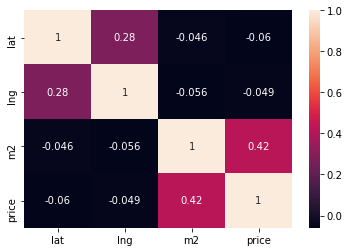

In [179]:
sns.heatmap(df[["lat","lng","m2","price"]].corr("pearson"), annot=True);

**5-Research Question:**

Is there a statistically significant relationship variables?

#### Correlation Test

**Ho:** Correlation between variables is not significant

**Ha:** Correlation between variables is significant

In [180]:
colnames = list(df[["lat","lng","m2","price"]])
colnames

['lat', 'lng', 'm2', 'price']

In [181]:
comb = list(combinations(colnames, 2))
binary_selections = [list(i) for i in set(tuple(i) for i in comb)]

In [182]:
df[binary_selections[1]]

lng     price
0      32.756947  280000.0
1      32.764535  725000.0
2      32.812957  900000.0
3      32.836332   65000.0
4      32.645285  560000.0
...          ...       ...
36970  32.726188    2550.0
36971  32.834549    3000.0
36972  32.712282    8250.0
36973  32.769235    2500.0
36974  32.834913   15000.0

[35328 rows x 2 columns]

In [183]:
for j in range(0,len(binary_selections)):
    df_temp = df[binary_selections[j]]
    print(df_temp.columns[0] + " | " + df_temp.columns[1], " | P_Value:", stats.pearsonr(df_temp.iloc[:,0],df_temp.iloc[:,1])[1])

lat | lng  | P_Value: 0.0
lng | price  | P_Value: 2.2334632888374488e-20
lat | price  | P_Value: 2.2706345772746447e-29
lng | m2  | P_Value: 8.015521546642336e-26
m2 | price  | P_Value: 0.0
lat | m2  | P_Value: 2.9111062000956464e-18


Since Ho reject, we can conclude that correlations between variables are significant.

Spearman rank correlation is a non-parametric test that is used to measure the degree of association between two variables.  The Spearman rank correlation test does not carry any assumptions about the distribution of the data and is the appropriate correlation analysis when the variables are measured on a scale that is at least ordinal.

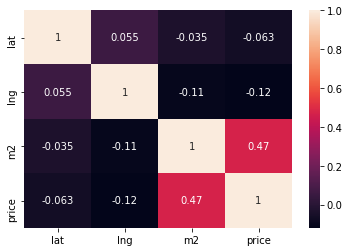

In [184]:
sns.heatmap(df[["lat","lng","m2","price"]].corr("spearman"), annot=True);

lat-lng ------ very weak

lat-m2 ------ very weak

lat-price ------ very weak

lng-m2 ------ very weak

lng-price ------ very weak

m2-price ------ moderate

In [185]:
for j in range(0,len(binary_selections)):
    df_temp = df[binary_selections[j]]
    print(df_temp.columns[0] + " | " + df_temp.columns[1], " | P_Value:", stats.spearmanr(df_temp.iloc[:,0],df_temp.iloc[:,1])[1])

lat | lng  | P_Value: 1.7430967709579355e-25
lng | price  | P_Value: 4.5314246711430185e-113
lat | price  | P_Value: 1.1818235285485082e-32
lng | m2  | P_Value: 1.6722711119550914e-88
m2 | price  | P_Value: 0.0
lat | m2  | P_Value: 3.049041199630404e-11


Since Ho reject, we can conclude that correlations between variables are significant.

Kendall rank correlation is a non-parametric test that measures the strength of dependence between two variables. 

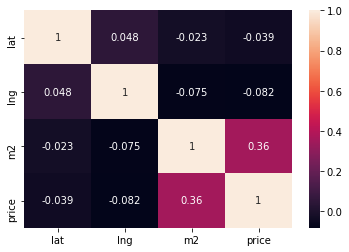

In [186]:
sns.heatmap(df[["lat","lng","m2","price"]].corr("kendall"), annot=True);

lat-lng ------ very weak

lat-m2 ------ very weak

lat-price ------ very weak

lng-m2 ------ very weak

lng-price ------ very weak

m2-price ------ moderate

In [187]:
for j in range(0,len(binary_selections)):
    df_temp = df[binary_selections[j]]
    print(df_temp.columns[0] + " | " + df_temp.columns[1], " | P_Value:", stats.kendalltau(df_temp.iloc[:,0],df_temp.iloc[:,1])[1])

lat | lng  | P_Value: 2.345466934035851e-42
lng | price  | P_Value: 8.460762877865451e-118
lat | price  | P_Value: 1.6618405723962778e-28
lng | m2  | P_Value: 1.2451379719772613e-96
m2 | price  | P_Value: 0.0
lat | m2  | P_Value: 1.3597924827955407e-10


Since Ho reject, we can conclude that correlations between variables are significant.

Thus, although pearson has normality assumption, our numeric variables does not distributed normally. Due to that reason, spearman ve kendall are more suitable for correlation analysis because they have no normality assumption and they are nonparametric.

## Updated Data 

After all changes in data set, we can obtain refined dataset. The following part include descriptive statistics of the updated data set.

### Numeric Variables

In [188]:
df[["lat","lng","price","m2"]].describe().T

count           mean            std        min            25%  \
lat    35328.0      39.921484       0.065419  38.938118      39.882244   
lng    35328.0      32.793092       0.112024  31.900515      32.755160   
price  35328.0  293252.278674  235757.685381  50.000000  145000.000000   
m2     35328.0     144.798007      60.198433   2.000000     110.000000   

                 50%            75%           max  
lat        39.913734      39.971886  4.050664e+01  
lng        32.828037      32.858047  3.354567e+01  
price  255000.000000  399000.000000  1.300000e+06  
m2        130.000000     170.000000  3.900000e+02

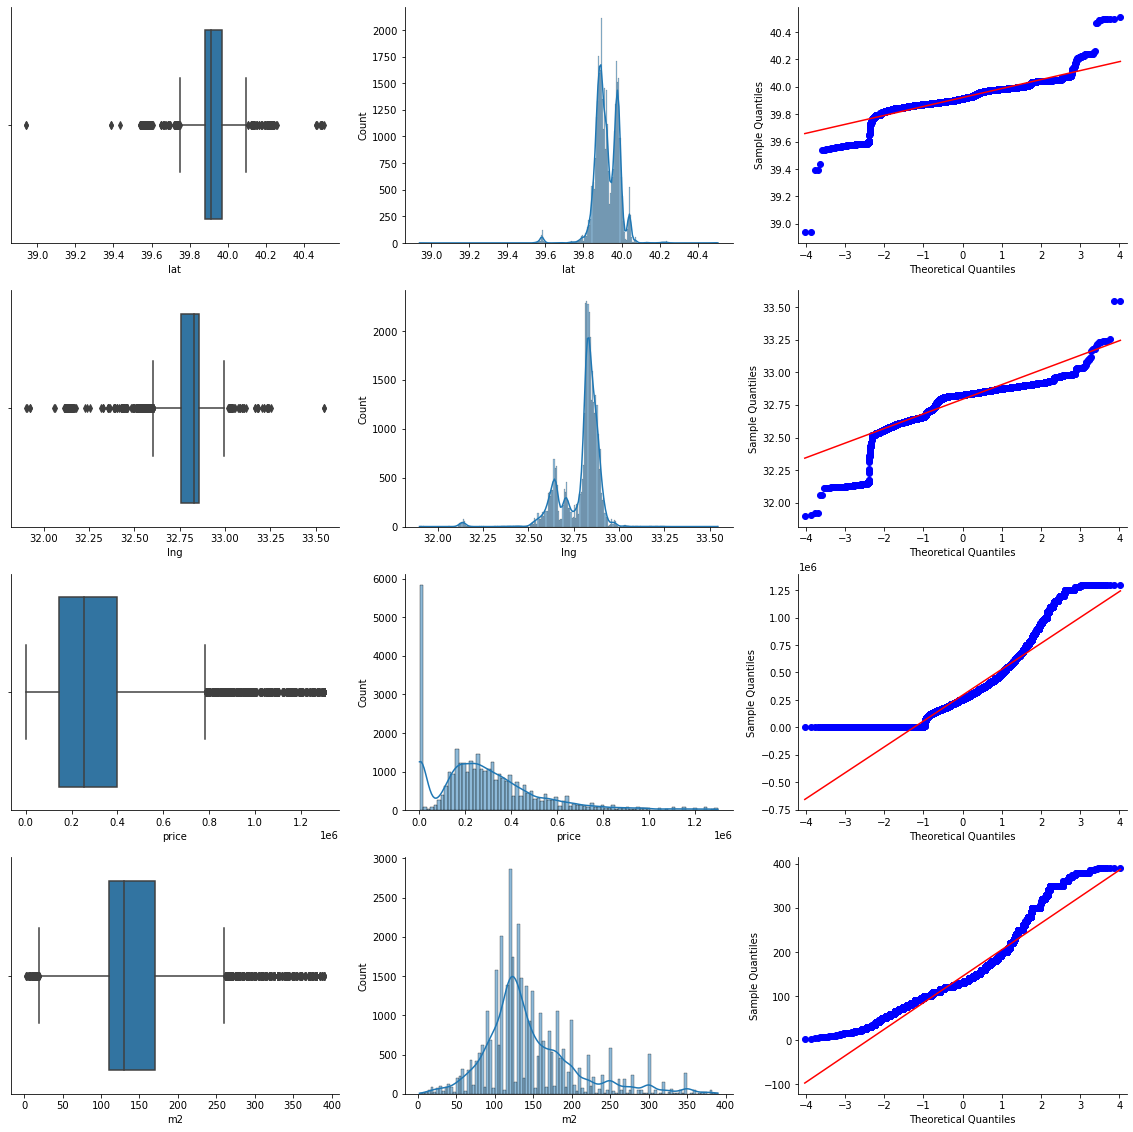

In [189]:
numeric=["lat","lng","price","m2"]
f, axes = plt.subplots(len(numeric), 3, figsize=(20, 20))
sns.despine(right=True)
count=0
for i in range(len(numeric)):
    sns.boxplot(x=df[numeric[count]], ax=axes[i,0])
    sns.histplot(x=df[numeric[count]], ax=axes[i,1], kde=True)
    sm.qqplot(data=df.loc[:,numeric[count]], line="s", ax=axes[i,2])
    count=count+1

### Categorical Variables

Regarding attribute subset selection, ad_id is very low in correlation to the price of the property and with other variables and it does not contain information about them.The ad_id values were used to detect errors in the data as auxiliary variables, but currently it is irrelevant attribute (like TC ID number) and it would be appropriate to exclude it from the data set as it may adversely affect future analysis. Also, ad_title was an auxiliary variable to help detect errors in the data.In the last case, its relationship with other variables is low. It can be considered as a categorical variable, but it has a very different number of values and the values cannot be grouped, preventing it from contributing to the data set.We will not include it in future analysis as it is thought to adversely affect further analysis.The distributions of the two variables in the graphs below show that they do not have a distinguishing feature. We used the posted variable to detect different lines with the same ad ID and determine which one is up to date. In the last case, only 1 of the ads in the data set is in July.Therefore, there is no difference on a monthly basis.It will not work to divide and analyze the observations found in June into different classes. Therefore, when we look at the graph of the posted variable, it cannot be said that it can give much idea about other variables, even though there is a distribution.We will see the posted variable as an auxiliary variable and we will not include it in future analyzes.

Regarding attribute subset selection, ad_id is very low in correlation to the price of the property and with other variables and it does not contain information about them.The ad_id values were used to detect errors in the data as auxiliary variables, but currently it is irrelevant attribute (like TC ID number) and it would be appropriate to exclude it from the data set as it may adversely affect future analysis.

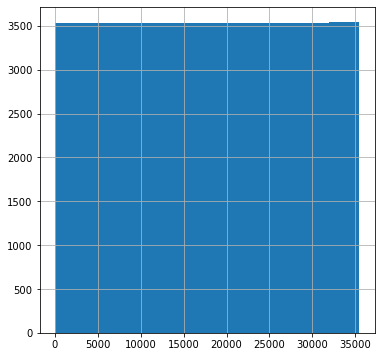

In [190]:
df["new_ad_id"].hist(figsize = (6,6));

ad_title was an auxiliary variable to help detect errors in the data.In the last case, its relationship with other variables is low. It can be considered as a categorical variable, but it has a very different number of values and the values cannot be grouped, preventing it from contributing to the data set.We will not include it in future analysis as it is thought to adversely affect further analysis.

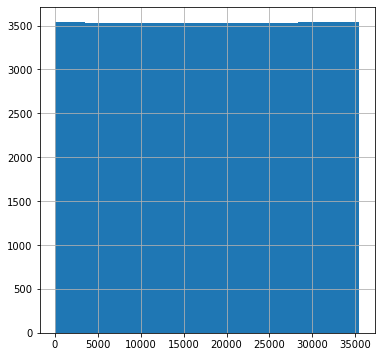

In [191]:
df["new_ad_title"].hist(figsize = (6,6));

In the last case, only 1 of the ads in the data set is in July.Therefore, there is no difference on a monthly basis.It will not work to divide and analyze the observations found in June into different classes. Therefore, when we look at the graph of the posted variable, it cannot be said that it can give much idea about other variables, even though there is a distribution.We will see the posted variable as an auxiliary variable and we will not include it in future analyzes.

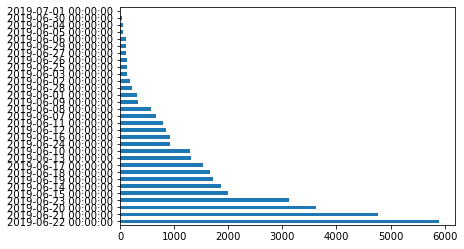

In [192]:
df["posted"].value_counts().plot.barh();

In [62]:
df.drop('new_ad_id',axis='columns', inplace=True)
df.drop('new_ad_title',axis='columns', inplace=True)

In [66]:
df

ad_id                                           ad_title        lat  \
0      33317214       OSTİM BAĞDAT CADDESİNDE SATILIK OFİS/BÜROLAR  39.964565   
1      26440906  ACİLLL,FİYAT DÜŞTÜ İVEDİK OSB,MELİH GÖKÇEK'DE ...  40.000498   
2      33511467          YILDIRIM KULE 19.KATTA 90 M2 SATILIK OFİS  39.884835   
3      27633894          HAZIR MÜŞTERİLİ FULL YAPILI DEVREN İŞYERİ  39.894921   
4      30998944     YAŞAMKENT BESA KARİNA PLAZA'DA SATILIK İŞ YERİ  39.856465   
...         ...                                                ...        ...   
36970  33408148         Çayyolu Angora Evlerinde 3+1 Kiralık Daire  39.883993   
36971  23744481  PARKORANDA A BLOKLARDA KİRALIK 1+1 MOBİLYALI D...  39.846542   
36972  33587472  BEYSU KONAKLARINDA 4+2, 266m2, EN İYİ KONUMDA ...  39.887654   
36973  33581038  DOST'TAN MUSTAFA KEMALDE MOBİLYALI 2+1 90 M2 2...  39.915348   
36974  33122158   ONE TOWER LUXURY NEW FURNİSHED WİTH AMAZİNG WİEW  39.849264   

             lng     price     m2             type     posted  buy/rent  \
0      32.756947  280000.0   52.0  Dükkan & Mağaza 2019-06-10         1   
1      32.764535  725000.0  210.0  Dükkan & Mağaza 2019-06-14         1   
2      32.812957  900000.0   90.0             Ofis 2019-06-14         1   
3      32.836332   65000.0  120.0  Dükkan & Mağaza 2019-06-13         1   
4      32.645285  560000.0   70.0       Plaza Katı 2019-06-14         1   
...          ...       ...    ...              ...        ...       ...   
36970  32.726188    2550.0  175.0            Daire 2019-06-10         0   
36971  32.834549    3000.0   82.0            Daire 2019-06-21         0   
36972  32.712282    8250.0  300.0            Daire 2019-06-22         0   
36973  32.769235    2500.0   95.0            Daire 2019-06-21         0   
36974  32.834913   15000.0  220.0        Residence 2019-06-04         0   

       property  
0             0  
1             0  
2             0  
3             0  
4             0  
...         ...  
36970         1  
36971         1  
36972         1  
36973         1  
36974         1  

[35328 rows x 10 columns]

Let's examine the buy/rent and property nominal categorical variables that we created.

In [195]:
#buy/rent
df["buy/rent"].unique()

array([1, 0])

In [196]:
df["buy/rent"].value_counts().count()

2

In [197]:
df["buy/rent"].value_counts()

1    29403
0     5925
Name: buy/rent, dtype: int64

According to the chart, the number of properties for sale is significantly higher than rental properties. Approximately 83% of all properties are for sale while 17% are for rent.

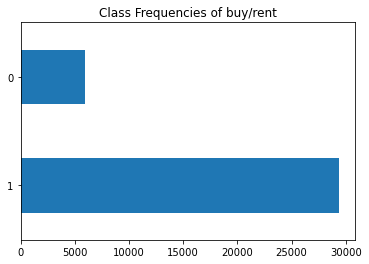

In [67]:
df["buy/rent"].value_counts().plot.barh().set_title("Class Frequencies of buy/rent");

When we visualize the properties for sale and rent by price, it is observed that there is a serious difference in price between them as expected.

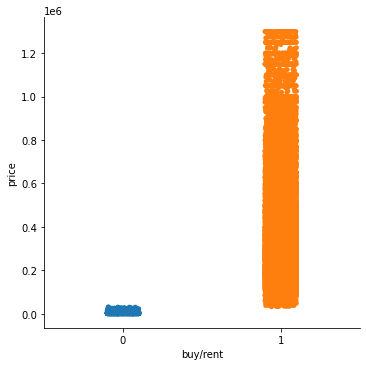

In [199]:
sns.catplot(x = "buy/rent", y = "price", data = df);

Commercial properties for sale seem to be priced higher than those for residential. Similarly, the price of commercial rental properties seems to be higher than those for residential.

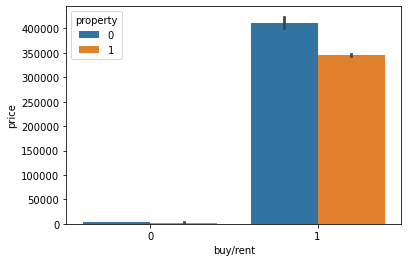

In [201]:
sns.barplot(x = "buy/rent", y = "price", hue = "property", data = df);

In [202]:
#property
df["property"].unique()

array([0, 1])

In [203]:
df["property"].value_counts().count()

2

In [204]:
df["property"].value_counts()

1    30476
0     4852
Name: property, dtype: int64

According to the chart, the number of residential properties is significantly higher than commercial properties. Approximately 85% of all properties are for housing, while 15% are commercial.

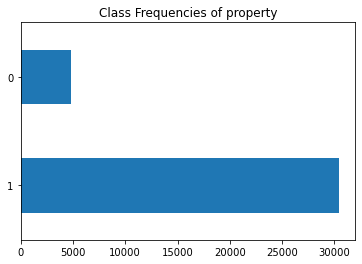

In [205]:
df["property"].value_counts().plot.barh().set_title("Class Frequencies of property");

When we visualize residential and commercial properties according to price, there is no vital difference in price between them.

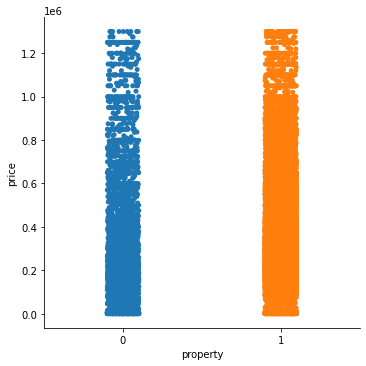

In [206]:
sns.catplot(x = "property", y = "price", data = df);

The price of properties for sale in residential properties is higher than for rental properties, and the price of properties for sale in commercial properties is higher than for rental properties. It is expected that the price of properties for sale will be higher than rental properties.

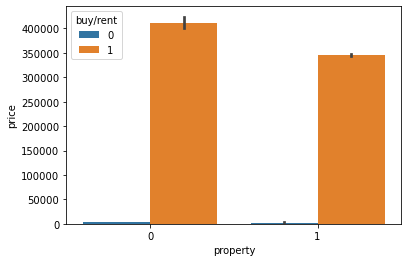

In [207]:
sns.barplot(x = "property", y = "price", hue = "buy/rent", data = df);

### Distributions of Residential and Commercial Properties

**Research Question (Descriptive):**
Is there difference between residential and commercial property regarding price volatility?

In [63]:
residential_price = df["price"].loc[df["property"]==1]
commercial_price = df["price"].loc[df["property"]==0]

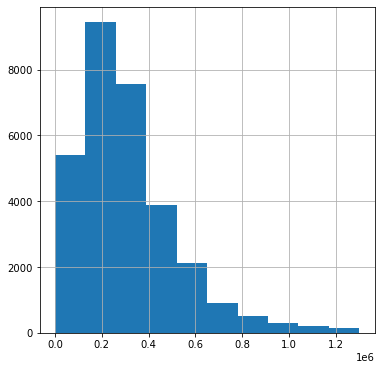

In [209]:
residential_price.hist(figsize = (6,6));

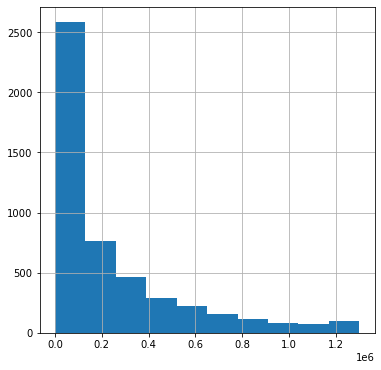

In [210]:
commercial_price.hist(figsize = (6,6));

**Comment:**Price distribution of commercial properties is more volatile than the price distribution of residential properties such that after the first bin, the prices of commercial properties are falling rapidly, while the price decrease in residential properties has a more gradual structure.

## Hypothesis Testing

**6a-Research Question (Hypothesis Testing):**

Statistical comparison of the prices of rental properties and properties for sale. According to the previous visualization techniques and domain knowledge, there is a difference between the prices of rental properties and the prices of properties for sale.

### Assumptions
Observations in each sample are independent and identically distributed (iid).  
Observations in each sample are normally distributed.  
Observations in each sample have the same variance.  


$H_{0}$: The data is normally distributed.  
$H_{1}$: The data is not normally distributed.   
Assume that alpha=0.05 If p-value is >0.05, it can be said that data is normality distributed.

In [211]:
df.head(5)

ad_id                                           ad_title        lat  \
0  33317214       OSTİM BAĞDAT CADDESİNDE SATILIK OFİS/BÜROLAR  39.964565   
1  26440906  ACİLLL,FİYAT DÜŞTÜ İVEDİK OSB,MELİH GÖKÇEK'DE ...  40.000498   
2  33511467          YILDIRIM KULE 19.KATTA 90 M2 SATILIK OFİS  39.884835   
3  27633894          HAZIR MÜŞTERİLİ FULL YAPILI DEVREN İŞYERİ  39.894921   
4  30998944     YAŞAMKENT BESA KARİNA PLAZA'DA SATILIK İŞ YERİ  39.856465   

         lng     price     m2             type     posted  buy/rent  property  
0  32.756947  280000.0   52.0  Dükkan & Mağaza 2019-06-10         1         0  
1  32.764535  725000.0  210.0  Dükkan & Mağaza 2019-06-14         1         0  
2  32.812957  900000.0   90.0             Ofis 2019-06-14         1         0  
3  32.836332   65000.0  120.0  Dükkan & Mağaza 2019-06-13         1         0  
4  32.645285  560000.0   70.0       Plaza Katı 2019-06-14         1         0

In [212]:
buy_price = df["price"].loc[df["buy/rent"]==1]

In [213]:
buy_price.head(5)

0    280000.0
1    725000.0
2    900000.0
3     65000.0
4    560000.0
Name: price, dtype: float64

In [214]:
rent_price = df["price"].loc[df["buy/rent"]==0]

In [215]:
rent_price.head(5)

957     24000.0
1049    20000.0
1481    18000.0
1623    25000.0
1794    27000.0
Name: price, dtype: float64

In [216]:
#If n is greater than 100, Kolmogorov-Smirnov is generally preferred.
test_stat_rent, p_value_rent=stats.kstest(rent_price,"norm")
test_stat_buy, p_value_buy=stats.kstest(buy_price,"norm")

print("For renting p value:%.6f" % p_value_rent)
if p_value_rent <0.05:
    print("Reject null hypothesis >> The data is not normally distributed")
else:
    print("Fail to reject null hypothesis >> The data is normally distributed")
print("-------------------")

print("For buying p value:%.6f" % p_value_buy)
if p_value_buy <0.05:
    print("Reject null hypothesis >> The data is not normally distributed")
else:
    print("Fail to reject null hypothesis >> The data is normally distributed")

For renting p value:0.000000
Reject null hypothesis >> The data is not normally distributed
-------------------
For buying p value:0.000000
Reject null hypothesis >> The data is not normally distributed


Due to large numbers of observations, p value tends to be too low, so significance of statistical test will be low. Therefore, we can think of effect size as well. Effect size measures either measure the sizes of associations or the sizes of differences. Also, Cohen suggested that d=0.2 be considered a 'small' effect size, 0.5 represents a 'medium' effect size and 0.8 a 'large' effect size. This means that if two groups' means don't differ by 0.2 standard deviations or more, the difference is trivial, even if it is statistically significant. In our case, d=2.3 which is very high. Thus, difference is significant according to effect size.

In [217]:
cohens_d = (mean(buy_price) - mean(rent_price)) / (sqrt((stdev(buy_price) ** 2 + stdev(rent_price) ** 2) / 2))
print(cohens_d)

2.2876857520151876


Since the data are not normally distributed, normality assumption is not valid for rent_price and buy_price.

$H_{0}$: The variances of the samples are same.  
$H_{1}$: The variances of the samples are different. 

It tests the null hypothesis that the population variances are equal (called homogeneity of variance or homoscedasticity). If the resulting p-value of Levene's test is less than some significance level (typically 0.05), the obtained differences in sample variances are unlikely to have occurred based on random sampling from a population with equal variances

In [218]:
stat, pvalue_levene= stats.levene(rent_price,buy_price)

print("p value:%.6f" % pvalue_levene)
if pvalue_levene <0.05:
    print("Reject null hypothesis >> The variances of the samples are different.")
else:
    print("Fail to reject null hypothesis >> The variances of the samples are same.")

p value:0.000000
Reject null hypothesis >> The variances of the samples are different.


Since The variances of the samples are different. same variance assumption is not valid for rent_price and buy_price.

Since we have two different groups (two samples-unpaired) with continuous endpoint and we have investigated prices in two categories which are rent and buy.In addition to that, non-parametric statistical test should be used due to normality assumption and same variance assumption.
Therefore, Mann Whitney U Test can be used for Hypothesis testing.Also, We will check whether there is a difference between prices of two.

H0: 𝜇1=𝜇2 (the means of prices are equal regarding rent and buy)

H1: 𝜇1≠𝜇2 (the means of prices are not equal regarding rent and buy)


In [219]:
ttest,pvalue = stats.mannwhitneyu(rent_price,buy_price, alternative="two-sided")
print("p-value",pvalue)
if pvalue <0.05:
    print("Reject null hypothesis")
else:
    print("Fail to recejt null hypothesis")

p-value 0.0
Reject null hypothesis


**p-value:**

Since p-value(0.00) is less than alpha(0.05), we can conclude that H0 rejects and there is significant evidence that rent and buy options have different means of prices.

As we can see from box-plot below, prices are located in higher position in buy option compared to rent.

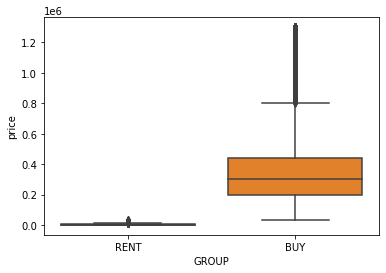

In [220]:
A = pd.DataFrame(rent_price)
B = pd.DataFrame(buy_price)

#Game
GROUP_A = np.arange(len(A))
GROUP_A = pd.DataFrame(GROUP_A)
GROUP_A[:] = "RENT"
A = pd.concat([A, GROUP_A], axis = 1)

#Defense
GROUP_B = np.arange(len(B))
GROUP_B = pd.DataFrame(GROUP_B)
GROUP_B[:] = "BUY"
B = pd.concat([B, GROUP_B], axis = 1)

#All data including Rent and Buy
AB = pd.concat([A,B])
AB.columns = ["price","GROUP"]

sns.boxplot(x = "GROUP", y = "price", data = AB);

**6b-Research Question (Hypothesis Testing):**

Comparison of the prices of residential and commercial properties in statistical terms.According to the previous visualization techniques, there was not much difference between the prices of residential and commercial properties.

### Assumptions
Observations in each sample are independent and identically distributed (iid).  
Observations in each sample are normally distributed.  
Observations in each sample have the same variance.  


$H_{0}$: The data is normally distributed.  
$H_{1}$: The data is not normally distributed.   
Assume that alpha=0.05 If p-value is >0.05, it can be said that data is normality distributed.

In [221]:
residential_price = df["price"].loc[df["property"]==1]

In [222]:
residential_price.head(5)

7     420000.0
16    365000.0
25    175000.0
27    245000.0
37    310000.0
Name: price, dtype: float64

In [223]:
commercial_price = df["price"].loc[df["property"]==0]

In [224]:
commercial_price.head(5)

0    280000.0
1    725000.0
2    900000.0
3     65000.0
4    560000.0
Name: price, dtype: float64

In [225]:
#If n is greater than 100, Kolmogorov-Smirnov is generally preferred.
test_stat_residential, p_value_residential=stats.kstest(residential_price,"norm")
test_stat_commercial, p_value_commercial=stats.kstest(commercial_price,"norm")

print("For residential p value:%.6f" % p_value_residential)
if p_value_residential <0.05:
    print("Reject null hypothesis >> The data is not normally distributed")
else:
    print("Fail to reject null hypothesis >> The data is normally distributed")
print("-------------------")

print("For commercial p value:%.6f" % p_value_commercial)
if p_value_commercial <0.05:
    print("Reject null hypothesis >> The data is not normally distributed")
else:
    print("Fail to reject null hypothesis >> The data is normally distributed")

For residential p value:0.000000
Reject null hypothesis >> The data is not normally distributed
-------------------
For commercial p value:0.000000
Reject null hypothesis >> The data is not normally distributed


Due to large numbers of observations, p value tends to be too low, so significance of statistical test will be low. Therefore, we can think of effect size as well. Effect size measures either measure the sizes of associations or the sizes of differences. Also, Cohen suggested that d=0.2 be considered a 'small' effect size, 0.5 represents a 'medium' effect size and 0.8 a 'large' effect size. This means that if two groups' means don't differ by 0.2 standard deviations or more, the difference is trivial, even if it is statistically significant. In our case, d=0.29 which is a bit higher than 0.2.Therefore, we cannot strictly say that the difference is trivial, but we can say that effect size is small.

Since the data are not normally distributed, normality assumption is not valid for residential_price and commercial_price.

In [226]:
cohens_d = (mean(residential_price) - mean(commercial_price)) / (sqrt((stdev(residential_price) ** 2 + stdev(commercial_price) ** 2) / 2))
print(cohens_d)

0.29397778632735194


$H_{0}$: The variances of the samples are same.  
$H_{1}$: The variances of the samples are different. 

It tests the null hypothesis that the population variances are equal (called homogeneity of variance or homoscedasticity). If the resulting p-value of Levene's test is less than some significance level (typically 0.05), the obtained differences in sample variances are unlikely to have occurred based on random sampling from a population with equal variances

In [227]:
stat, pvalue_levene= stats.levene(residential_price,commercial_price)

print("p value:%.6f" % pvalue_levene)
if pvalue_levene <0.05:
    print("Reject null hypothesis >> The variances of the samples are different.")
else:
    print("Fail to reject null hypothesis >> The variances of the samples are same.")

p value:0.000000
Reject null hypothesis >> The variances of the samples are different.


Since The variances of the samples are different. same variance assumption is not valid for residential_price and commercial_price.

Since we have two different groups (two samples-unpaired) with continuous endpoint and we have investigated prices in two categories which are residential and commercial.In addition to that, non-parametric statistical test should be used due to normality assumption and same variance assumption.
Therefore, Mann Whitney U Test can be used for Hypothesis testing.Also, We will check whether there is a difference between prices of two.

H0: 𝜇1=𝜇2 (the means of prices are equal regarding residential and commercial)

H1: 𝜇1≠𝜇2 (the means of prices are not equal regarding residential and commercial)

In [228]:
ttest,pvalue = stats.mannwhitneyu(residential_price,commercial_price, alternative="two-sided")
print("p-value",pvalue)
if pvalue <0.05:
    print("Reject null hypothesis")
else:
    print("Fail to recejt null hypothesis")

p-value 2.8585254972526387e-251
Reject null hypothesis


**p-value:**

Since p-value(2.85e-251) is less than alpha(0.05), we can conclude that H0 rejects and there is significant evidence that residential and commercial options have different means of prices. However, since effect size is 0.27 and it is low, the difference might be trivial.

As we can see from box-plot below, prices are not located in higher position in commercial option compared to residential and vice versa. Therefore, we cannot easily say that the difference is significant according to p-value. When we examine effect size, we can observe that the difference may be trivial due to low effect size.

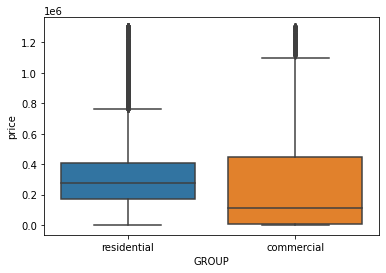

In [229]:
A = pd.DataFrame(residential_price)
B = pd.DataFrame(commercial_price)

#Game
GROUP_A = np.arange(len(A))
GROUP_A = pd.DataFrame(GROUP_A)
GROUP_A[:] = "residential"
A = pd.concat([A, GROUP_A], axis = 1)

#Defense
GROUP_B = np.arange(len(B))
GROUP_B = pd.DataFrame(GROUP_B)
GROUP_B[:] = "commercial"
B = pd.concat([B, GROUP_B], axis = 1)

#All data including residential and commercial
AB = pd.concat([A,B])
AB.columns = ["price","GROUP"]

sns.boxplot(x = "GROUP", y = "price", data = AB);

## Clustering

### One-Hot Transformation

Since "type" attribute have categorical classes, we can transform it from categorical to numerical in order to use clustering.

Daire, Dükkan&Mağaza, Ofis,Apartman Dairesi,Bina,Residence,Villa,Plaza Katı,Müstakil Ev,Genel,Plaza make up 99% of all ads. In the classification model to be created, the categorical variable type will be numeric with one-hot encoding, normalized and the model will be established. Type classes with very few observations will also be included in the dataset as attribute after one-hot encoding, which will negatively affect the classification because they do not have enough number of observations to generate generalizable information and they behave like noisy data.In addition, the type classes that make up 99% of the data set have sufficient data size to make generalizable meaning as the number of observations.The remaining classes take up only 1% of you in the data.Therefore, classes with a small number of observations will be removed from the data set.

In [230]:
df["type"].value_counts()

Daire                 29053
Dükkan & Mağaza        2281
Ofis                   1060
Bina                    907
Residence               683
Villa                   468
Plaza Katı              268
Müstakil Ev             232
Plaza                   109
İş Hanı Katı             66
Depo                     45
Atölye                   30
İş Hanı                  29
Sanal & Hazır Ofis       28
Çiftlik                  20
Kooperatif               20
Villa Katı                8
Dağ Evi                   8
Eczane                    8
Köy Evi                   1
Yalı Dairesi              1
Köşk                      1
Yazlık                    1
Fabrika                   1
Name: type, dtype: int64

In [64]:
df_reduced_cluster = df.copy()
df_reduced_cluster.drop(df.loc[df["type"] == "İş Hanı Katı"].index, inplace=True)
df_reduced_cluster.drop(df.loc[df["type"] == "Depo"].index, inplace=True)
df_reduced_cluster.drop(df.loc[df["type"] == "Atölye"].index, inplace=True)
df_reduced_cluster.drop(df.loc[df["type"] == "İş Hanı"].index, inplace=True)
df_reduced_cluster.drop(df.loc[df["type"] == "Sanal & Hazır Ofis"].index, inplace=True)
df_reduced_cluster.drop(df.loc[df["type"] == "Kooperatif"].index, inplace=True)
df_reduced_cluster.drop(df.loc[df["type"] == "Çiftlik"].index, inplace=True)
df_reduced_cluster.drop(df.loc[df["type"] == "Dağ Evi"].index, inplace=True)
df_reduced_cluster.drop(df.loc[df["type"] == "Villa Katı"].index, inplace=True)
df_reduced_cluster.drop(df.loc[df["type"] == "Eczane"].index, inplace=True)
df_reduced_cluster.drop(df.loc[df["type"] == "Yazlık"].index, inplace=True)
df_reduced_cluster.drop(df.loc[df["type"] == "Fabrika"].index, inplace=True)
df_reduced_cluster.drop(df.loc[df["type"] == "Köy Evi"].index, inplace=True)
df_reduced_cluster.drop(df.loc[df["type"] == "Köşk"].index, inplace=True)
df_reduced_cluster.drop(df.loc[df["type"] == "Yalı Dairesi"].index, inplace=True)

In [65]:
df_clustering = df_reduced_cluster[["lat","lng","price","m2","type"]]
df_one_hot=pd.get_dummies(df_clustering, columns = ["type"], prefix = ["type"])

In [66]:
df_one_hot.head()

lat        lng     price     m2  type_Bina  type_Daire  \
0  39.964565  32.756947  280000.0   52.0          0           0   
1  40.000498  32.764535  725000.0  210.0          0           0   
2  39.884835  32.812957  900000.0   90.0          0           0   
3  39.894921  32.836332   65000.0  120.0          0           0   
4  39.856465  32.645285  560000.0   70.0          0           0   

   type_Dükkan & Mağaza  type_Müstakil Ev  type_Ofis  type_Plaza  \
0                     1                 0          0           0   
1                     1                 0          0           0   
2                     0                 0          1           0   
3                     1                 0          0           0   
4                     0                 0          0           0   

   type_Plaza Katı  type_Residence  type_Villa  
0                0               0           0  
1                0               0           0  
2                0               0           0  
3                0               0           0  
4                1               0           0

Kmeans and DBSCAN use distance-based measurements to determine the similarity between data points. Therefore, it is recommended to standardize the data to have a mean of 0 and a standard deviation of 1. However, due to non-normal distributed attributes like lat,lng,price etc, we should use min-max scaling for normalizing.

In [234]:
df_reduced_cluster["type"].unique()

array(['Dükkan & Mağaza', 'Ofis', 'Plaza Katı', 'Daire', 'Plaza', 'Bina',
       'Villa', 'Müstakil Ev', 'Residence'], dtype=object)

In [67]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled = scaler.fit_transform(df_one_hot)
df_one_hot_scaled = pd.DataFrame(scaled)

In [68]:
df_one_hot_scaled.rename({0:"lat",
                          1:"lng",
                          2:"price",
                          3:"m2",
                          4:"type_Bina",
                          5:"type_Daire",
                          6:"type_Dükkan & Mağaza",
                          7:"type_Müstakil Ev",
                          8:"type_Ofis",
                          9:"type_Plaza",
                          10:"type_Plaza Katı",
                          11:"type_Residence",
                          12:"type_Villa"}, axis=1, inplace = True)

In [69]:
df_one_hot_scaled.head()

lat       lng     price        m2  type_Bina  type_Daire  \
0  0.654398  0.520585  0.215354  0.128866        0.0         0.0   
1  0.677307  0.525197  0.557675  0.536082        0.0         0.0   
2  0.603565  0.554630  0.692296  0.226804        0.0         0.0   
3  0.609995  0.568839  0.049963  0.304124        0.0         0.0   
4  0.585477  0.452710  0.430747  0.175258        0.0         0.0   

   type_Dükkan & Mağaza  type_Müstakil Ev  type_Ofis  type_Plaza  \
0                   1.0               0.0        0.0         0.0   
1                   1.0               0.0        0.0         0.0   
2                   0.0               0.0        1.0         0.0   
3                   1.0               0.0        0.0         0.0   
4                   0.0               0.0        0.0         0.0   

   type_Plaza Katı  type_Residence  type_Villa  
0              0.0             0.0         0.0  
1              0.0             0.0         0.0  
2              0.0             0.0         0.0  
3              0.0             0.0         0.0  
4              1.0             0.0         0.0

## The simple visualization of the clustered data (K-means)

Since outlier and noisy data analysis is performed in the data preprocessing step, the data set is not considered sensitive to outlier and noisy data. Therefore, k-means was used instead of k-median or k-medoid.

After determination of optimum number of clusters, which observations belong to which cluster were determined and added to the data set namely "df_segmentation". Thus, segmentation as used in the business world was realized. The newly segmentation information can help real estate agents to identify more specific target groups and develop strategies for them and real estate agents can improve their performance.

In [73]:
pca = PCA()
pca_data = pca.fit_transform(df_one_hot_scaled)
pca_data = pd.DataFrame(pca_data, columns=["pc1","pc2","pc3","pc4","pc5","pc6","pc7","pc8","pc9","pc10","pc11","pc12","pc13"])
print("pca.explained variance ratio:\n", pca.explained_variance_ratio_)

pca.explained variance ratio:
 [4.77467850e-01 1.26612583e-01 1.15339375e-01 7.49917147e-02
 5.82052760e-02 4.59679011e-02 3.28963253e-02 2.38306370e-02
 1.88594146e-02 1.26568849e-02 9.18126085e-03 3.99077837e-03
 3.48821392e-32]


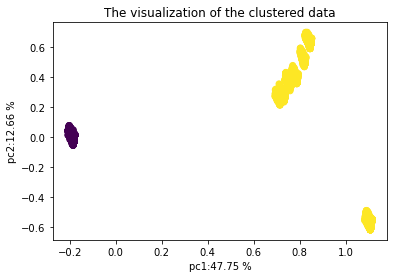

In [74]:
kmeans = KMeans(n_clusters=2, random_state=23)
df_cluster=pca_data[["pc1","pc2"]].copy()
df_cluster["clusters"]=kmeans.fit_predict(df_one_hot_scaled)
plt.scatter(df_cluster["pc1"], df_cluster["pc2"],c=df_cluster.clusters)
plt.title("The visualization of the clustered data")
plt.xlabel("pc1:"+"{:.2f}".format(pca.explained_variance_ratio_[0]*100)+" %")
plt.ylabel("pc2:"+"{:.2f}".format(pca.explained_variance_ratio_[1]*100)+" %")
plt.show()

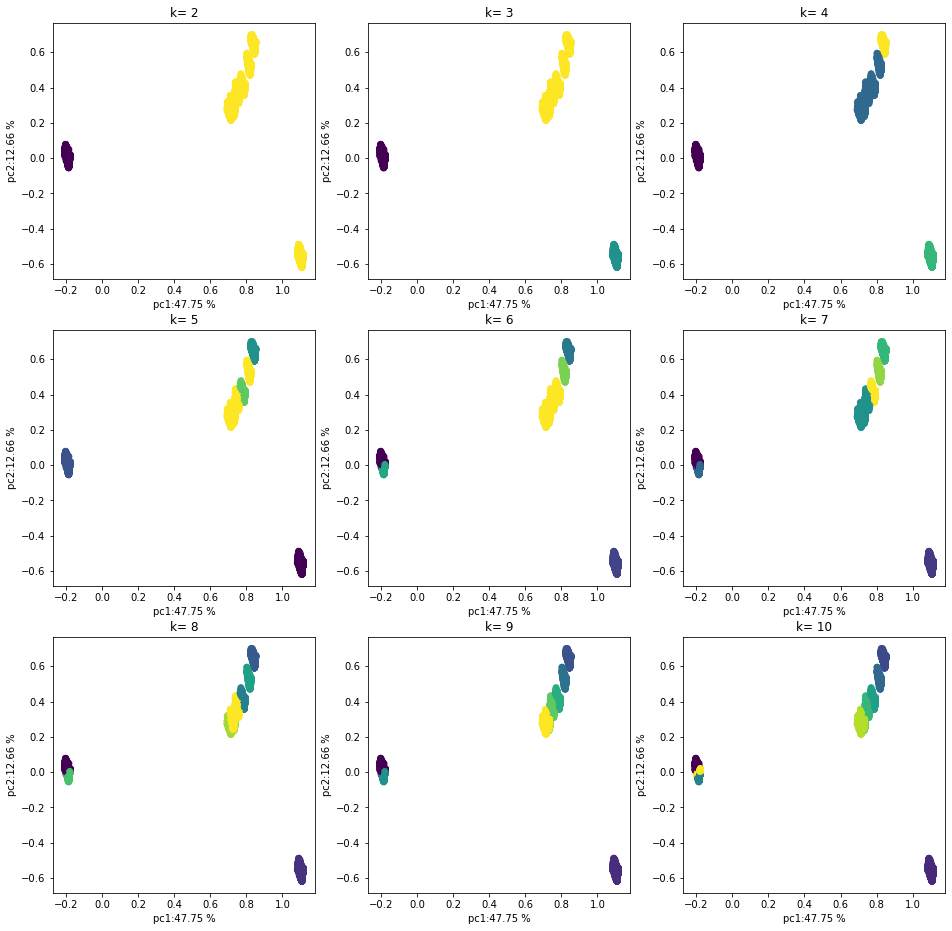

In [240]:
rows=3
columns=3
f, axes = plt.subplots(rows,columns, figsize=(16, 16))
count=2
for i in range(rows):
    for j in range(columns):
        kmeans = KMeans(n_clusters=count, random_state=23)
        df_cluster=pca_data[["pc1","pc2"]].copy()
        df_cluster["clusters"]=kmeans.fit_predict(df_one_hot_scaled)
        axes[i,j].scatter(df_cluster["pc1"], df_cluster["pc2"],c=df_cluster.clusters)      
        axes[i,j].set_title( "k= " +str(count) )
        axes[i,j].set_xlabel("pc1:"+"{:.2f}".format(pca.explained_variance_ratio_[0]*100)+" %")
        axes[i,j].set_ylabel("pc2:"+"{:.2f}".format(pca.explained_variance_ratio_[1]*100)+" %")
        count=count+1

**Comment:**
When k = 4, it is understood from the graph that the optimum k value is 4, since the clusters are best separated from each other. When k<4, clusters that should be separate appear together. When k>4, clusters that should be together  are displayed separately.Separation and grouping look reasonable since k-means produce more or less round shaped and our data is suitable for that.

## <span style="background-color:#A2CBE4">Within Sum of Squares(WSS) - Elbow Method For Optimal k </span>
The total within-cluster sum of squares (WSS) measures the compactness of the clustering and we want it to be as small as possible. The optimal number of clusters can be determined by looking at where the elbow/bend in the knee occurs. According to this, by looking at the within-cluster sum of square (WSS), it can be said that the optimal number of clusters is 4 because the bend in the knee occurs there.

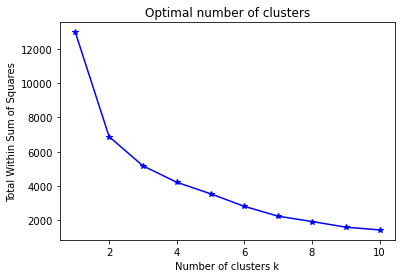

In [241]:
wss = []
K = range(1,11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=23)
    kmeans = kmeans.fit(df_one_hot_scaled)
    wss.append(kmeans.inertia_)
plt.plot(K, wss, "b*-")
plt.xlabel("Number of clusters k")
plt.ylabel("Total Within Sum of Squares")
plt.title("Optimal number of clusters")
plt.show()

**Comment:** While total wss decreases significantly until k = 4, the rate of reduction of total wss decreases significantly after k = 4. Therefore, optimum k value is 4 regarding Elbow method.

## <span style="background-color:#A2CBE4"> Average Silhouette Approach </span>      
The average silhouette approach measures the quality of a clustering. It determines how well each object lies within its cluster. A high average silhouette width indicates a good clustering. The average silhouette method computes the average silhouette of observations for different values of k. The optimal number of clusters k is the one that maximizes the average silhouette over a range of possible values for k. According to this, by looking at the silhouette graph, it can be said that the optimal number of k is 5 and its core(0.7705) is higher than 0.5 threshold value.

n_clusters = 2 The average silhouette_score is : 0.7017
n_clusters = 3 The average silhouette_score is : 0.7364
n_clusters = 4 The average silhouette_score is : 0.7562
n_clusters = 5 The average silhouette_score is : 0.7705
n_clusters = 6 The average silhouette_score is : 0.4640
n_clusters = 7 The average silhouette_score is : 0.4761
n_clusters = 8 The average silhouette_score is : 0.4824
n_clusters = 9 The average silhouette_score is : 0.4890
n_clusters = 10 The average silhouette_score is : 0.3622


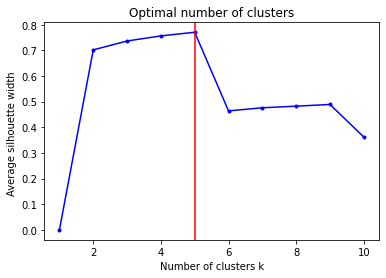

In [242]:
sil_avg = [0]
K = range(2,11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=23)
    cluster_labels=kmeans.fit_predict(df_one_hot_scaled)
    silhouette_avg = silhouette_score(df_one_hot_scaled, cluster_labels)
    sil_avg.append(silhouette_avg)
    print("n_clusters =", k, "The average silhouette_score is : %.4f" % silhouette_avg)


plt.plot(range(1,len(sil_avg)+1), sil_avg, "b.-")
plt.xlabel("Number of clusters k")
plt.ylabel("Average silhouette width ")
plt.title("Optimal number of clusters")
plt.axvline( color='r', x=sil_avg.index(max(sil_avg))+1 )
plt.show()

**Comment:** Since k=5 has the largest average silhouette score, the optimal k value is 5.

Thus, optimal value of k is 4 according to **wss graph** and optimal value of k is 5 according to **silhouette scores**.

## The visualization of the clustered data with optimum number of clusters

Since the silhouette graph can show numeric score related to clustering, we prefer silhouette graph to wss graph since we can interpret optimum value by just looking at wss graph visually. On the other hand, their silhouette scores is quite close to each other(0.7562 and 0.7705).Moreover, When we look at the graph for k=5, we see that there is a green cluster among the yellow clusters. Under normal circumstances, we should not see clusters close to the other cluster between two same clusters. Therefore, this anomaly observed when k = 5 causes us to continue with k = 4 because we did not find an abnormal situation at k =4 and the average silhoueete score of k=4 is very high(0.7562) and very close to k=5(0.7705). Thus, k=4 determined as the optimum number of clusters.

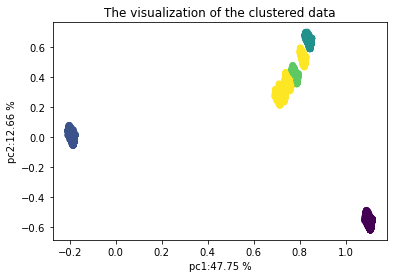

In [75]:
#Plot the clusters for the value of k=5
kmeans = KMeans(n_clusters=5, random_state=23)
df_cluster=pca_data[["pc1","pc2"]].copy()
df_cluster["clusters"]=kmeans.fit_predict(df_one_hot_scaled)
plt.scatter(df_cluster["pc1"], df_cluster["pc2"],c=df_cluster.clusters)
plt.title("The visualization of the clustered data")
plt.xlabel("pc1:"+"{:.2f}".format(pca.explained_variance_ratio_[0]*100)+" %")
plt.ylabel("pc2:"+"{:.2f}".format(pca.explained_variance_ratio_[1]*100)+" %")
plt.show()

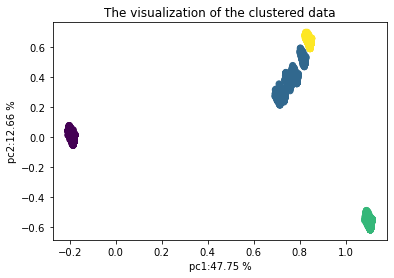

In [76]:
#Plot the clusters for the value of k=4
kmeans = KMeans(n_clusters=4, random_state=23)
df_cluster=pca_data[["pc1","pc2"]].copy()
df_cluster["clusters"]=kmeans.fit_predict(df_one_hot_scaled)
plt.scatter(df_cluster["pc1"], df_cluster["pc2"],c=df_cluster.clusters)
plt.title("The visualization of the clustered data")
plt.xlabel("pc1:"+"{:.2f}".format(pca.explained_variance_ratio_[0]*100)+" %")
plt.ylabel("pc2:"+"{:.2f}".format(pca.explained_variance_ratio_[1]*100)+" %")
plt.show()

In [81]:
kmeans = KMeans(n_clusters = 4)
k_fit = kmeans.fit(df_one_hot_scaled)
clusters = k_fit.labels_

In [82]:
df_segmentation = df_one_hot_scaled.copy()
df_segmentation["cluster_no"] = clusters
df_segmentation.head()

lat       lng     price        m2  type_Bina  type_Daire  \
0  0.654398  0.520585  0.215354  0.128866        0.0         0.0   
1  0.677307  0.525197  0.557675  0.536082        0.0         0.0   
2  0.603565  0.554630  0.692296  0.226804        0.0         0.0   
3  0.609995  0.568839  0.049963  0.304124        0.0         0.0   
4  0.585477  0.452710  0.430747  0.175258        0.0         0.0   

   type_Dükkan & Mağaza  type_Müstakil Ev  type_Ofis  type_Plaza  \
0                   1.0               0.0        0.0         0.0   
1                   1.0               0.0        0.0         0.0   
2                   0.0               0.0        1.0         0.0   
3                   1.0               0.0        0.0         0.0   
4                   0.0               0.0        0.0         0.0   

   type_Plaza Katı  type_Residence  type_Villa  cluster_no  
0              0.0             0.0         0.0           2  
1              0.0             0.0         0.0           2  
2              0.0             0.0         0.0           3  
3              0.0             0.0         0.0           2  
4              1.0             0.0         0.0           1

### Hierarchical Clustering

Hierarchical clustering gives access to deeper analysis in this sense. Moreover, it does not require to specify K, the number of clusters and Hierarchical clustering allows the analyst to see the groupings before deciding on the number of clusters. Complete link can be selected as method of distance between clusters since nonlocal in behavior, obtaining compact shaped clusters compared to single link. We can select average link, but size of dataset is huge and average link is expensive to compute. 

On the other hand,complete link could not produce a solution due to the maximum recursion limit problem and memory constraint. To overcome this issue, recursion limit increased to 1000000. By increase in recursion limit with complete link,the visualization could performed and dendrogram was constructed. When we determine number of clusters according to dendrogram, considering the distances of previous clusters to the new cluster, it was determined that the optimum number of clusters could be 9.Then, which observations belong to which cluster were determined and added to the data set. Cluster 1 has most of the observations.Since the large number of clusters indicates the existence of observations with different characteristics, it is valuable in understanding the data. Thus, segmentation as used in the business world was realized. The newly segmentation information can help real estate agents to identify more specific target groups and develop strategies for them and real estate agents can improve their performance.

In [246]:
df_one_hot_scaled

lat       lng     price        m2  type_Bina  type_Daire  \
0      0.654398  0.520585  0.215354  0.128866        0.0         0.0   
1      0.677307  0.525197  0.557675  0.536082        0.0         0.0   
2      0.603565  0.554630  0.692296  0.226804        0.0         0.0   
3      0.609995  0.568839  0.049963  0.304124        0.0         0.0   
4      0.585477  0.452710  0.430747  0.175258        0.0         0.0   
...         ...       ...       ...       ...        ...         ...   
35056  0.603028  0.501887  0.001923  0.445876        0.0         1.0   
35057  0.579151  0.567755  0.002269  0.206186        0.0         1.0   
35058  0.605362  0.493435  0.006308  0.768041        0.0         1.0   
35059  0.623019  0.528054  0.001885  0.239691        0.0         1.0   
35060  0.580886  0.567976  0.011500  0.561856        0.0         0.0   

       type_Dükkan & Mağaza  type_Müstakil Ev  type_Ofis  type_Plaza  \
0                       1.0               0.0        0.0         0.0   
1                       1.0               0.0        0.0         0.0   
2                       0.0               0.0        1.0         0.0   
3                       1.0               0.0        0.0         0.0   
4                       0.0               0.0        0.0         0.0   
...                     ...               ...        ...         ...   
35056                   0.0               0.0        0.0         0.0   
35057                   0.0               0.0        0.0         0.0   
35058                   0.0               0.0        0.0         0.0   
35059                   0.0               0.0        0.0         0.0   
35060                   0.0               0.0        0.0         0.0   

       type_Plaza Katı  type_Residence  type_Villa  
0                  0.0             0.0         0.0  
1                  0.0             0.0         0.0  
2                  0.0             0.0         0.0  
3                  0.0             0.0         0.0  
4                  1.0             0.0         0.0  
...                ...             ...         ...  
35056              0.0             0.0         0.0  
35057              0.0             0.0         0.0  
35058              0.0             0.0         0.0  
35059              0.0             0.0         0.0  
35060              0.0             1.0         0.0  

[35061 rows x 13 columns]

In [73]:
import sys
sys.setrecursionlimit(1000000)

**IMPORTANT NOTE**

Since dataset's size is huge and we have used complete as distance method between clusters to be able to get more accurate result, computation time of the following code is about **5 hours**. This situation should be considered while running the code.

In [81]:
hc_complete = linkage(df_one_hot_scaled, "complete")

**IMPORTANT NOTE**

Since dataset's size is huge and we have used complete as distance method between clusters to be able to get more accurate result, computation time of the following code is about **10 hours**. This situation should be considered while running the code.

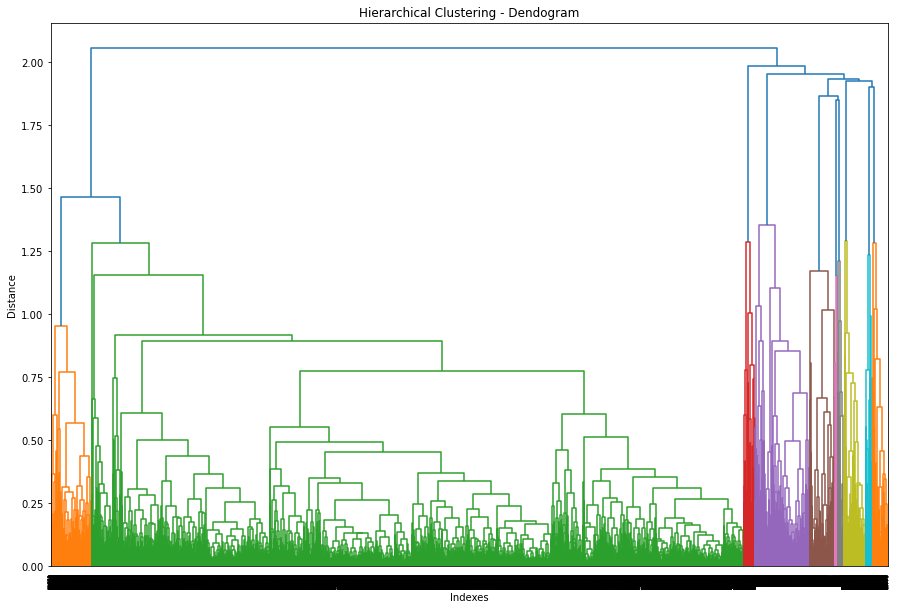

In [82]:
plt.figure(figsize=(15, 10))
plt.title('Hierarchical Clustering - Dendogram')
plt.xlabel('Indexes')
plt.ylabel('Distance')
dendrogram(
    hc_complete,
);

According to the desired number of clusters, the number of observations in the relevant clusters can be observed.

**IMPORTANT NOTE**

Since dataset's size is huge and we have used complete as distance method between clusters to be able to get more accurate result, computation time of the following code is about **6 hours**. This situation should be considered while running the code.

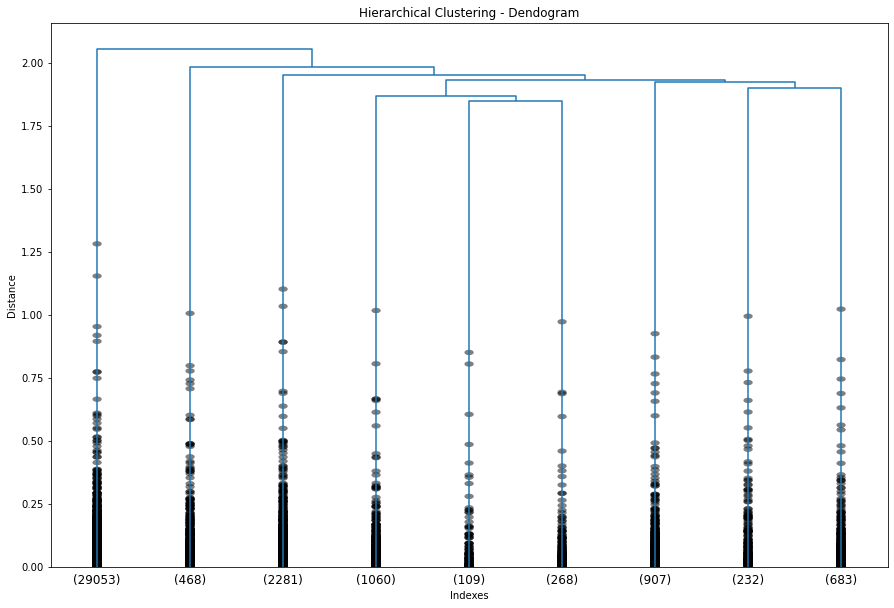

In [83]:
plt.figure(figsize=(15, 10))
plt.title('Hierarchical Clustering - Dendogram')
plt.xlabel('Indexes')
plt.ylabel('Distance')
dendrogram(
    hc_complete,
    truncate_mode = "lastp",
    p = 9,
    show_contracted = True
);

### Number of Optimum Cluster

To choose optimum number of clusters, AGNES method will be used.

**IMPORTANT NOTE**

Since dataset's size is huge and we have used complete as distance method between clusters to be able to get more accurate result, computation time of the following two codes pieces is about **12 hours**. This situation should be considered while running the code.

In [84]:
cluster = AgglomerativeClustering(n_clusters = 9, 
                                  affinity = "euclidean", 
                                  linkage = "complete")

cluster.fit_predict(df_one_hot_scaled)

array([1, 1, 7, ..., 0, 0, 4], dtype=int64)

In [85]:
df_hy_cluster = df_clustering.copy()
df_hy_cluster["cluster_no"] = cluster.fit_predict(df_one_hot_scaled)
df_hy_cluster.head()

lat        lng     price     m2             type  cluster_no
0  39.964565  32.756947  280000.0   52.0  Dükkan & Mağaza           1
1  40.000498  32.764535  725000.0  210.0  Dükkan & Mağaza           1
2  39.884835  32.812957  900000.0   90.0             Ofis           7
3  39.894921  32.836332   65000.0  120.0  Dükkan & Mağaza           1
4  39.856465  32.645285  560000.0   70.0       Plaza Katı           3

## Classification

The classification problem will be used to classify commercial and residential properties.There may be no property distinction in the real estate site. For example, there was no property variable in the Hürriyet emlak data set.We created property variable as true label to be able to use in the classification problem.property can enable the customer to more specifically filter the ad of interest.In addition to that, although the advertiser does not specify the property, the real estate site will run this classification model and produce the information that the customer may need.In addition, the classification model plays an important role for project as it will be established using all the observations in the data set.

Daire, Dükkan&Mağaza, Ofis,Apartman Dairesi,Bina,Residence,Villa,Plaza Katı,Müstakil Ev,Genel,Plaza make up 99% of all ads. In the classification model to be created, the categorical variable type will be numeric with one-hot encoding, normalized and the model will be established. Type classes with very few observations will also be included in the dataset as attribute after one-hot encoding, which will negatively affect the classification because they do not have enough number of observations to generate generalizable information and they behave like noisy data.In addition, the type classes that make up 99% of the data set have sufficient data size to make generalizable meaning as the number of observations.The remaining classes take up only 1% of you in the data.Therefore, classes with a small number of observations will be removed from the data set.

However, extracting observations from the data set may reduce the explainability of the data set.Comparison will be made between the two situations based on the accuracy of the model and it will be decided which one to go on.

In [247]:
df["type"].value_counts()

Daire                 29053
Dükkan & Mağaza        2281
Ofis                   1060
Bina                    907
Residence               683
Villa                   468
Plaza Katı              268
Müstakil Ev             232
Plaza                   109
İş Hanı Katı             66
Depo                     45
Atölye                   30
İş Hanı                  29
Sanal & Hazır Ofis       28
Çiftlik                  20
Kooperatif               20
Villa Katı                8
Dağ Evi                   8
Eczane                    8
Köy Evi                   1
Yalı Dairesi              1
Köşk                      1
Yazlık                    1
Fabrika                   1
Name: type, dtype: int64

In [70]:
df_reduced_class = df.copy()
df_reduced_class.drop(df.loc[df["type"] == "İş Hanı Katı"].index, inplace=True)
df_reduced_class.drop(df.loc[df["type"] == "Depo"].index, inplace=True)
df_reduced_class.drop(df.loc[df["type"] == "Atölye"].index, inplace=True)
df_reduced_class.drop(df.loc[df["type"] == "İş Hanı"].index, inplace=True)
df_reduced_class.drop(df.loc[df["type"] == "Sanal & Hazır Ofis"].index, inplace=True)
df_reduced_class.drop(df.loc[df["type"] == "Kooperatif"].index, inplace=True)
df_reduced_class.drop(df.loc[df["type"] == "Çiftlik"].index, inplace=True)
df_reduced_class.drop(df.loc[df["type"] == "Dağ Evi"].index, inplace=True)
df_reduced_class.drop(df.loc[df["type"] == "Villa Katı"].index, inplace=True)
df_reduced_class.drop(df.loc[df["type"] == "Eczane"].index, inplace=True)
df_reduced_class.drop(df.loc[df["type"] == "Yazlık"].index, inplace=True)
df_reduced_class.drop(df.loc[df["type"] == "Fabrika"].index, inplace=True)
df_reduced_class.drop(df.loc[df["type"] == "Köy Evi"].index, inplace=True)
df_reduced_class.drop(df.loc[df["type"] == "Köşk"].index, inplace=True)
df_reduced_class.drop(df.loc[df["type"] == "Yalı Dairesi"].index, inplace=True)

In [71]:
len(df)

35328

In [72]:
len(df_reduced_class)

35061

As we explained earlier, the variables ad_id, ad_title, posted will be removed from the data set that we will use while setting up the model.Also, the buy / rent variable that we created will not be included in the classification model because the related variable is closely related to the price variable.This relationship will not be included in the established model since it is thought that it will cause performance decrease in the classification.

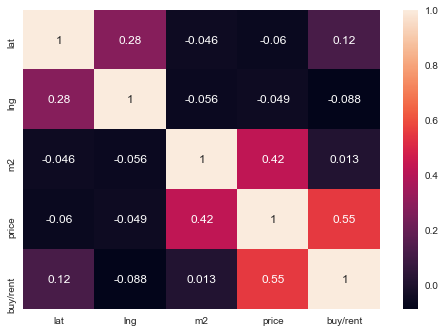

In [83]:
sns.heatmap(df[["lat","lng","m2","price","buy/rent"]].corr("pearson"), annot=True);

In [73]:
df_reduced_model = df_reduced_class[["lat","lng","price","m2","type","property"]]
df_reduced_model

lat        lng     price     m2             type  property
0      39.964565  32.756947  280000.0   52.0  Dükkan & Mağaza         0
1      40.000498  32.764535  725000.0  210.0  Dükkan & Mağaza         0
2      39.884835  32.812957  900000.0   90.0             Ofis         0
3      39.894921  32.836332   65000.0  120.0  Dükkan & Mağaza         0
4      39.856465  32.645285  560000.0   70.0       Plaza Katı         0
...          ...        ...       ...    ...              ...       ...
36970  39.883993  32.726188    2550.0  175.0            Daire         1
36971  39.846542  32.834549    3000.0   82.0            Daire         1
36972  39.887654  32.712282    8250.0  300.0            Daire         1
36973  39.915348  32.769235    2500.0   95.0            Daire         1
36974  39.849264  32.834913   15000.0  220.0        Residence         1

[35061 rows x 6 columns]

In [74]:
df_model = df[["lat","lng","price","m2","type","property"]]
df_model

lat        lng     price     m2             type  property
0      39.964565  32.756947  280000.0   52.0  Dükkan & Mağaza         0
1      40.000498  32.764535  725000.0  210.0  Dükkan & Mağaza         0
2      39.884835  32.812957  900000.0   90.0             Ofis         0
3      39.894921  32.836332   65000.0  120.0  Dükkan & Mağaza         0
4      39.856465  32.645285  560000.0   70.0       Plaza Katı         0
...          ...        ...       ...    ...              ...       ...
36970  39.883993  32.726188    2550.0  175.0            Daire         1
36971  39.846542  32.834549    3000.0   82.0            Daire         1
36972  39.887654  32.712282    8250.0  300.0            Daire         1
36973  39.915348  32.769235    2500.0   95.0            Daire         1
36974  39.849264  32.834913   15000.0  220.0        Residence         1

[35328 rows x 6 columns]

In [254]:
df_reduced_model["type"].value_counts()

Daire              29053
Dükkan & Mağaza     2281
Ofis                1060
Bina                 907
Residence            683
Villa                468
Plaza Katı           268
Müstakil Ev          232
Plaza                109
Name: type, dtype: int64

According to the chart, the number of residential properties is significantly higher than commercial properties.Approximately 85% of all properties are for housing, while 15% are commercial,so considering the class levels of the property variable, it is unbalanced.When setting up the model, cross validation should be used in order not to ignore the small number of class levels.

In [86]:
df_reduced_model["property"].value_counts()

1    30436
0     4625
Name: property, dtype: int64

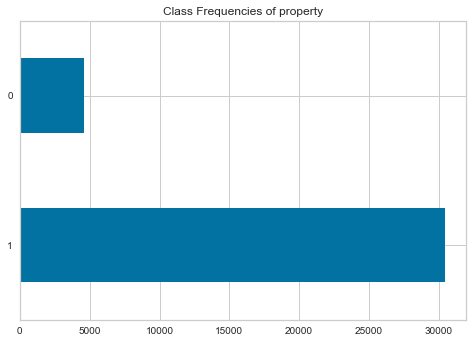

In [87]:
df_reduced_model["property"].value_counts().plot.barh().set_title("Class Frequencies of property");

In [257]:
df_model["type"].value_counts()

Daire                 29053
Dükkan & Mağaza        2281
Ofis                   1060
Bina                    907
Residence               683
Villa                   468
Plaza Katı              268
Müstakil Ev             232
Plaza                   109
İş Hanı Katı             66
Depo                     45
Atölye                   30
İş Hanı                  29
Sanal & Hazır Ofis       28
Çiftlik                  20
Kooperatif               20
Villa Katı                8
Dağ Evi                   8
Eczane                    8
Köy Evi                   1
Yalı Dairesi              1
Köşk                      1
Yazlık                    1
Fabrika                   1
Name: type, dtype: int64

According to the chart, the number of residential properties is significantly higher than commercial properties.Approximately 85% of all properties are for housing, while 15% are commercial.So, considering the class levels of the property variable, it is unbalanced.When setting up the model, cross validation should be used in order not to ignore the small number of class levels.

In [258]:
df["property"].value_counts()

1    30476
0     4852
Name: property, dtype: int64

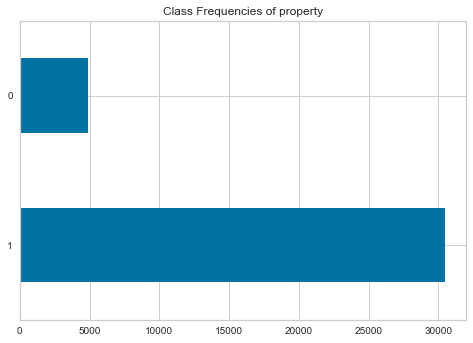

In [88]:
df["property"].value_counts().plot.barh().set_title("Class Frequencies of property");

<font color=#C91414>***LabelEncoder***</font> encodes labels with values between 0 and n_classes-1.

fit_transform() method fits label encoder and return encoded labels.

For example, there are nine categories of "type" attribute and they are encoded as 0,1,2,3,4,5,6,7 and 8.

In [75]:
label_encoder = LabelEncoder() 
df_reduced_model_le = df_reduced_model.copy()
df_reduced_model_le['type_l'] = label_encoder.fit_transform(df_reduced_model['type']) 
display(df_reduced_model_le.head())

lat        lng     price     m2             type  property  type_l
0  39.964565  32.756947  280000.0   52.0  Dükkan & Mağaza         0       2
1  40.000498  32.764535  725000.0  210.0  Dükkan & Mağaza         0       2
2  39.884835  32.812957  900000.0   90.0             Ofis         0       4
3  39.894921  32.836332   65000.0  120.0  Dükkan & Mağaza         0       2
4  39.856465  32.645285  560000.0   70.0       Plaza Katı         0       6

In [76]:
label_encoder = LabelEncoder() 
df_model_le = df_model.copy()
df_model_le['type_l'] = label_encoder.fit_transform(df_model['type']) 
display(df_model_le.head())

lat        lng     price     m2             type  property  type_l
0  39.964565  32.756947  280000.0   52.0  Dükkan & Mağaza         0       5
1  40.000498  32.764535  725000.0  210.0  Dükkan & Mağaza         0       5
2  39.884835  32.812957  900000.0   90.0             Ofis         0      12
3  39.894921  32.836332   65000.0  120.0  Dükkan & Mağaza         0       5
4  39.856465  32.645285  560000.0   70.0       Plaza Katı         0      14

LabelEncoder transfers data from text to integer and it gives an arbitrary ordering, but maybe there is no ordering relationship with the data categories. However, the model can misunderstand the relationship with categories and think data is in order i.e., 0<1<2. At this point, one hot encoding comes to play.  


<font color=#C91414>***OneHotEncoder***</font> encodes categorical features as a one-hot numeric array.
The features are encoded using a one-hot encoding scheme. This creates a binary column for each category and returns a sparse matrix or dense array. By default, the encoder derives the categories based on the unique values in each feature.     

In [77]:
onehot_encoder_reduced = OneHotEncoder(drop=["Plaza"]) # will not create ind. variables for "Plaza"
encoded_reduced = onehot_encoder_reduced.fit_transform(df_reduced_model[["type"]])
df_reduced_model_newpredictors = onehot_encoder_reduced.get_feature_names(["type"])
df_reduced_model_add = pd.DataFrame(encoded_reduced.toarray(), columns=df_reduced_model_newpredictors)
df_reduced_model_ohe = df_reduced_model.merge(df_reduced_model_add, left_index=True, right_index=True)
df_reduced_model_predictors = ["lat"] + ["lng"] + ["price"] + ["m2"] + list(df_reduced_model_newpredictors)
print('predictors:', df_reduced_model_predictors)
display(df_reduced_model_ohe.head())

predictors: ['lat', 'lng', 'price', 'm2', 'type_Bina', 'type_Daire', 'type_Dükkan & Mağaza', 'type_Müstakil Ev', 'type_Ofis', 'type_Plaza Katı', 'type_Residence', 'type_Villa']


lat        lng     price     m2             type  property  \
0  39.964565  32.756947  280000.0   52.0  Dükkan & Mağaza         0   
1  40.000498  32.764535  725000.0  210.0  Dükkan & Mağaza         0   
2  39.884835  32.812957  900000.0   90.0             Ofis         0   
3  39.894921  32.836332   65000.0  120.0  Dükkan & Mağaza         0   
4  39.856465  32.645285  560000.0   70.0       Plaza Katı         0   

   type_Bina  type_Daire  type_Dükkan & Mağaza  type_Müstakil Ev  type_Ofis  \
0        0.0         0.0                   1.0               0.0        0.0   
1        0.0         0.0                   1.0               0.0        0.0   
2        0.0         0.0                   0.0               0.0        1.0   
3        0.0         0.0                   1.0               0.0        0.0   
4        0.0         0.0                   0.0               0.0        0.0   

   type_Plaza Katı  type_Residence  type_Villa  
0              0.0             0.0         0.0  
1              0.0             0.0         0.0  
2              0.0             0.0         0.0  
3              0.0             0.0         0.0  
4              1.0             0.0         0.0

In [80]:
onehot_encoder = OneHotEncoder(drop=["Köşk"]) # will not create ind. variables for "Köşk"
encoded = onehot_encoder.fit_transform(df_model[["type"]])
df_model_newpredictors = onehot_encoder.get_feature_names(["type"])
df_model_add = pd.DataFrame(encoded.toarray(), columns=df_model_newpredictors)
df_model_ohe = df_model.merge(df_model_add, left_index=True, right_index=True)
df_model_predictors = ["lat"] + ["lng"] + ["price"] + ["m2"] + list(df_model_newpredictors)
print('predictors:', df_model_predictors)
display(df_model_ohe.head())

predictors: ['lat', 'lng', 'price', 'm2', 'type_Atölye', 'type_Bina', 'type_Daire', 'type_Dağ Evi', 'type_Depo', 'type_Dükkan & Mağaza', 'type_Eczane', 'type_Fabrika', 'type_Kooperatif', 'type_Köy Evi', 'type_Müstakil Ev', 'type_Ofis', 'type_Plaza', 'type_Plaza Katı', 'type_Residence', 'type_Sanal & Hazır Ofis', 'type_Villa', 'type_Villa Katı', 'type_Yalı Dairesi', 'type_Yazlık', 'type_Çiftlik', 'type_İş Hanı', 'type_İş Hanı Katı']


lat        lng     price     m2             type  property  \
0  39.964565  32.756947  280000.0   52.0  Dükkan & Mağaza         0   
1  40.000498  32.764535  725000.0  210.0  Dükkan & Mağaza         0   
2  39.884835  32.812957  900000.0   90.0             Ofis         0   
3  39.894921  32.836332   65000.0  120.0  Dükkan & Mağaza         0   
4  39.856465  32.645285  560000.0   70.0       Plaza Katı         0   

   type_Atölye  type_Bina  type_Daire  type_Dağ Evi  ...  type_Plaza Katı  \
0          0.0        0.0         0.0           0.0  ...              0.0   
1          0.0        0.0         0.0           0.0  ...              0.0   
2          0.0        0.0         0.0           0.0  ...              0.0   
3          0.0        0.0         0.0           0.0  ...              0.0   
4          0.0        0.0         0.0           0.0  ...              1.0   

   type_Residence  type_Sanal & Hazır Ofis  type_Villa  type_Villa Katı  \
0             0.0                      0.0         0.0              0.0   
1             0.0                      0.0         0.0              0.0   
2             0.0                      0.0         0.0              0.0   
3             0.0                      0.0         0.0              0.0   
4             0.0                      0.0         0.0              0.0   

   type_Yalı Dairesi  type_Yazlık  type_Çiftlik  type_İş Hanı  \
0                0.0          0.0           0.0           0.0   
1                0.0          0.0           0.0           0.0   
2                0.0          0.0           0.0           0.0   
3                0.0          0.0           0.0           0.0   
4                0.0          0.0           0.0           0.0   

   type_İş Hanı Katı  
0                0.0  
1                0.0  
2                0.0  
3                0.0  
4                0.0  

[5 rows x 29 columns]

In [81]:
df_reduced_model_ohe.head()

lat        lng     price     m2             type  property  \
0  39.964565  32.756947  280000.0   52.0  Dükkan & Mağaza         0   
1  40.000498  32.764535  725000.0  210.0  Dükkan & Mağaza         0   
2  39.884835  32.812957  900000.0   90.0             Ofis         0   
3  39.894921  32.836332   65000.0  120.0  Dükkan & Mağaza         0   
4  39.856465  32.645285  560000.0   70.0       Plaza Katı         0   

   type_Bina  type_Daire  type_Dükkan & Mağaza  type_Müstakil Ev  type_Ofis  \
0        0.0         0.0                   1.0               0.0        0.0   
1        0.0         0.0                   1.0               0.0        0.0   
2        0.0         0.0                   0.0               0.0        1.0   
3        0.0         0.0                   1.0               0.0        0.0   
4        0.0         0.0                   0.0               0.0        0.0   

   type_Plaza Katı  type_Residence  type_Villa  
0              0.0             0.0         0.0  
1              0.0             0.0         0.0  
2              0.0             0.0         0.0  
3              0.0             0.0         0.0  
4              1.0             0.0         0.0

In [82]:
df_model_ohe.head()

lat        lng     price     m2             type  property  \
0  39.964565  32.756947  280000.0   52.0  Dükkan & Mağaza         0   
1  40.000498  32.764535  725000.0  210.0  Dükkan & Mağaza         0   
2  39.884835  32.812957  900000.0   90.0             Ofis         0   
3  39.894921  32.836332   65000.0  120.0  Dükkan & Mağaza         0   
4  39.856465  32.645285  560000.0   70.0       Plaza Katı         0   

   type_Atölye  type_Bina  type_Daire  type_Dağ Evi  ...  type_Plaza Katı  \
0          0.0        0.0         0.0           0.0  ...              0.0   
1          0.0        0.0         0.0           0.0  ...              0.0   
2          0.0        0.0         0.0           0.0  ...              0.0   
3          0.0        0.0         0.0           0.0  ...              0.0   
4          0.0        0.0         0.0           0.0  ...              1.0   

   type_Residence  type_Sanal & Hazır Ofis  type_Villa  type_Villa Katı  \
0             0.0                      0.0         0.0              0.0   
1             0.0                      0.0         0.0              0.0   
2             0.0                      0.0         0.0              0.0   
3             0.0                      0.0         0.0              0.0   
4             0.0                      0.0         0.0              0.0   

   type_Yalı Dairesi  type_Yazlık  type_Çiftlik  type_İş Hanı  \
0                0.0          0.0           0.0           0.0   
1                0.0          0.0           0.0           0.0   
2                0.0          0.0           0.0           0.0   
3                0.0          0.0           0.0           0.0   
4                0.0          0.0           0.0           0.0   

   type_İş Hanı Katı  
0                0.0  
1                0.0  
2                0.0  
3                0.0  
4                0.0  

[5 rows x 29 columns]

In [83]:
df_reduced_model_ohe.drop('type',axis='columns', inplace=True)
df_reduced_model_ohe.head()

lat        lng     price     m2  property  type_Bina  type_Daire  \
0  39.964565  32.756947  280000.0   52.0         0        0.0         0.0   
1  40.000498  32.764535  725000.0  210.0         0        0.0         0.0   
2  39.884835  32.812957  900000.0   90.0         0        0.0         0.0   
3  39.894921  32.836332   65000.0  120.0         0        0.0         0.0   
4  39.856465  32.645285  560000.0   70.0         0        0.0         0.0   

   type_Dükkan & Mağaza  type_Müstakil Ev  type_Ofis  type_Plaza Katı  \
0                   1.0               0.0        0.0              0.0   
1                   1.0               0.0        0.0              0.0   
2                   0.0               0.0        1.0              0.0   
3                   1.0               0.0        0.0              0.0   
4                   0.0               0.0        0.0              1.0   

   type_Residence  type_Villa  
0             0.0         0.0  
1             0.0         0.0  
2             0.0         0.0  
3             0.0         0.0  
4             0.0         0.0

In [84]:
df_model_ohe.drop('type',axis='columns', inplace=True)
df_model_ohe.head()

lat        lng     price     m2  property  type_Atölye  type_Bina  \
0  39.964565  32.756947  280000.0   52.0         0          0.0        0.0   
1  40.000498  32.764535  725000.0  210.0         0          0.0        0.0   
2  39.884835  32.812957  900000.0   90.0         0          0.0        0.0   
3  39.894921  32.836332   65000.0  120.0         0          0.0        0.0   
4  39.856465  32.645285  560000.0   70.0         0          0.0        0.0   

   type_Daire  type_Dağ Evi  type_Depo  ...  type_Plaza Katı  type_Residence  \
0         0.0           0.0        0.0  ...              0.0             0.0   
1         0.0           0.0        0.0  ...              0.0             0.0   
2         0.0           0.0        0.0  ...              0.0             0.0   
3         0.0           0.0        0.0  ...              0.0             0.0   
4         0.0           0.0        0.0  ...              1.0             0.0   

   type_Sanal & Hazır Ofis  type_Villa  type_Villa Katı  type_Yalı Dairesi  \
0                      0.0         0.0              0.0                0.0   
1                      0.0         0.0              0.0                0.0   
2                      0.0         0.0              0.0                0.0   
3                      0.0         0.0              0.0                0.0   
4                      0.0         0.0              0.0                0.0   

   type_Yazlık  type_Çiftlik  type_İş Hanı  type_İş Hanı Katı  
0          0.0           0.0           0.0                0.0  
1          0.0           0.0           0.0                0.0  
2          0.0           0.0           0.0                0.0  
3          0.0           0.0           0.0                0.0  
4          0.0           0.0           0.0                0.0  

[5 rows x 28 columns]

In [268]:
X_reduced = df_reduced_model_ohe[["lat","lng","price","m2","type_Bina","type_Daire","type_Dükkan & Mağaza","type_Müstakil Ev","type_Ofis","type_Plaza Katı","type_Residence","type_Villa"]]
y_reduced = df_reduced_model_ohe["property"]
X_train_reduced, X_test_reduced, y_train_reduced, y_test_reduced = train_test_split(X_reduced, y_reduced, 
                                                    test_size=0.30, 
                                                    random_state=42) ##Split arrays or matrices into random train and test subsets

In [269]:
X = df_model_ohe[["lat","lng","price","m2","type_Atölye","type_Bina","type_Daire","type_Dağ Evi","type_Depo","type_Dükkan & Mağaza","type_Eczane","type_Fabrika","type_Kooperatif","type_Köy Evi","type_Müstakil Ev","type_Ofis","type_Plaza","type_Plaza Katı","type_Residence","type_Sanal & Hazır Ofis","type_Villa","type_Villa Katı","type_Yalı Dairesi","type_Yazlık","type_Çiftlik","type_İş Hanı","type_İş Hanı Katı"]]
y = df_model_ohe["property"]
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state=42)

In [270]:
dt_reduced = DecisionTreeClassifier(criterion='entropy') # try criterion = entropy or gini
dt_reduced_model = dt_reduced.fit(X_train_reduced, y_train_reduced)

In [271]:
dt_reduced_model

DecisionTreeClassifier(criterion='entropy')

In [272]:
dt = DecisionTreeClassifier(criterion='entropy') # try criterion = entropy or gini
dt_model = dt.fit(X_train, y_train)

In [273]:
dt_model

DecisionTreeClassifier(criterion='entropy')

### Model Tuning

In [274]:
?dt_model

The most important parameters of decision trees are criterion, max_depth and min_samples_split. criterion determines the method (gini or entropy) to be use.Both will be tried while building models and will continue using the better one. max_depth and min_samples_split, parameters that determine how much decision trees will grow and expand.Parameters that make the model more generalizable and away from overfitting.Therefore, these parameters will be used with different values while tuning the model.

criterion : {"gini", "entropy"}, default="gini"
    The function to measure the quality of a split. Supported criteria are
    "gini" for the Gini impurity and "entropy" for the information gain.
    
max_depth : int, default=None
    The maximum depth of the tree. If None, then nodes are expanded until
    all leaves are pure or until all leaves contain less than
    min_samples_split samples.

min_samples_split : int or float, default=2
    The minimum number of samples required to split an internal node:

In [275]:
dt_grid_reduced = {"max_depth": range(1,10),
            "min_samples_split" : list(range(2,50))}

In [276]:
dt1_reduced = tree.DecisionTreeClassifier(criterion='entropy')
dt1_cv_reduced = GridSearchCV(dt1_reduced, dt_grid_reduced, cv = 10, n_jobs = -1, verbose = 2)
dt1_cv_model_reduced = dt1_cv_reduced.fit(X_train_reduced, y_train_reduced)

Fitting 10 folds for each of 432 candidates, totalling 4320 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   40.2s
[Parallel(n_jobs=-1)]: Done 468 tasks      | elapsed:   44.6s
[Parallel(n_jobs=-1)]: Done 1280 tasks      | elapsed:   58.0s
[Parallel(n_jobs=-1)]: Done 2412 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 3872 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 4320 out of 4320 | elapsed:  2.7min finished


In [277]:
print("The best parameters: " + str(dt1_cv_model_reduced.best_params_))

The best parameters: {'max_depth': 9, 'min_samples_split': 18}


In [284]:
#final model of reduced_data with criterion="entropy"

In [278]:
dt1_reduced = tree.DecisionTreeClassifier(max_depth = 9, min_samples_split = 18)
dt1_tuned_reduced = dt1_reduced.fit(X_train_reduced, y_train_reduced)

In [279]:
y_pred1_reduced = dt1_tuned_reduced.predict(X_test_reduced)
accuracy_score(y_test_reduced, y_pred1_reduced)

0.9298051817634063

In [290]:
dt2_reduced = tree.DecisionTreeClassifier(criterion='gini')
dt2_cv_reduced = GridSearchCV(dt2_reduced, dt_grid_reduced, cv = 10, n_jobs = -1, verbose = 2)
dt2_cv_model_reduced = dt2_cv_reduced.fit(X_train_reduced, y_train_reduced)

Fitting 10 folds for each of 432 candidates, totalling 4320 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  92 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 576 tasks      | elapsed:    5.2s
[Parallel(n_jobs=-1)]: Done 1388 tasks      | elapsed:   16.3s
[Parallel(n_jobs=-1)]: Done 2520 tasks      | elapsed:   39.1s
[Parallel(n_jobs=-1)]: Done 3980 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 4320 out of 4320 | elapsed:  1.5min finished


In [291]:
print("The best parameters: " + str(dt2_cv_model_reduced.best_params_))

The best parameters: {'max_depth': 9, 'min_samples_split': 22}


In [292]:
#final model of reduced_data with criterion="gini"

In [293]:
dt2_reduced = tree.DecisionTreeClassifier(max_depth = 9, min_samples_split = 22)
dt2_tuned_reduced = dt2_reduced.fit(X_train_reduced, y_train_reduced)

In [294]:
y_pred2_reduced = dt2_tuned_reduced.predict(X_test_reduced)
accuracy_score(y_test_reduced, y_pred2_reduced)

0.9301064470777265

In [295]:
# initial model of full data 

In [296]:
dt_grid = {"max_depth": range(1,10),
            "min_samples_split" : list(range(2,50))}

In [297]:
dt1 = tree.DecisionTreeClassifier(criterion='entropy')
dt1_cv = GridSearchCV(dt1, dt_grid, cv = 10, n_jobs = -1, verbose = 2)
dt1_cv_model = dt1_cv.fit(X_train, y_train)

Fitting 10 folds for each of 432 candidates, totalling 4320 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 288 tasks      | elapsed:    4.3s
[Parallel(n_jobs=-1)]: Done 1008 tasks      | elapsed:   16.4s
[Parallel(n_jobs=-1)]: Done 2140 tasks      | elapsed:   46.8s
[Parallel(n_jobs=-1)]: Done 3600 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 4320 out of 4320 | elapsed:  2.4min finished


In [298]:
print("The best parameters: " + str(dt1_cv_model.best_params_))

The best parameters: {'max_depth': 9, 'min_samples_split': 49}


In [299]:
#final model of full data with criterion="entropy"

In [300]:
dt1 = tree.DecisionTreeClassifier(max_depth = 9, min_samples_split = 49)
dt1_tuned = dt1.fit(X_train, y_train)

In [301]:
y_pred1 = dt1_tuned.predict(X_test)
accuracy_score(y_test, y_pred1)

0.9310140343941491

In [302]:
dt2 = tree.DecisionTreeClassifier(criterion='gini')
dt2_cv = GridSearchCV(dt2, dt_grid, cv = 10, n_jobs = -1, verbose = 2)
dt2_cv_model = dt2_cv.fit(X_train, y_train)

Fitting 10 folds for each of 432 candidates, totalling 4320 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  92 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 576 tasks      | elapsed:    6.6s
[Parallel(n_jobs=-1)]: Done 1388 tasks      | elapsed:   20.6s
[Parallel(n_jobs=-1)]: Done 2520 tasks      | elapsed:   49.2s
[Parallel(n_jobs=-1)]: Done 3980 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 4320 out of 4320 | elapsed:  1.9min finished


In [303]:
print("The best parameters: " + str(dt2_cv_model.best_params_))

The best parameters: {'max_depth': 9, 'min_samples_split': 2}


In [304]:
#final model of full data with criterion="gini"

In [305]:
dt2 = tree.DecisionTreeClassifier(max_depth = 9, min_samples_split = 2)
dt2_tuned = dt2.fit(X_train, y_train)

In [306]:
y_pred2 = dt2_tuned.predict(X_test)
accuracy_score(y_test, y_pred2)

0.9314093694406009

Reduced data and full data compared using the decision tree classification method.While comparing, better criteria were determined by selecting gini and entropy as criteria. As a result of the established models, the accuracy score of the model with entropy criteria and with reduced data is 0.93,The accuracy score of the model with gini criteria and with reduced data is 0.93.When we compare the criteria of reduced data, we see that gini is better.As a result of the established models, the accuracy score of the model with entropy criteria and full data is 0.93, The accuracy score of the full data model with gini criteria is 0.93.It is observed that the accuracy values of the full data model are the same for entropy and gini, and slightly better than the model with reduced data. This was an expected result since We know that decision trees are very successful in data sets with a large number of variables such that it can even be used in data sets where the number of variables is close to the number of observations.On the other hand, in the data set we use, the number of observations is much higher than the number of variables.Also, decision trees have two very important variables like max_depth and min_samples_split that prevent overfitting.With cross validation, we found the best parameters for different values of these parameters, and we had a good accuracy.In addition, decision trees have the feature_importance_ function, which allows determining the significance levels of variables after the model is built.In the later stages, the significance levels of the variables will be determined and visualized to make them more understandable.Thanks to the importance levels of the variables, it will be possible to compare the real-life situation with the situation detected by the model and make validation.

Considering these reasons, decision trees are suitable classification method for our data set with good performance metric values with full data.

In addition to the above, as we mentioned before, the data set has an unbalanced structure when we consider the classes of the property decision variable (1: residential, 0: commercial).We expect that unbalanced structure to be preserved when we split the data.We would expect training and test sets to have a similar distribution. When we look at the frequency graphs below, it seems that the data set with all observations of the target variable (y), the data set reserved for test regarding target variable (y_test) and the data set reserved for the train (y_train) of the target variable have similar class distributions. We observed that there were similar distributions by doing Kolmogorov-Smirnov tests.We applied the Kolmogorov-Smirnov test because it is successful in distribution similarity tests in data sets with more than 100 observations.We can conclude that the train-test-validation split has been successfully made.

Methods used to build a decision tree model:Firstly, the value ranges that the max_depth and min_samples_split parameters will take were determined.While determining the values, the most frequently used values were tried to be selected considering the algorithm working time suitability, and the best parameter value was chosen.Gridsearch was used as a cross validation method. Gridsearch allowed 10-fold cross validation according to the value ranges of parameters with different values.We set the n_jobs parameter in Gridsearch to -1 to allow all processors to work and this helped the algorithm perform faster.Since 2 with verbose value> 1 and not> 2 is selected in Gridsearch, the computation time for each fold and parameter candidate is displayed.After the first model was installed, the best parameter values were found with model tuning.In the last model, it was aimed to reach the best performance metric value by using these values.Test data set and predictive values were used to evaluate the performance of the final model while the train data sets were used to establish the model.

Train-test-validation split:While train-test split, 30% of the observations in the data set were reserved for the test, while 70% were reserved for the train since small data set means less reliable performance estimate and small training set means less reliable model, poor performance. To be able to make trade-off, we can determine that 30-70 split is suitable as rule of thumb. random_state is used as parameter of train_test_split since it controls the shuffling applied to the data before applying the split and in order to obtain reproducible output across multiple function calls, integer value(42) assigns to random_state. cv parameter in GridSearchCV determines the cross-validation splitting strategy. We can use cv as 10 instead of 5,default value. Larger is better since final estimates will be less sensitive to the particular test split. However, it is limited by efficiency. To obtain reasonable run time and increase in efficiency when cv=10, we have used n_jobs=-1 so as to benefit all processors. Fitting 10 folds for each of 432 candidates regarding model induction, totalling 4320 fits can be obtained.

In [308]:
y.value_counts()

1    28900
0     4824
Name: property, dtype: int64

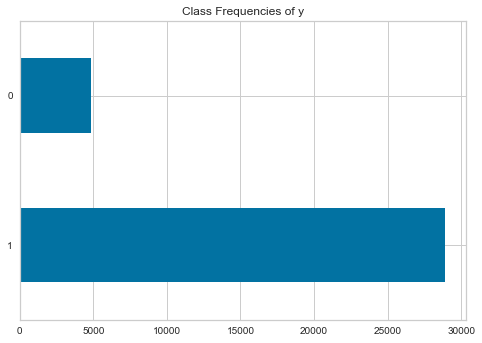

In [309]:
y.value_counts().plot.barh().set_title("Class Frequencies of y");

In [310]:
y_test.value_counts()

1    8677
0    1441
Name: property, dtype: int64

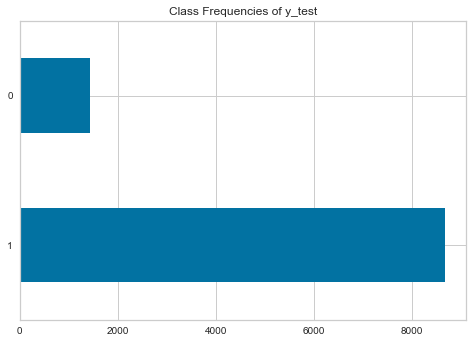

In [311]:
y_test.value_counts().plot.barh().set_title("Class Frequencies of y_test");

In [312]:
y_train.value_counts()

1    20223
0     3383
Name: property, dtype: int64

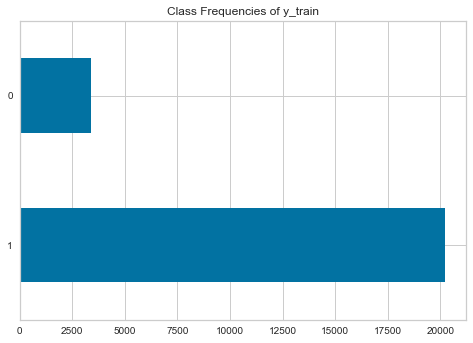

In [313]:
y_train.value_counts().plot.barh().set_title("Class Frequencies of y_train");

In [314]:
print("-------- distribution comparison of y and y_train--------")
stat, pvalue= stats.ks_2samp(y,y_train)
print("p value:%.4f" % pvalue)
if pvalue <0.05:
    print("Reject null hypothesis >> The samples come from DIFFERENT distribution.")
else:
    print("Fail to reject null hypothesis >> The samples come from same distribution.")

-------- distribution comparison of y and y_train--------
p value:1.0000
Fail to reject null hypothesis >> The samples come from same distribution.


In [315]:
print("-------- distribution comparison of y and y_test--------")
stat, pvalue= stats.ks_2samp(y,y_test)
print("p value:%.4f" % pvalue)
if pvalue <0.05:
    print("Reject null hypothesis >> The samples come from DIFFERENT distribution.")
else:
    print("Fail to reject null hypothesis >> The samples come from same distribution.")

-------- distribution comparison of y and y_test--------
p value:1.0000
Fail to reject null hypothesis >> The samples come from same distribution.


In [316]:
print("-------- distribution comparison of y_test and y_train--------")
stat, pvalue= stats.ks_2samp(y_test,y_train)
print("p value:%.4f" % pvalue)
if pvalue <0.05:
    print("Reject null hypothesis >> The samples come from DIFFERENT distribution.")
else:
    print("Fail to reject null hypothesis >> The samples come from same distribution.")

-------- distribution comparison of y_test and y_train--------
p value:1.0000
Fail to reject null hypothesis >> The samples come from same distribution.


The confusion matrix of the model with the best performance metric was created by selecting the full data and entropy criteria.
In the created matrix, the row shows the actual values reserved for the test in the data set, while the column shows the estimated decision variable classes. y_test includes 1441 commercial properties and 8677 properties for residential.The values that the model estimates for the decision variable are 9045 for residential properties, 1073 for commercial properties. Performance metrics can be observed in the classification report.Considering accuracy, baseline accuracy is about 85%.While 85% of all observations under the target variable in the data set consist of properties for residential, approximately 15% are properties for commercial.At least we expect the accuracy of the model we have established to be higher than 85%.When we look at the classification report, we see that the model has an accuracy value of 93%.This shows that the model's result is far from the baseline on an accuracy basis.This is a desired situation.Another metric that needs to be checked in the unbalanced data is the macro average F1 value, because the macro average F1 allows the lesser number of target variables in the data set to show its effectiveness.F1 value of the model is 0.84.The important factor that reduces the F1 value is the low recall score.The low recall score is caused by 63% of the prediction of the 0 target variable class with few observations.The suggestion that can be given to increase this ratio can be made to clarify the distinction between 0 target variable class and 1 target variable class by adding new variables.The weighted average F1 score, which takes into account the size of target variable classes in the performance metric calculation, has a successful ratio with a value of 93%.

In [318]:
confusion_matrix(y_test, y_pred1)

array([[ 908,  533],
       [ 165, 8512]], dtype=int64)

In [319]:
pd.DataFrame(metrics.confusion_matrix(y_test, y_pred1), index=y.unique(), columns=y.unique())

0     1
0  908   533
1  165  8512

In [321]:
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.85      0.63      0.72      1441
           1       0.94      0.98      0.96      8677

    accuracy                           0.93     10118
   macro avg       0.89      0.81      0.84     10118
weighted avg       0.93      0.93      0.93     10118



In [322]:
df["property"].value_counts()

1    30476
0     4852
Name: property, dtype: int64

When we look at the importance levels of the variables in the model, we see that the most important variable is the Dükkan & Mağaza.Next comes the price variable.The next 3 important variables are lng, Ofis and lat.The importance levels of lng and Ofis variable are close to each other.We know that Dükkan & Mağaza variable is commercial property.Considering the low number of commercial properties in the data set, the importance of the commercial property Dükkan & Mağaza variable becomes even more important since we can determine that it is important in separating the decision variable class that has few observations.The level of significance also differs significantly from other variables.When we consider the price variable, we see that it also has a significant difference according to the variables that come after it in separating the properties for residential and commercial purposes.Dominance of the distinguishing feature of the price variable is similar to the situation encountered in real life in a way that The prices of commercial properties in the same m2 and locations are more expensive than the prices of residential properties in real life.It reveals the distinction between these two classes of target variables.lng has higher importance than lat.This can be explained by the standard deviation of lng (0.112024) greater than lat (0.065419) since lng is a variable that can better differentiate between classes of target variables (0 and 1) with more variance and it contains more information than lat.

In [323]:
Importance = pd.DataFrame({"Importance": dt1_tuned.feature_importances_*100},
                         index = X_train.columns)

Text(0.5, 0, 'Attributes Importance Levels')

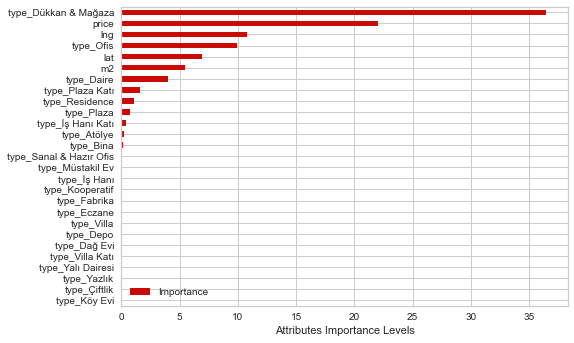

In [324]:
Importance.sort_values(by = "Importance", 
                       axis = 0, 
                       ascending = True).plot(kind ="barh", color = "r")

plt.xlabel("Attributes Importance Levels")

In [325]:
df.describe().T

count           mean            std        min            25%  \
lat       35328.0      39.921484       0.065419  38.938118      39.882244   
lng       35328.0      32.793092       0.112024  31.900515      32.755160   
price     35328.0  293252.278674  235757.685381  50.000000  145000.000000   
m2        35328.0     144.798007      60.198433   2.000000     110.000000   
buy/rent  35328.0       0.832286       0.373617   0.000000       1.000000   
property  35328.0       0.862659       0.344212   0.000000       1.000000   

                    50%            75%           max  
lat           39.913734      39.971886  4.050664e+01  
lng           32.828037      32.858047  3.354567e+01  
price     255000.000000  399000.000000  1.300000e+06  
m2           130.000000     170.000000  3.900000e+02  
buy/rent       1.000000       1.000000  1.000000e+00  
property       1.000000       1.000000  1.000000e+00

## Regression Model

In [326]:
df_reduced_model_ohe.head()

lat        lng     price     m2  property  type_Bina  type_Daire  \
0  39.964565  32.756947  280000.0   52.0         0        0.0         0.0   
1  40.000498  32.764535  725000.0  210.0         0        0.0         0.0   
2  39.884835  32.812957  900000.0   90.0         0        0.0         0.0   
3  39.894921  32.836332   65000.0  120.0         0        0.0         0.0   
4  39.856465  32.645285  560000.0   70.0         0        0.0         0.0   

   type_Dükkan & Mağaza  type_Müstakil Ev  type_Ofis  type_Plaza Katı  \
0                   1.0               0.0        0.0              0.0   
1                   1.0               0.0        0.0              0.0   
2                   0.0               0.0        1.0              0.0   
3                   1.0               0.0        0.0              0.0   
4                   0.0               0.0        0.0              1.0   

   type_Residence  type_Villa  
0             0.0         0.0  
1             0.0         0.0  
2             0.0         0.0  
3             0.0         0.0  
4             0.0         0.0

In [327]:
df_model_ohe.head()

lat        lng     price     m2  property  type_Atölye  type_Bina  \
0  39.964565  32.756947  280000.0   52.0         0          0.0        0.0   
1  40.000498  32.764535  725000.0  210.0         0          0.0        0.0   
2  39.884835  32.812957  900000.0   90.0         0          0.0        0.0   
3  39.894921  32.836332   65000.0  120.0         0          0.0        0.0   
4  39.856465  32.645285  560000.0   70.0         0          0.0        0.0   

   type_Daire  type_Dağ Evi  type_Depo  ...  type_Plaza Katı  type_Residence  \
0         0.0           0.0        0.0  ...              0.0             0.0   
1         0.0           0.0        0.0  ...              0.0             0.0   
2         0.0           0.0        0.0  ...              0.0             0.0   
3         0.0           0.0        0.0  ...              0.0             0.0   
4         0.0           0.0        0.0  ...              1.0             0.0   

   type_Sanal & Hazır Ofis  type_Villa  type_Villa Katı  type_Yalı Dairesi  \
0                      0.0         0.0              0.0                0.0   
1                      0.0         0.0              0.0                0.0   
2                      0.0         0.0              0.0                0.0   
3                      0.0         0.0              0.0                0.0   
4                      0.0         0.0              0.0                0.0   

   type_Yazlık  type_Çiftlik  type_İş Hanı  type_İş Hanı Katı  
0          0.0           0.0           0.0                0.0  
1          0.0           0.0           0.0                0.0  
2          0.0           0.0           0.0                0.0  
3          0.0           0.0           0.0                0.0  
4          0.0           0.0           0.0                0.0  

[5 rows x 28 columns]

### Regression Model

By establishing a regression model, the price of properties for sale will be estimated.The data set includes both rental and sale properties.Although rental properties and properties for sale can have similar structures considering the variables, naturally their prices differ.Therefore, it is not appropriate to find both rental and sale properties in the price estimation model. As shown graphically below, the number of ads for sale exceeds the number of ads for rent.Since the importance of estimating the sale price of a house is a more important problem in evaluating real life investment alternatives, the price estimation of the properties for sale will be made in the regression model.Thus, the properties determined as rental will be removed from the data set and the analyzes will continue.

According to the chart, the number of properties for sale is considerably higher than rental properties. Approximately 83% of all properties are for sale while 17% are for rent.

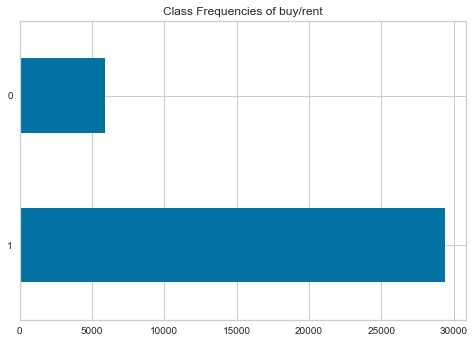

In [328]:
df["buy/rent"].value_counts().plot.barh().set_title("Class Frequencies of buy/rent");

In [329]:
df_model_ohe.loc[df_model_ohe["price"] < 31001]

lat        lng    price     m2  property  type_Atölye  type_Bina  \
957    38.938118  33.545668  24000.0   73.0         0          0.0        0.0   
1049   39.894302  32.834270  20000.0   80.0         0          0.0        0.0   
1481   39.876722  32.837728  18000.0   70.0         0          0.0        0.0   
1623   39.911975  32.911674  25000.0   60.0         0          0.0        0.0   
1794   39.948992  32.640746  27000.0   50.0         0          0.0        0.0   
...          ...        ...      ...    ...       ...          ...        ...   
35310  39.879166  32.855278   5000.0  200.0         1          0.0        0.0   
35311  40.038906  32.848680    750.0  136.0         1          0.0        0.0   
35313  39.968623  32.633508   1200.0   54.0         1          0.0        0.0   
35317  39.996656  32.628506    950.0   54.0         1          0.0        0.0   
35318  39.970839  32.689501   1500.0   95.0         1          0.0        0.0   

       type_Daire  type_Dağ Evi  type_Depo  ...  type_Plaza Katı  \
957           0.0           0.0        0.0  ...              0.0   
1049          1.0           0.0        0.0  ...              0.0   
1481          0.0           0.0        0.0  ...              0.0   
1623          0.0           0.0        0.0  ...              0.0   
1794          1.0           0.0        0.0  ...              0.0   
...           ...           ...        ...  ...              ...   
35310         1.0           0.0        0.0  ...              0.0   
35311         1.0           0.0        0.0  ...              0.0   
35313         1.0           0.0        0.0  ...              0.0   
35317         1.0           0.0        0.0  ...              0.0   
35318         1.0           0.0        0.0  ...              0.0   

       type_Residence  type_Sanal & Hazır Ofis  type_Villa  type_Villa Katı  \
957               0.0                      0.0         0.0              0.0   
1049              0.0                      0.0         0.0              0.0   
1481              0.0                      0.0         0.0              0.0   
1623              0.0                      0.0         0.0              0.0   
1794              0.0                      0.0         0.0              0.0   
...               ...                      ...         ...              ...   
35310             0.0                      0.0         0.0              0.0   
35311             0.0                      0.0         0.0              0.0   
35313             0.0                      0.0         0.0              0.0   
35317             0.0                      0.0         0.0              0.0   
35318             0.0                      0.0         0.0              0.0   

       type_Yalı Dairesi  type_Yazlık  type_Çiftlik  type_İş Hanı  \
957                  0.0          0.0           0.0           0.0   
1049                 0.0          0.0           0.0           0.0   
1481                 0.0          0.0           0.0           0.0   
1623                 0.0          0.0           0.0           0.0   
1794                 0.0          0.0           0.0           0.0   
...                  ...          ...           ...           ...   
35310                0.0          0.0           0.0           0.0   
35311                0.0          0.0           0.0           0.0   
35313                0.0          0.0           0.0           0.0   
35317                0.0          0.0           0.0           0.0   
35318                0.0          0.0           0.0           0.0   

       type_İş Hanı Katı  
957                  0.0  
1049                 0.0  
1481                 0.0  
1623                 0.0  
1794                 0.0  
...                  ...  
35310                0.0  
35311                0.0  
35313                0.0  
35317                0.0  
35318                0.0  

[4699 rows x 28 columns]

In [85]:
df_model_ohe.drop(df_model_ohe.loc[df_model_ohe["price"] < 31001].index, inplace=True)

In [86]:
df_model_ohe.loc[df_model_ohe["price"] < 31001]

Empty DataFrame
Columns: [lat, lng, price, m2, property, type_Atölye, type_Bina, type_Daire, type_Dağ Evi, type_Depo, type_Dükkan & Mağaza, type_Eczane, type_Fabrika, type_Kooperatif, type_Köy Evi, type_Müstakil Ev, type_Ofis, type_Plaza, type_Plaza Katı, type_Residence, type_Sanal & Hazır Ofis, type_Villa, type_Villa Katı, type_Yalı Dairesi, type_Yazlık, type_Çiftlik, type_İş Hanı, type_İş Hanı Katı]
Index: []

[0 rows x 28 columns]

In [332]:
#Model Induction

In [333]:
model = LinearRegression()

In [334]:
X = df_model_ohe[["lat","lng","m2","property","type_Atölye","type_Bina","type_Daire","type_Dağ Evi","type_Depo","type_Dükkan & Mağaza","type_Eczane","type_Fabrika","type_Kooperatif","type_Köy Evi","type_Müstakil Ev","type_Ofis","type_Plaza","type_Plaza Katı","type_Residence","type_Sanal & Hazır Ofis","type_Villa","type_Villa Katı","type_Yalı Dairesi","type_Yazlık","type_Çiftlik","type_İş Hanı","type_İş Hanı Katı"]]
y = df_model_ohe["price"]

In [335]:
model_lr = model.fit(X,y)

In [336]:
print(f'Coefficients: {model_lr.coef_}')
print(f'Intercept: {model_lr.intercept_}')
print(f'R^2 score: {model_lr.score(X,y)}')

Coefficients: [-4.99551006e+05  1.48283621e+05  2.25269402e+03 -4.79974855e+04
  7.63273272e+04 -2.71934060e+04 -2.25602097e+04 -5.96654137e+04
  1.49204366e+04  9.90857715e+04 -5.54214047e+04 -5.07269363e+04
  1.88719030e+04  1.51419779e+05 -6.47530391e+03  9.57085284e+04
  1.01622492e+05  7.60021154e+04 -2.25987518e+04  5.93218524e+04
 -2.81704603e+04 -4.36557457e-11 -8.48490626e+04 -1.74612192e+04
 -1.48822919e+04 -4.92646143e+04  8.88623014e+04]
Intercept: 15166142.620679678
R^2 score: 0.3898072354453739


In [337]:
#Train-Test Splitting

In [338]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state=42)

Train-test-validation split:While train-test split, 30% of the observations in the data set were reserved for the test, while 70% were reserved for the train since small data set means less reliable performance estimate and small training set means less reliable model, poor performance. To be able to make trade-off, we can determine that 30-70 split is suitable as rule of thumb. random_state is used as parameter of train_test_split since it controls the shuffling applied to the data before applying the split and in order to obtain reproducible output across multiple function calls, integer value(42) assigns to random_state.

In addition to the above, we expect that distribution of target variable should be preserved when we split the data.We would expect training and test sets to have a similar distribution. When we look at the histogram graphs below, it seems that the data set with all observations of the target variable (y), the data set reserved for test regarding target variable (y_test) and the data set reserved for the train (y_train) of the target variable have similar distributions. We observed that there were similar distributions by doing Kolmogorov-Smirnov tests.We applied the Kolmogorov-Smirnov test because it is successful in distribution similarity tests in data sets with more than 100 observations.We can conclude that the train-test-validation split has been successfully made.

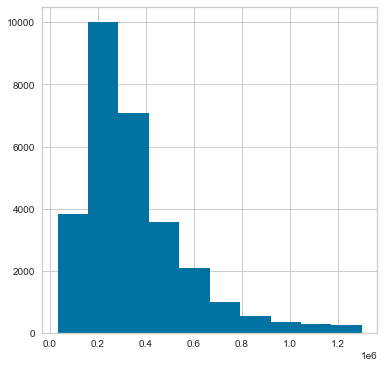

In [339]:
y.hist(figsize = (6,6));

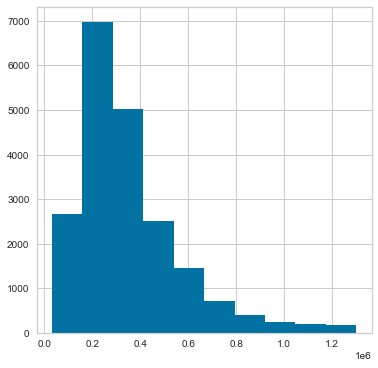

In [340]:
y_train.hist(figsize = (6,6));

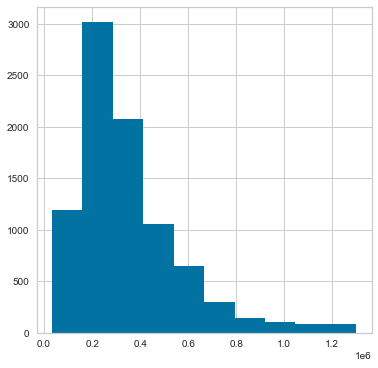

In [341]:
y_test.hist(figsize = (6,6));

In [342]:
print("-------- distribution comparison of y and y_train--------")
stat, pvalue= stats.ks_2samp(y,y_train)
print("p value:%.4f" % pvalue)
if pvalue <0.05:
    print("Reject null hypothesis >> The samples come from DIFFERENT distribution.")
else:
    print("Fail to reject null hypothesis >> The samples come from same distribution.")

-------- distribution comparison of y and y_train--------
p value:1.0000
Fail to reject null hypothesis >> The samples come from same distribution.


In [343]:
print("-------- distribution comparison of y and y_test--------")
stat, pvalue= stats.ks_2samp(y,y_test)
print("p value:%.4f" % pvalue)
if pvalue <0.05:
    print("Reject null hypothesis >> The samples come from DIFFERENT distribution.")
else:
    print("Fail to reject null hypothesis >> The samples come from same distribution.")

-------- distribution comparison of y and y_test--------
p value:0.9732
Fail to reject null hypothesis >> The samples come from same distribution.


In [344]:
print("-------- distribution comparison of y_test and y_train--------")
stat, pvalue= stats.ks_2samp(y_test,y_train)
print("p value:%.4f" % pvalue)
if pvalue <0.05:
    print("Reject null hypothesis >> The samples come from DIFFERENT distribution.")
else:
    print("Fail to reject null hypothesis >> The samples come from same distribution.")

-------- distribution comparison of y_test and y_train--------
p value:0.7776
Fail to reject null hypothesis >> The samples come from same distribution.


In [345]:
model_base = LinearRegression().fit(X_train, y_train)
pred_base_train = model_base.predict(X_train)
pred_base_test = model_base.predict(X_test)
mse_train = mean_squared_error(y_train, pred_base_train)
mse_test = mean_squared_error(y_test, pred_base_test)
train_error = np.sqrt(mse_train)
RMSE_base = np.sqrt(mse_test) # test error

In [346]:
train_error

168406.96302951782

In [347]:
RMSE_base

167583.55090006528

In [348]:
scores = cross_val_score(model_base, X_test, y_test, cv = 10)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.40 accuracy with a standard deviation of 0.03


In [349]:
#Comparison
comp_data = pd.DataFrame({"Obs": y_test, "Pred": pred_base_test})
comp_data["Error"] = comp_data["Obs"] - comp_data["Pred"]
comp_data.head()

Obs           Pred          Error
29137  349000.0  310024.253592   38975.746408
28157  345000.0  281204.604138   63795.395862
24446  470000.0  424994.674916   45005.325084
11850  284000.0  393612.543874 -109612.543874
23028  290000.0  242584.087431   47415.912569

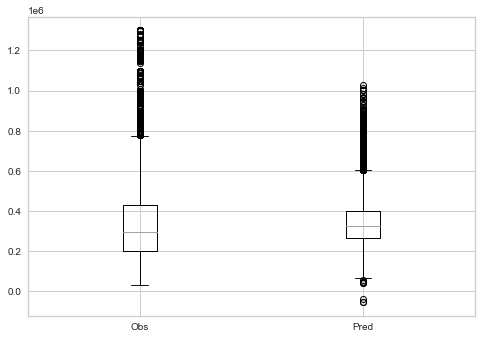

In [350]:
comp_data.boxplot(column=["Obs","Pred"]);

**Residual Operation:** Residuals are very important for regression models as residuals are useful in testing the assumptions underlying regression analysis.Also, classifying the degrees of errors is important to focus on the actual error sources.

In [351]:
comp_data["Error"] = comp_data["Obs"] - comp_data["Pred"]
lower_base = np.percentile(comp_data["Error"], 10)
upper_base = np.percentile(comp_data["Error"], 90)
(lower_base, upper_base)

(-156449.39475399908, 200633.76909754722)

In [352]:
comp_data["Error_Class"] = [2 if v > upper_base else 1 if v < lower_base else 0 for v in comp_data["Error"]]

In [353]:
error_counts_base = comp_data.value_counts("Error_Class")
error_counts_base

Error_Class
0    6966
2     871
1     871
dtype: int64

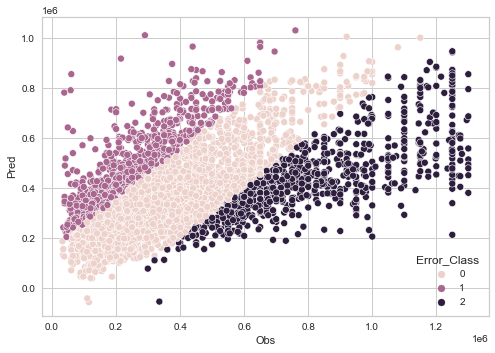

In [354]:
sns.scatterplot(data=comp_data, x=comp_data["Obs"], y=comp_data["Pred"], hue=comp_data["Error_Class"]);

### Assumption Control

**Kolmogorov-Smirnov Normality Test:** To control whether residuals are normally distributed or not. Residual's normality assumption. We expect residuals are distributed normally.

**Variance Inflation Factor for Multicollinearity Test:** To control whether Multicollinearity exist or not between variables. We expect there are no multicolliearity.

**Durbin Watson Autocorrelation Test:** To control whether there is correlation between residuals or not. We expect there is no autocorrelation between residuals.

**Breusch-Pagan Heteroskedasticity Test:** heteroscedasticity means variability of residuals is unequal across the range of values. We expect there is no Heteroskedasticity regarding residuals.

In [355]:
def OLS_assumption_controller(model, tr_X_data, tr_Y_data):
    yhat = model.predict(tr_X_data)
    df = pd.DataFrame({'Actual': tr_Y_data, 'Predicted': yhat})
    df["Residuals"] = abs(df["Actual"]) - abs(df["Predicted"])
    
    print("Kolmogorov-Smirnov Normality Test --------------------------------------")
    p_ks = stats.kstest(df["Residuals"],"norm",args=(np.mean(df["Residuals"]), np.std(df["Residuals"])))[1]
    if p_ks < 0.05:
        print(colored("Residuals are not normally distributed", "red", attrs=["bold"]))
    else:
        print(colored("Residuals are normally distributed", "green", attrs=["bold"]))
        
    print("\n")
    
    print("Variance Inflation Factor for Multicollinearity Test -----------------")
    
    VIF = [variance_inflation_factor(tr_X_data.values, i) for i in range(tr_X_data.shape[1])]
    
    for idx, vif in enumerate(VIF):
        if vif < 10:
            print(colored('{0}: {1}'.format(tr_X_data.columns[idx], vif), "green", attrs=["bold"]))
        else:
            print(colored('{0}: {1}'.format(tr_X_data.columns[idx], vif), "red", attrs=["bold"]))
    
    print("\n")
    
    print("Durbin Watson Autocorrelation Test -----------------------------------")
    durbinWatson = durbin_watson(df["Residuals"])
    
    if 1.5 < durbinWatson < 2.5:
        print(colored("There is no autocorrelation in the residuals", "green", attrs=["bold"]))
    else:
        print(colored("There is an autocorrelation in the residuals", "red", attrs=["bold"]))
    
    print("\n")
    
    print("Breusch-Pagan Heteroskedasticity Test --------------------------------")
    bp_test = het_breuschpagan(df["Residuals"], tr_X_data)
    
    if bp_test[1] < 0.05:
        print(colored("The model is heteroskedastic.", "red", attrs=["bold"]))
    else:
        print(colored("The model is not heteroskedastic.", "green", attrs=["bold"]))

In [356]:
res_base = OLS_assumption_controller(model_base, X_train, y_train)

Kolmogorov-Smirnov Normality Test --------------------------------------
Residuals are not normally distributed


Variance Inflation Factor for Multicollinearity Test -----------------


C:\Users\ozan\Anaconda3\lib\site-packages\numpy\linalg\linalg.py:1872: RuntimeWarning: invalid value encountered in greater
  return count_nonzero(S > tol, axis=-1)
C:\Users\ozan\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1636: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


lat: 378639.9713667224
lng: 1.112718607979542
m2: 1.012680426414686
property: 1.6764886358782018
type_Atölye: 209.4382229341234
type_Bina: 9979.36746088415
type_Daire: 306673.12807424745
type_Dağ Evi: 88.4923613182947
type_Depo: 87.84863431090895
type_Dükkan & Mağaza: 13880.589285200049
type_Eczane: 35.72708994372052
type_Fabrika: 18.327111555473646
type_Kooperatif: 314.0813457354951
type_Köy Evi: nan
type_Müstakil Ev: 2658.663690367395
type_Ofis: 5159.679398079351
type_Plaza: 504.36703451922443
type_Plaza Katı: 1251.1331063223167
type_Residence: 6985.693774834116
type_Sanal & Hazır Ofis: 53.33701376083706
type_Villa: 4593.081374901236
type_Villa Katı: nan
type_Yalı Dairesi: nan
type_Yazlık: 18.424349131776836
type_Çiftlik: 122.61594967551237
type_İş Hanı: 122.57307237010968
type_İş Hanı Katı: 383.0537261261176


Durbin Watson Autocorrelation Test -----------------------------------
There is no autocorrelation in the residuals


Breusch-Pagan Heteroskedasticity Test -------------------

In [357]:
## MIN-MAX SCALING
scaler = MinMaxScaler()
scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(scaled)
X_scaled.rename({0: "lat",
                 1: "lng",
                 2: "m2",
                 3: "property",
                 4: "type_Atölye",
                 5: "type_Bina",
                 6: "type_Daire",
                 7: "type_Dağ Evi",
                 8: "type_Depo",
                 9: "type_Dükkan & Mağaza",
                 10: "type_Eczane",
                 11: "type_Fabrika",
                 12: "type_Kooperatif",
                 13: "type_Köy Evi",
                 14: "type_Müstakil Ev",
                 15: "type_Ofis",
                 16: "type_Plaza",
                 17: "type_Plaza Katı",
                 18: "type_Residence",
                 19: "type_Sanal & Hazır Ofis",
                 20: "type_Villa",
                 21: "type_Villa Katı",
                 22: "type_Yalı Dairesi",
                 23: "type_Yazlık",
                 24: "type_Çiftlik",
                 25: "type_İş Hanı",
                 26: "type_İş Hanı Katı"}, axis=1, inplace = True)


In [358]:
X_scaled.head()

lat       lng        m2  property  type_Atölye  type_Bina  type_Daire  \
0  0.654398  0.520585  0.128866       0.0          0.0        0.0         0.0   
1  0.677307  0.525197  0.536082       0.0          0.0        0.0         0.0   
2  0.603565  0.554630  0.226804       0.0          0.0        0.0         0.0   
3  0.609995  0.568839  0.304124       0.0          0.0        0.0         0.0   
4  0.585477  0.452710  0.175258       0.0          0.0        0.0         0.0   

   type_Dağ Evi  type_Depo  type_Dükkan & Mağaza  ...  type_Plaza Katı  \
0           0.0        0.0                   1.0  ...              0.0   
1           0.0        0.0                   1.0  ...              0.0   
2           0.0        0.0                   0.0  ...              0.0   
3           0.0        0.0                   1.0  ...              0.0   
4           0.0        0.0                   0.0  ...              1.0   

   type_Residence  type_Sanal & Hazır Ofis  type_Villa  type_Villa Katı  \
0             0.0                      0.0         0.0              0.0   
1             0.0                      0.0         0.0              0.0   
2             0.0                      0.0         0.0              0.0   
3             0.0                      0.0         0.0              0.0   
4             0.0                      0.0         0.0              0.0   

   type_Yalı Dairesi  type_Yazlık  type_Çiftlik  type_İş Hanı  \
0                0.0          0.0           0.0           0.0   
1                0.0          0.0           0.0           0.0   
2                0.0          0.0           0.0           0.0   
3                0.0          0.0           0.0           0.0   
4                0.0          0.0           0.0           0.0   

   type_İş Hanı Katı  
0                0.0  
1                0.0  
2                0.0  
3                0.0  
4                0.0  

[5 rows x 27 columns]

In [359]:
X_train_MM, X_test_MM, y_train_MM, y_test_MM = train_test_split(X_scaled, y, 
                                                    test_size=0.30, 
                                                    random_state=42)

In [361]:
model_MM = LinearRegression().fit(X_train_MM, y_train_MM)
pred_MM_train = model_MM.predict(X_train_MM)
pred_MM_test = model_MM.predict(X_test_MM)
mse_train = mean_squared_error(y_train_MM, pred_MM_train)
mse_test = mean_squared_error(y_test_MM, pred_MM_test)
train_error = np.sqrt(mse_train)
RMSE_MM = np.sqrt(mse_test) # test error

In [362]:
train_error

168406.96302951794

In [363]:
RMSE_MM

167583.55090006534

In [364]:
scores = cross_val_score(model_MM, X_test_MM, y_test_MM, cv = 10)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.40 accuracy with a standard deviation of 0.03


In [365]:
#Comparison
comp_data_MM = pd.DataFrame({"Obs": y_test_MM, "Pred": pred_MM_test})
comp_data_MM["Error"] = comp_data_MM["Obs"] - comp_data_MM["Pred"]
comp_data_MM.head()

Obs           Pred          Error
29137  349000.0  310024.253592   38975.746408
28157  345000.0  281204.604138   63795.395862
24446  470000.0  424994.674916   45005.325084
11850  284000.0  393612.543874 -109612.543874
23028  290000.0  242584.087431   47415.912569

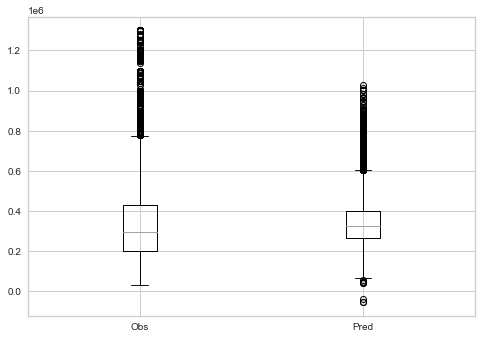

In [366]:
comp_data.boxplot(column=["Obs","Pred"]);

### Assumption Control

In [367]:
res_mm = OLS_assumption_controller(model_MM, X_train_MM, y_train_MM)

Kolmogorov-Smirnov Normality Test --------------------------------------
Residuals are not normally distributed


Variance Inflation Factor for Multicollinearity Test -----------------


C:\Users\ozan\Anaconda3\lib\site-packages\numpy\linalg\linalg.py:1872: RuntimeWarning: invalid value encountered in greater
  return count_nonzero(S > tol, axis=-1)
C:\Users\ozan\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1636: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


lat: 232.62618181133186
lng: 1.1127186079795433
m2: 1.0126804264146858
property: 1.6764886358782014
type_Atölye: 1.136228384575588
type_Bina: 8.194200566946472
type_Daire: 221.3064483401822
type_Dağ Evi: 1.0792506648817686
type_Depo: 1.0567663437031785
type_Dükkan & Mağaza: 10.089248668584482
type_Eczane: 1.0221738749576827
type_Fabrika: 1.0101535952236447
type_Kooperatif: 1.2312956192400977
type_Köy Evi: nan
type_Müstakil Ev: 2.8678818587840857
type_Ofis: 4.372125529499743
type_Plaza: 1.3221129756128451
type_Plaza Katı: 1.8082392604660724
type_Residence: 5.9751528492219474
type_Sanal & Hazır Ofis: 1.039745234342371
type_Villa: 4.387121565411709
type_Villa Katı: nan
type_Yalı Dairesi: nan
type_Yazlık: 1.0137714575108423
type_Çiftlik: 1.086068222051918
type_İş Hanı: 1.078424177505882
type_İş Hanı Katı: 1.2501477771554763


Durbin Watson Autocorrelation Test -----------------------------------
There is no autocorrelation in the residuals


Breusch-Pagan Heteroskedasticity Test ----------

**Comment:**We see that data with and without min-max scaler using full data does not meet the assumptions.We found that the prediction was not successful because it did not provide assumptions, the rmse error metric was high, and validation score of  accuracy was low.Therefore, it was decided to try a different regression approach.

## ElasticNet Regresyonu

Elastic-Net uses both ℓ1-norm and ℓ2-norm regularization of coefficients. It has 0≤𝛼≤1 is a tuning parameter where 𝛼=0 corresponds to Ridge and 𝛼=1 corresponds to lasso. Elastic net works successfully with high-dimensional.Elastic-net is useful when there are multiple features which are correlated with one another (addresses multi-collinearity).

In [368]:
standardscaler= StandardScaler()
scaled_data=standardscaler.fit_transform(X)
scaled_data=pd.DataFrame(scaled_data, columns=X.columns)
scaled_data.head()

lat       lng        m2  property  type_Atölye  type_Bina  type_Daire  \
0  0.570977 -0.265848 -1.647125 -3.169309    -0.024911  -0.169542     -2.5839   
1  1.096142 -0.201327  1.147751 -3.169309    -0.024911  -0.169542     -2.5839   
2 -0.594276  0.210439 -0.974939 -3.169309    -0.024911  -0.169542     -2.5839   
3 -0.446871  0.409213 -0.444267 -3.169309    -0.024911  -0.169542     -2.5839   
4 -1.008909 -1.215390 -1.328721 -3.169309    -0.024911  -0.169542     -2.5839   

   type_Dağ Evi  type_Depo  type_Dükkan & Mağaza  ...  type_Plaza Katı  \
0     -0.013126  -0.018565              5.007811  ...        -0.058205   
1     -0.013126  -0.018565              5.007811  ...        -0.058205   
2     -0.013126  -0.018565             -0.199688  ...        -0.058205   
3     -0.013126  -0.018565              5.007811  ...        -0.058205   
4     -0.013126  -0.018565             -0.199688  ...        17.180613   

   type_Residence  type_Sanal & Hazır Ofis  type_Villa  type_Villa Katı  \
0       -0.143171                -0.014379   -0.114562              0.0   
1       -0.143171                -0.014379   -0.114562              0.0   
2       -0.143171                -0.014379   -0.114562              0.0   
3       -0.143171                -0.014379   -0.114562              0.0   
4       -0.143171                -0.014379   -0.114562              0.0   

   type_Yalı Dairesi  type_Yazlık  type_Çiftlik  type_İş Hanı  \
0           -0.00587     -0.00587     -0.023485     -0.016604   
1           -0.00587     -0.00587     -0.023485     -0.016604   
2           -0.00587     -0.00587     -0.023485     -0.016604   
3           -0.00587     -0.00587     -0.023485     -0.016604   
4           -0.00587     -0.00587     -0.023485     -0.016604   

   type_İş Hanı Katı  
0          -0.031625  
1          -0.031625  
2          -0.031625  
3          -0.031625  
4          -0.031625  

[5 rows x 27 columns]

In [369]:
X_train_enet, X_test_enet, y_train_enet, y_test_enet = train_test_split(scaled_data, y, 
                                                    test_size=0.30, 
                                                    random_state=42)

In [370]:
model_enet = ElasticNet().fit(X_train_enet, y_train_enet)
pred_enet_train = model_enet.predict(X_train_enet)
pred_enet_test = model_enet.predict(X_test_enet)
mse_train = mean_squared_error(y_train_enet, pred_enet_train)
mse_test = mean_squared_error(y_test_enet, pred_enet_test)
train_error = np.sqrt(mse_train)
RMSE_enet = np.sqrt(mse_test) # test error

In [371]:
print(f'Coefficients: {model_enet.coef_}')
print(f'Intercept: {model_enet.intercept_}')

Coefficients: [-2.18498793e+04  7.39746922e+03  8.29268209e+04 -1.00553252e+04
  1.85428929e+03 -3.47461872e+03 -7.08770668e+03 -5.58059475e+02
  8.25480092e+02  1.20984204e+04 -5.79529562e+02 -4.02857637e+02
  2.92371337e+02 -0.00000000e+00 -1.06272228e+03  7.78596672e+03
  2.61926655e+03  2.80864958e+03 -2.59469294e+03  2.27771568e+02
 -1.75043000e+03  0.00000000e+00  0.00000000e+00 -6.00883138e+01
 -4.53184317e+02 -9.38963421e+02  1.99816078e+03]
Intercept: 350774.4779014588


In [372]:
train_error

174274.51914977437

In [373]:
RMSE_enet

175071.4408108111

In [374]:
scores = cross_val_score(model_enet, X_test_enet, y_test_enet, cv = 10)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.36 accuracy with a standard deviation of 0.02


### Tuning

In [375]:
enet_cv_model = ElasticNetCV(cv = 10, random_state = 0).fit(X_train_enet, y_train_enet)

In [376]:
enet_tuned = ElasticNet(alpha = enet_cv_model.alpha_).fit(X_train_enet,y_train_enet)

In [377]:
pred_enet_train = enet_tuned.predict(X_train_enet)
pred_enet_test = enet_tuned.predict(X_test_enet)
mse_train = mean_squared_error(y_train_enet, pred_enet_train)
mse_test = mean_squared_error(y_test_enet, pred_enet_test)
train_error = np.sqrt(mse_train)
RMSE_enet = np.sqrt(mse_test) # test error

In [378]:
train_error

213718.60662315864

In [379]:
RMSE_enet

216515.1690440967

In [380]:
#Comparison
comp_data_enet = pd.DataFrame({"Obs": y_test_enet, "Pred": pred_enet_test})
comp_data_enet["Error"] = comp_data_enet["Obs"] - comp_data_enet["Pred"]
comp_data_enet.head()

Obs           Pred          Error
29137  349000.0  350635.002488   -1635.002488
28157  345000.0  350410.879897   -5410.879897
24446  470000.0  351580.045549  118419.954451
11850  284000.0  351504.418590  -67504.418590
23028  290000.0  350129.018262  -60129.018262

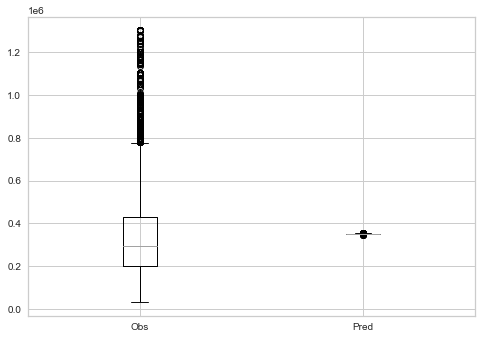

In [381]:
comp_data_enet.boxplot(column=["Obs","Pred"]);

In [382]:
#Residual
comp_data_enet["Error"] = comp_data_enet["Obs"] - comp_data_enet["Pred"]
lower_enet = np.percentile(comp_data_enet["Error"], 10)
upper_enet = np.percentile(comp_data_enet["Error"], 90)
(lower_enet, upper_enet)

(-205290.8527247511, 288108.1983491337)

In [383]:
comp_data_enet["Error_Class"] = [2 if v > upper_enet else 1 if v < lower_enet else 0 for v in comp_data_enet["Error"]]

In [384]:
error_counts_enet = comp_data_enet.value_counts("Error_Class")
error_counts_enet

Error_Class
0    6966
2     871
1     871
dtype: int64

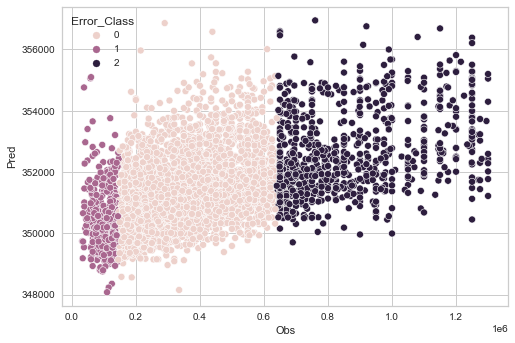

In [385]:
sns.scatterplot(data=comp_data_enet, x=comp_data_enet["Obs"], y=comp_data_enet["Pred"], hue=comp_data_enet["Error_Class"]);

In [387]:
res_enet = OLS_assumption_controller(enet_tuned, X_train_enet, y_train_enet)

Kolmogorov-Smirnov Normality Test --------------------------------------
Residuals are not normally distributed


Variance Inflation Factor for Multicollinearity Test -----------------


C:\Users\ozan\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:185: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)
C:\Users\ozan\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1636: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
C:\Users\ozan\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1636: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


lat: 1.1152992625720741
lng: 1.112718607979543
m2: 1.0126804264146856
property: 1.6764886358782005
type_Atölye: inf
type_Bina: inf
type_Daire: inf
type_Dağ Evi: inf
type_Depo: inf
type_Dükkan & Mağaza: inf
type_Eczane: inf
type_Fabrika: inf
type_Kooperatif: inf
type_Köy Evi: 1.452300636362448e-06
type_Müstakil Ev: inf
type_Ofis: inf
type_Plaza: inf
type_Plaza Katı: inf
type_Residence: inf
type_Sanal & Hazır Ofis: inf
type_Villa: inf
type_Villa Katı: nan
type_Yalı Dairesi: 0.0
type_Yazlık: inf
type_Çiftlik: inf
type_İş Hanı: inf
type_İş Hanı Katı: inf


Durbin Watson Autocorrelation Test -----------------------------------
There is no autocorrelation in the residuals


Breusch-Pagan Heteroskedasticity Test --------------------------------
The model is heteroskedastic.


**Comment:** Although scaled methods (StandardScaler and MinMaxScaler) were used with elastic regression, the necessary assumptions could not be provided for the estimation of the prices of the properties.Since the assumptions of linear methods in price estimation could not be provided, a good estimation could not be made.More advanced nonparametric method will be tried to be able to better estimation.

## XGBoost

It is the scalable version of GBM optimized to increase speed and prediction performance. Prediction success is high.

In [87]:
X = df_model_ohe[["lat","lng","m2","property","type_Atölye","type_Bina","type_Daire","type_Dağ Evi","type_Depo","type_Dükkan & Mağaza","type_Eczane","type_Fabrika","type_Kooperatif","type_Köy Evi","type_Müstakil Ev","type_Ofis","type_Plaza","type_Plaza Katı","type_Residence","type_Sanal & Hazır Ofis","type_Villa","type_Villa Katı","type_Yalı Dairesi","type_Yazlık","type_Çiftlik","type_İş Hanı","type_İş Hanı Katı"]]
y = df_model_ohe["price"]

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state=42)

In [89]:
xgb_model = XGBRegressor().fit(X_train, y_train)
pred_xgb_train = xgb_model.predict(X_train)
pred_xgb_test = xgb_model.predict(X_test)
mse_train = mean_squared_error(y_train, pred_xgb_train)
mse_test = mean_squared_error(y_test, pred_xgb_test)
train_error = np.sqrt(mse_train)
RMSE_xgb = np.sqrt(mse_test) # test error

In [90]:
train_error

85001.08123756578

In [91]:
RMSE_xgb

118972.89081003114

In [92]:
scores = cross_val_score(xgb_model, X_test, y_test, cv = 10)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.65 accuracy with a standard deviation of 0.04


### Model Tuning

In [93]:
xgb_model

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

Important parameters to be used in model tuning are colsample_bytree, learning_rate, max_depth and n_estimators.

colsample_bytree:sample rate from variables per tree.learning_rate: One of the variables we use to prevent overfitting.It takes value between 0 and 1. max_depth: a parameter that prevents overfitting and what we will call the complexity parameter.n_estimators:The number of trees in an XGBoost model is specified to XGBRegressor class in the n_estimators argument.

In [94]:
xgb_grid = {
     'colsample_bytree': [0.4, 0.5,0.6,0.9,1], 
     'n_estimators':[100, 200, 500, 1000],
     'max_depth': [2,3,4,5,6],
     'learning_rate': [0.1, 0.01, 0.5]
}

**IMPORTANT NOTE**

Since dataset's size is huge and we have used wide range of parameter' values to be able to get more accurate result, computation time of the following code is about **3 hours**. This situation should be considered while running the code.

In [95]:
xgb = XGBRegressor()
xgb_cv = GridSearchCV(xgb, 
                      param_grid = xgb_grid, 
                      cv = 10, 
                      n_jobs = -1,
                      verbose = 2)

xgb_cv.fit(X_train, y_train)

Fitting 10 folds for each of 300 candidates, totalling 3000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   49.9s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  5.5min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed: 14.6min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed: 26.7min
[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed: 45.4min
[Parallel(n_jobs=-1)]: Done 1450 tasks      | elapsed: 68.0min
[Parallel(n_jobs=-1)]: Done 1977 tasks      | elapsed: 100.4min
[Parallel(n_jobs=-1)]: Done 2584 tasks      | elapsed: 146.9min
[Parallel(n_jobs=-1)]: Done 3000 out of 3000 | elapsed: 182.8min finished


GridSearchCV(cv=10,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=100, n_jobs=None,
                                    num_parallel_tree=None, random_state=None,
                                    reg_alpha=None, reg_lambda=None,
                                    scale_pos_weight=None, subsample=None,
                                    tree_method=None, validate_par

In [96]:
xgb_cv.best_params_

{'colsample_bytree': 0.9,
 'learning_rate': 0.1,
 'max_depth': 6,
 'n_estimators': 500}

In [97]:
xgb_tuned = XGBRegressor(colsample_bytree = 0.9, 
                         learning_rate = 0.1, 
                         max_depth = 6, 
                         n_estimators = 500) 

xgb_tuned = xgb_tuned.fit(X_train,y_train)

In [102]:
pred_xgb_train = xgb_tuned.predict(X_train)
pred_xgb_test = xgb_tuned.predict(X_test)
mse_train = mean_squared_error(y_train, pred_xgb_train)
mse_test = mean_squared_error(y_test, pred_xgb_test)
train_error = np.sqrt(mse_train)
RMSE_xgb = np.sqrt(mse_test) # test error

In [103]:
train_error

78016.30416850772

In [104]:
RMSE_xgb

117054.48727708595

In [101]:
scores = cross_val_score(xgb_tuned, X_test, y_test, cv = 10)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.66 accuracy with a standard deviation of 0.03


### Bias-Variance

**Bias:** the difference between the average prediction of our model and the correct value which we are trying to predict.   
High bias means the model does not fit to the training data well. That is, the model is an oversimplification. High bias causes high error on training and test data.   

**To fix high bias (underfit), you can**     

- get additional features
- add polynomial features

**Variance:** Variability of the model prediction for a given data point.
High variance means the model overfits the training data and it does not generalize.
High variance causes a small error on training data but a large error on test data.

**To fix high variance (overfit), you can**  
- get more training example
- try a smaller set of features

When the training error is very low and the test error is high, we can say that the model overfits the data. Then, while bias is low, variance will be high. There is overfitting problem. When the training error and test error are high, we can say that the model underfits the data. Then, while bias is high, variance will be low. There is underfitting problem. When we observe constructed models, we cannot conclude that models are overfitting since values of their train and test errors are similar to each other. When we especially conduct XGBoost model, train and test error is similar to each other and its values looks reasonable regarding price prediction.

By using XGBoost, the performance metric such as rmse and validation score of accuracy achieved is the best of all models.

**Multiple Linear Regression:** test error: 167583, train error:168406 and cross validation score of accuracy for test data: 0.40

**Elastic Net:** test error: 175071, train error:174274 and cross validation score of accuracy for test data: 0.36

**XGBoost** test error: 117054, train error:? and cross validation score of accuracy for test data: 0.65



In [231]:
#Comparison
comp_data_xgb = pd.DataFrame({"Obs": y_test, "Pred": pred_xgb_test})
comp_data_xgb["Error"] = comp_data_xgb["Obs"] - comp_data_xgb["Pred"]
comp_data_xgb.head()

Obs          Pred        Error
29137  349000.0  268772.56250  80227.43750
28157  345000.0  320551.78125  24448.21875
24446  470000.0  474627.62500  -4627.62500
11850  284000.0  315482.84375 -31482.84375
23028  290000.0  358747.12500 -68747.12500

When we look at the box-plot chart, it can be observed that there is a similarity between real prices and estimated prices. Also the distributions look similar

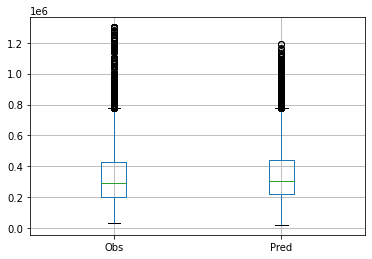

In [232]:
comp_data_xgb.boxplot(column=["Obs","Pred"]);

In [233]:
#Residual
comp_data_xgb["Error"] = comp_data_xgb["Obs"] - comp_data_xgb["Pred"]
lower_xgb = np.percentile(comp_data_xgb["Error"], 10)
upper_xgb = np.percentile(comp_data_xgb["Error"], 90)
(lower_xgb, upper_xgb)

(-108083.078125, 111859.37500000003)

In [234]:
comp_data_xgb["Error_Class"] = [2 if v > upper_xgb else 1 if v < lower_xgb else 0 for v in comp_data_xgb["Error"]]

In [235]:
error_counts_xgb = comp_data_xgb.value_counts("Error_Class")
error_counts_xgb

Error_Class
0    6966
2     871
1     871
dtype: int64

When we look at the graph of error classes, 1 and 2 are the classes with the highest error amount. Class 2 shows that the predicted values are much more than the actual values, while class 1 shows that the true values are much more than the predicted values. The number of class 1 error is 871, class 2 error is 871 and class 0 error is 6966.

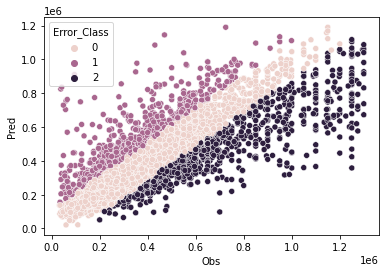

In [236]:
sns.scatterplot(data=comp_data_xgb, x=comp_data_xgb["Obs"], y=comp_data_xgb["Pred"], hue=comp_data_xgb["Error_Class"]);

In [245]:
Importance_xgboost = pd.DataFrame({"Importance": xgb_tuned.feature_importances_*100},
                         index = X_train.columns)

Text(0.5, 0, 'Attributes Importance Levels')

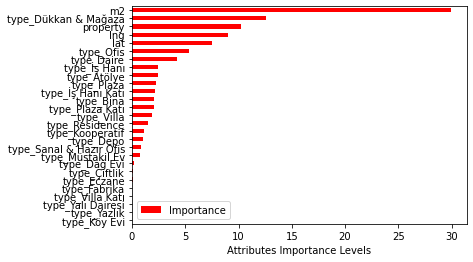

In [246]:
Importance_xgboost.sort_values(by = "Importance", 
                       axis = 0, 
                       ascending = True).plot(kind ="barh", color = "r")

plt.xlabel("Attributes Importance Levels")

**Comment:**When we use xgboost to calculate price prediction of property, we have seen that the most important effect on sales price estimation is m2, namely size of property. By considering, residential and commercial properties with real life, it makes sense. The second important attribute is Dükkan & Mağaza. The fact that it is separated from residential property as commercial property may have played an important role in price estimation. "Property" variable as an important variable may indicate that there is a divergence between residential and commercial properties in terms of price. Although there was a significant difference in terms of price in the hypothesis test from previous analyzes, it was not determined that this difference was really important because the effect size was low. Moreover, lng is more important than lat.This can be explained by the standard deviation of lng (0.112024) greater than lat (0.065419) since lng is a variable that can better differentiate target variable,price with more variance and it contains more information than lat.